# Preprocessing

In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import warnings
import numpy as np
from pathlib import Path
from datetime import datetime
import seaborn.objects as so
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


In [2]:
cuestionario = pd.read_excel("EGD-Cuestionario.xlsx", engine='openpyxl')
cuestionario.columns = cuestionario.iloc[0]
cuestionario = cuestionario.iloc[1:]

# Plots

## Análisis Etapa 1

### Pregunta P2.GC.1

In [121]:
CantPersonas = cuestionario[['Fecha de respuesta',"Tipo","P1.1.1","P2.GC.1"]]
bin = [0,50,100,150,200,300,500,800,1000,3000,10000,50000,57000]
numerico = pd.to_numeric(CantPersonas['P2.GC.1'], errors='coerce').notna()
CantPersonas = CantPersonas.loc[numerico]
CantPersonas['P2.GC.1'].dropna(inplace=True)
CantPersonas["P2.GC.1"] = CantPersonas["P2.GC.1"].astype(int)
bins = pd.cut(CantPersonas['P2.GC.1'], bins=bin, include_lowest=True)
CantPersonas['intervalos'] = bins

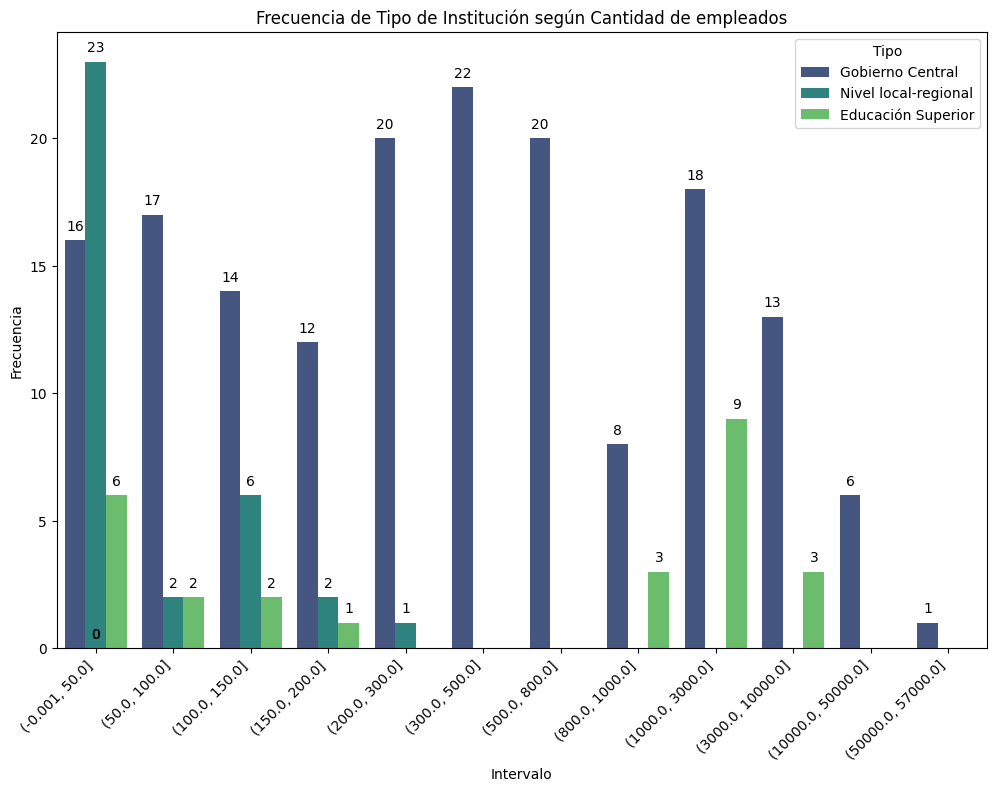

In [122]:
CantPersonas['intervalos'] = pd.Categorical(CantPersonas['intervalos'], ordered=True, categories=CantPersonas['intervalos'].unique())

plt.figure(figsize=(12, 8))
ax = sns.countplot(x='intervalos', hue='Tipo', data=CantPersonas, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Intervalo')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Tipo de Institución según Cantidad de empleados')

for p in ax.patches:
    ax.annotate(f'{round(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.show()

C:\Users\alejo\AppData\Local\Temp\ipykernel_6908\471746787.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='Tipo', y='intervalos', data=CantPersonas,palette='viridis')


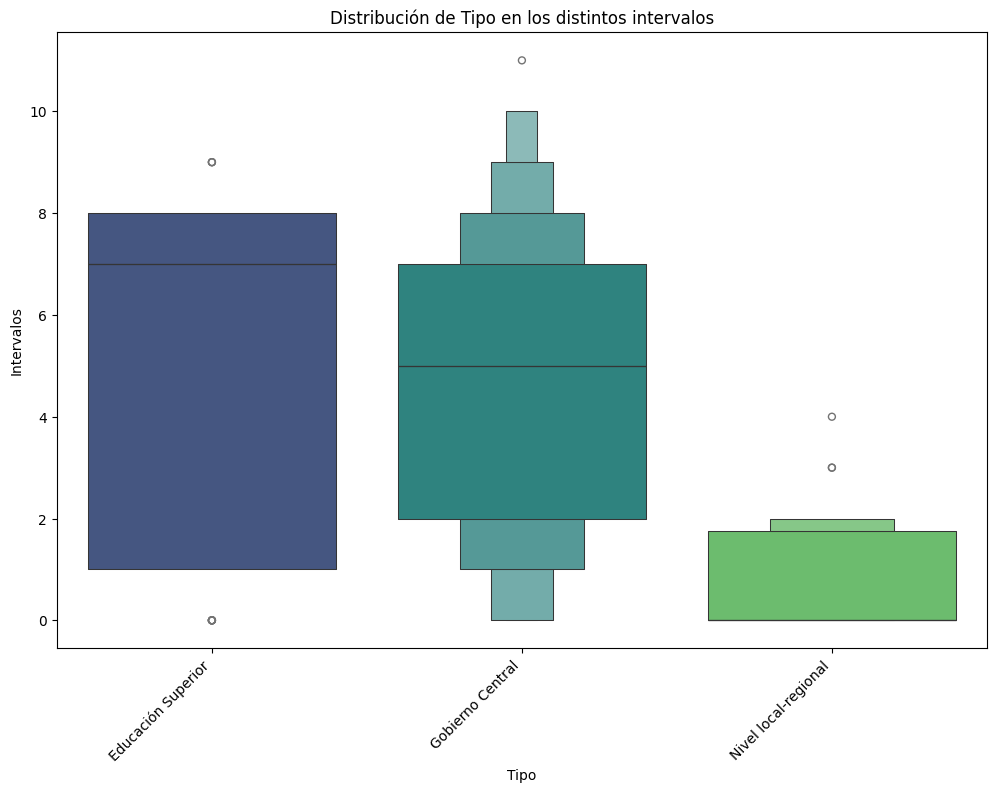

In [123]:
CantPersonas['intervalos'] = CantPersonas['intervalos'].cat.codes
CantPersonas['Tipo'] = CantPersonas['Tipo'].astype('category')

plt.figure(figsize=(12, 8))
sns.boxenplot(x='Tipo', y='intervalos', data=CantPersonas,palette='viridis')

plt.xlabel('Tipo')
plt.ylabel('Intervalos')
plt.title('Distribución de Tipo en los distintos intervalos')

plt.xticks(rotation=45, ha='right')

plt.show()


### Pregunta P2.M.1

In [124]:
CantPersonasAdm = cuestionario[['Fecha de respuesta',"Tipo","P1.1.1","P2.M.1.1"]]

CantPersonasCorp = cuestionario[['Fecha de respuesta',"Tipo","P1.1.1","P2.M.1.2"]]

In [125]:
#Administracion municipal
binAdm = [0, 50, 100, 200, 400, 800, 1200, 1800, 2200, 3000, 4000, 5000]
numerico = pd.to_numeric(CantPersonasAdm['P2.M.1.1'], errors='coerce').notna()
CantPersonasAdm = CantPersonasAdm.loc[numerico]
CantPersonasAdm['P2.M.1.1'].dropna(inplace=True)
CantPersonasAdm["P2.M.1.1"] = CantPersonasAdm["P2.M.1.1"].astype(int)
bins = pd.cut(CantPersonasAdm["P2.M.1.1"], bins=binAdm, include_lowest=True)
CantPersonasAdm['intervalos'] = bins

#Corp o fund municipales

binCorp = [0, 50, 100, 200, 400, 800, 1200, 1800, 2200, 3000, 4000, 6000]
numerico = pd.to_numeric(CantPersonasCorp['P2.M.1.2'], errors='coerce').notna()
CantPersonasCorp = CantPersonasCorp.loc[numerico]
CantPersonasCorp['P2.M.1.2'].dropna(inplace=True)
CantPersonasCorp["P2.M.1.2"] = CantPersonasCorp["P2.M.1.2"].astype(int)
bins = pd.cut(CantPersonasCorp["P2.M.1.2"], bins=binCorp, include_lowest=True)
CantPersonasCorp['intervalos'] = bins

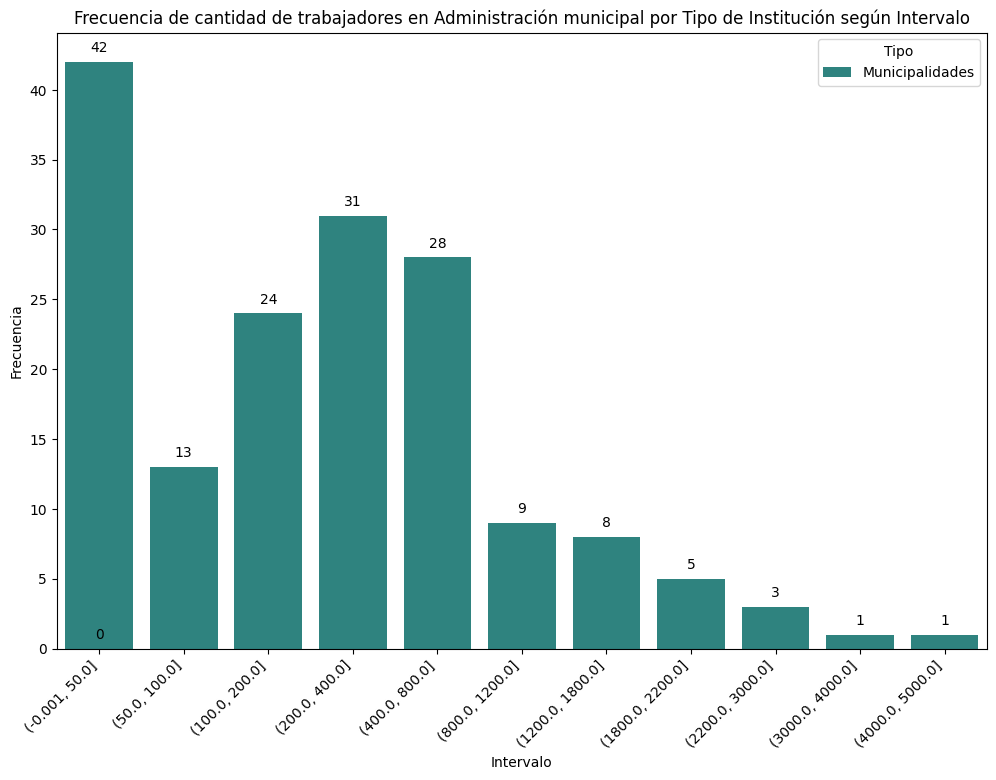

In [126]:
CantPersonasAdm['intervalos'] = pd.Categorical(CantPersonasAdm['intervalos'], ordered=True, categories=CantPersonasAdm['intervalos'].unique())

plt.figure(figsize=(12, 8))
ax = sns.countplot(x='intervalos', hue='Tipo', data=CantPersonasAdm, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Intervalo')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de cantidad de trabajadores en Administración municipal por Tipo de Institución según Intervalo')

for p in ax.patches:
    ax.annotate(f'{round(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.show()

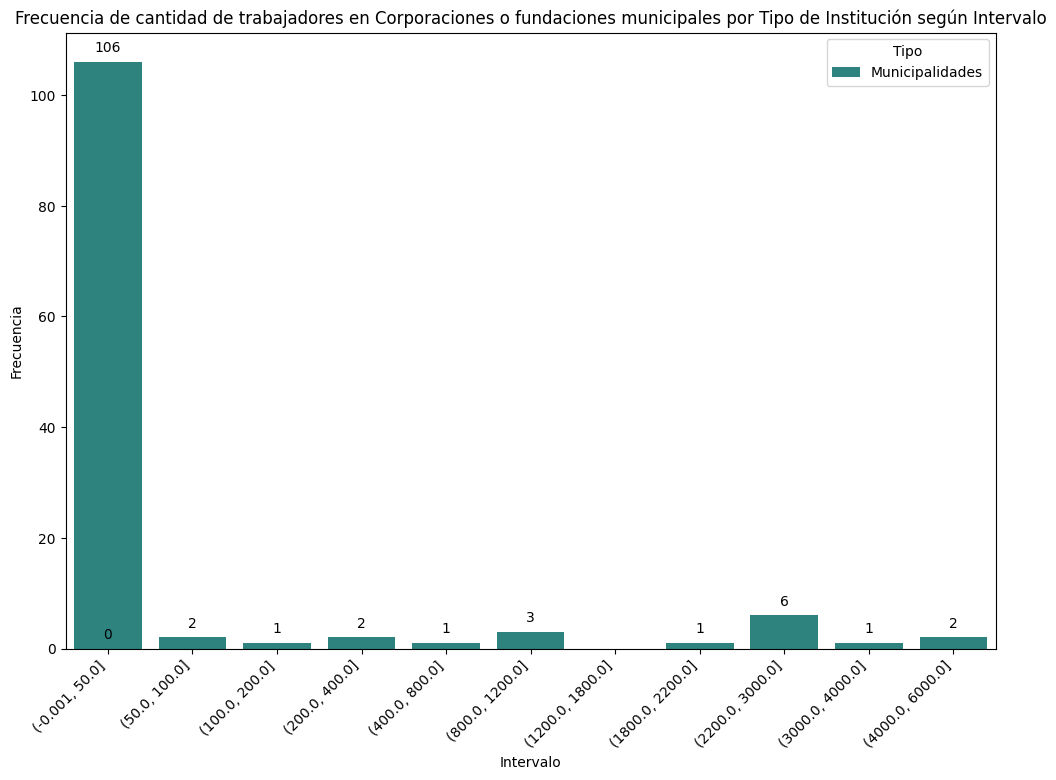

In [127]:
CantPersonasCorp['intervalos'] = pd.Categorical(CantPersonasCorp['intervalos'], ordered=True, categories=CantPersonasCorp['intervalos'].unique())

plt.figure(figsize=(12, 8))
ax = sns.countplot(x='intervalos', hue='Tipo', data=CantPersonasCorp, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Intervalo')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de cantidad de trabajadores en Corporaciones o fundaciones municipales por Tipo de Institución según Intervalo')

for p in ax.patches:
    ax.annotate(f'{round(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.show()

### Pregunta P2.5

In [128]:
funciones = cuestionario[['Fecha de respuesta',"Tipo","P1.1.1","P2.5.1","P2.5.2","P2.5.3","P2.5.4","P2.5.5","P2.5.6","P2.5.7","P2.5.8"]]

In [129]:
funciones = funciones.replace("#s.i.",0)
funciones = funciones.replace("#n.s.",0)
funciones = funciones.replace("#n.a.",0)

In [130]:
def convertir_a_1(valor):
    return 1 if valor != 0 else 0

In [131]:
columnas_p2_5 = funciones.columns[funciones.columns.str.startswith("P2.5")]
funciones[columnas_p2_5] = funciones[columnas_p2_5].applymap(convertir_a_1)

C:\Users\alejo\AppData\Local\Temp\ipykernel_6908\3883449651.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  funciones[columnas_p2_5] = funciones[columnas_p2_5].applymap(convertir_a_1)


In [132]:
columnas_frecuencia = ['Tipo','P2.5.1', 'P2.5.2', 'P2.5.3', 'P2.5.4', 'P2.5.5', 'P2.5.6', 'P2.5.7', 'P2.5.8']
df_frecuencia = funciones[columnas_frecuencia]
columnas_frecuencia = ['Tipo','P2.5.1', 'P2.5.2', 'P2.5.3', 'P2.5.4', 'P2.5.5', 'P2.5.6', 'P2.5.7', 'P2.5.8']
df_frecuencia = funciones[columnas_frecuencia]

df_melted = pd.melt(df_frecuencia, id_vars=['Tipo'], var_name='Columna', value_name='Frecuencia')

df_melted = df_melted[df_melted['Frecuencia'] == 1]

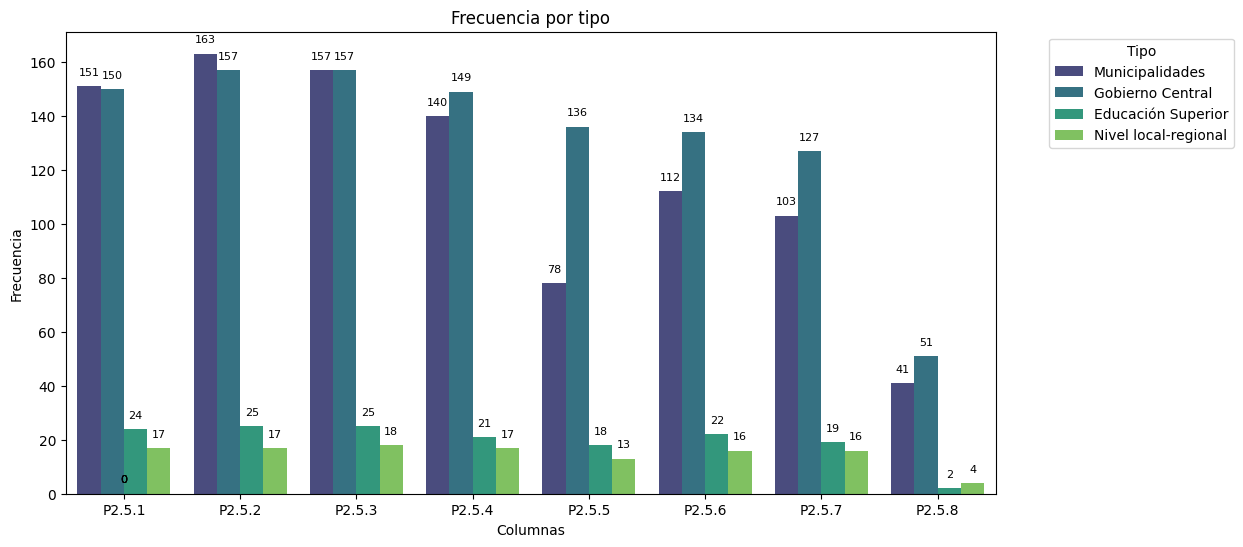

In [133]:
plt.figure(figsize=(12, 6))

ax = sns.countplot(x='Columna', hue='Tipo', data=df_melted, palette='viridis')

plt.xlabel('Columnas')
plt.ylabel('Frecuencia')
plt.title('Frecuencia por tipo')

for p in ax.patches:
    ax.annotate((f'{round(p.get_height())}'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)


plt.legend(title='Tipo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Pregunta P2.6b

In [134]:
PersInfor = cuestionario[["Tipo","P1.1.1","P2.6b.1","P2.6b.2"]]
PersInfor = PersInfor.replace({'#s.i.': 0, '#n.a.': 0})

PersInfor['P2.6b.1'] = pd.to_numeric(PersInfor['P2.6b.1'], errors="coerce")
PersInfor['P2.6b.2'] = pd.to_numeric(PersInfor['P2.6b.2'], errors="coerce")
PersInfor['P2.6b.1'] = PersInfor['P2.6b.1'].astype(float)
PersInfor['P2.6b.2'] = PersInfor['P2.6b.2'].astype(float)
pivot_table = PersInfor.pivot_table(index='Tipo', values=['P2.6b.1', 'P2.6b.2'], aggfunc='sum')

df_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100
df_percentage = df_percentage.dropna()

df_percentage['P2.6b.1'] = pd.to_numeric(df_percentage['P2.6b.1'])
df_percentage['P2.6b.2'] = pd.to_numeric(df_percentage['P2.6b.2'])

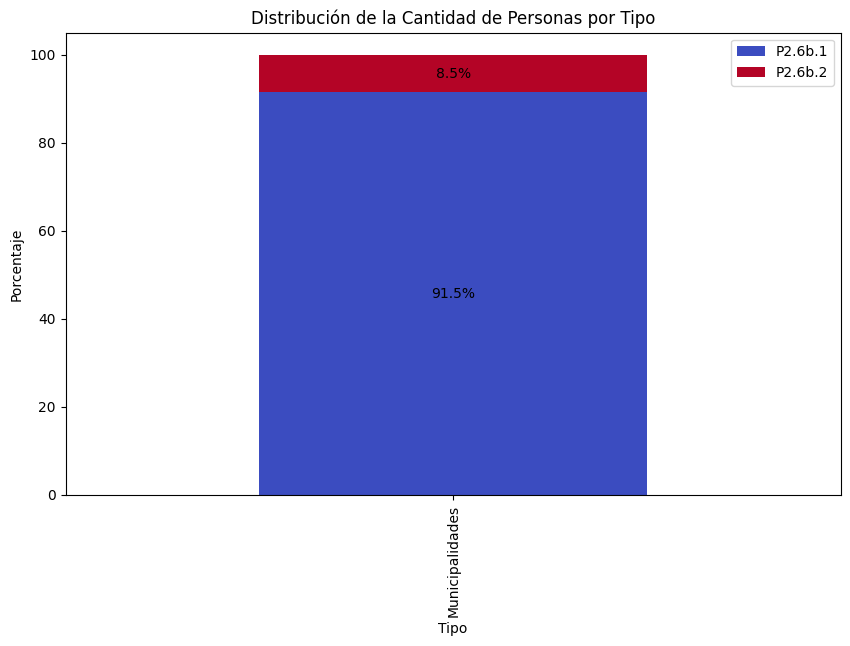

In [135]:
ax = df_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Distribución de la Cantidad de Personas por Tipo')
plt.xlabel('Tipo')
plt.ylabel('Porcentaje')
plt.legend(['P2.6b.1', 'P2.6b.2'], loc='upper right')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

plt.show()

### Pregunta P2.7

In [136]:
PropEquipos = cuestionario[["Tipo","P2.GC.1","P2.M.1.1","P2.M.1.2","P2.7.1","P2.7.2","P2.7.3","P2.7.4","P2.7.5","P2.7.6"]]
PropEquipos = PropEquipos.replace({'#s.i.': 0, '#n.a.': 0})

In [137]:
PropEquipos["PersonalInstitución"] = PropEquipos["P2.GC.1"] + PropEquipos["P2.M.1.1"] + PropEquipos["P2.M.1.2"]
PropEquipos["PersonalTIC"] = PropEquipos["P2.7.1"] + PropEquipos["P2.7.2"] + PropEquipos["P2.7.3"] + PropEquipos["P2.7.4"] + PropEquipos["P2.7.5"] + PropEquipos["P2.7.6"]
PropEquipos["ProporcionTIC"] = PropEquipos["PersonalTIC"] * 100 / PropEquipos["PersonalInstitución"]

In [138]:
PropTIC = PropEquipos[["Tipo","ProporcionTIC"]]
PropTIC = PropTIC.replace({np.inf: np.nan})
PropTIC = PropTIC.dropna()
bin = [0,10,20,30,40,50,60,70,80,90,100]
bins = pd.cut(PropTIC['ProporcionTIC'], bins=bin, include_lowest=True)
PropTIC['intervalos'] = bins

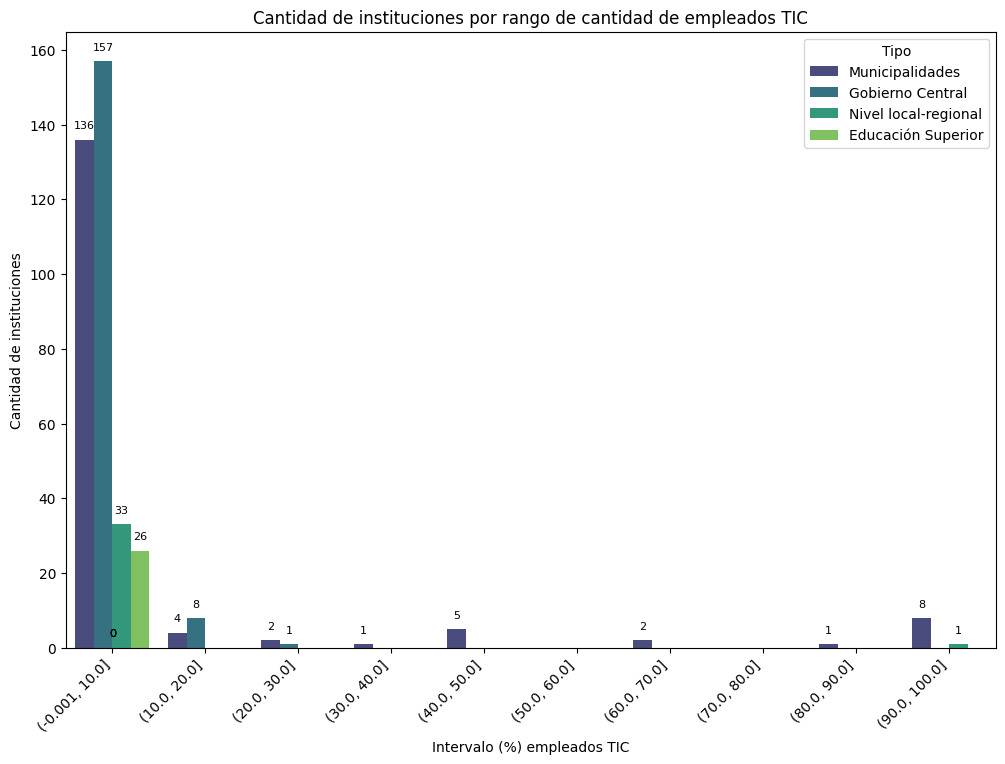

In [139]:

plt.figure(figsize=(12, 8))
ax = sns.countplot(x='intervalos', hue='Tipo', data=PropTIC, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Intervalo (%) empleados TIC')
plt.ylabel('Cantidad de instituciones')
plt.title('Cantidad de instituciones por rango de cantidad de empleados TIC')

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)

plt.show()

In [140]:
pivot_table = PropEquipos.pivot_table(index='Tipo', values=["P2.7.1","P2.7.2","P2.7.3","P2.7.4","P2.7.5","P2.7.6"], aggfunc='sum')

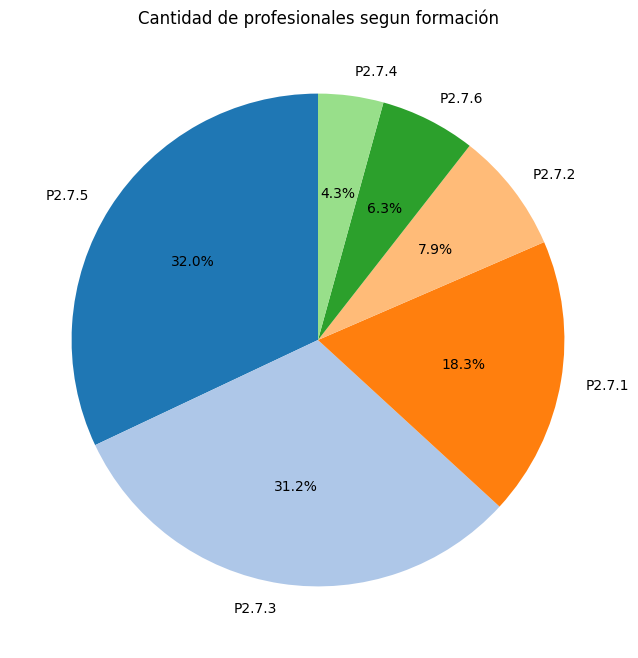

In [141]:
df_sum = pivot_table.sum()
df_sum = df_sum.sort_values(ascending=False)
plt.figure(figsize=(8, 8))
plt.pie(df_sum, labels=df_sum.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
plt.title('Cantidad de profesionales segun formación')
plt.show()

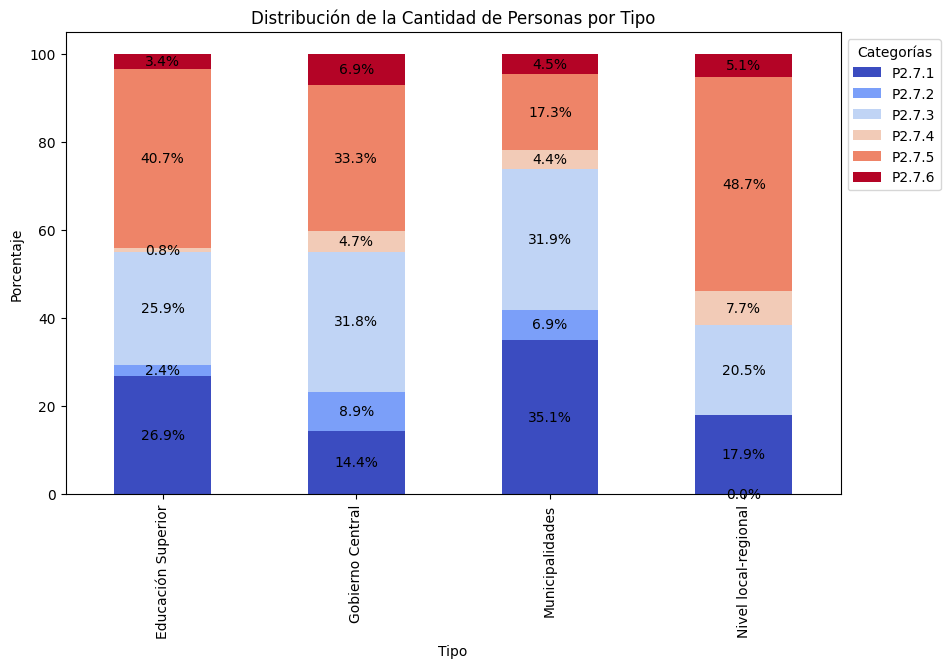

In [142]:
df_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

ax = df_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Distribución de la Cantidad de Personas por Tipo')
plt.xlabel('Tipo')
plt.ylabel('Porcentaje')
plt.legend(title='Categorías', bbox_to_anchor=(1, 1), loc='upper left')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

plt.show()

### Pregunta 2.8

In [143]:
ProfPorPerfil = cuestionario[["Tipo","P2.8.1.3","P2.8.2.3","P2.8.3.3","P2.8.4.3","P2.8.5.3","P2.8.6.3","P2.8.7.3","P2.8.8.3","P2.8.9.3","P2.8.10.3","P2.8.11.3","P2.8.12.3","P2.8.13.3","P2.8.14.3","P2.8.15.3","P2.8.16.3","P2.8.17.3"]]
ProfPorPerfil = ProfPorPerfil.replace({'#s.i.': 0, '#n.a.': 0})
ProfPorPerfil[["P2.8.1.3","P2.8.2.3","P2.8.3.3","P2.8.4.3","P2.8.5.3","P2.8.6.3","P2.8.7.3","P2.8.8.3","P2.8.9.3","P2.8.10.3","P2.8.11.3","P2.8.12.3","P2.8.13.3","P2.8.14.3","P2.8.15.3","P2.8.16.3","P2.8.17.3"]] = ProfPorPerfil[["P2.8.1.3","P2.8.2.3","P2.8.3.3","P2.8.4.3","P2.8.5.3","P2.8.6.3","P2.8.7.3","P2.8.8.3","P2.8.9.3","P2.8.10.3","P2.8.11.3","P2.8.12.3","P2.8.13.3","P2.8.14.3","P2.8.15.3","P2.8.16.3","P2.8.17.3"]].astype(int)

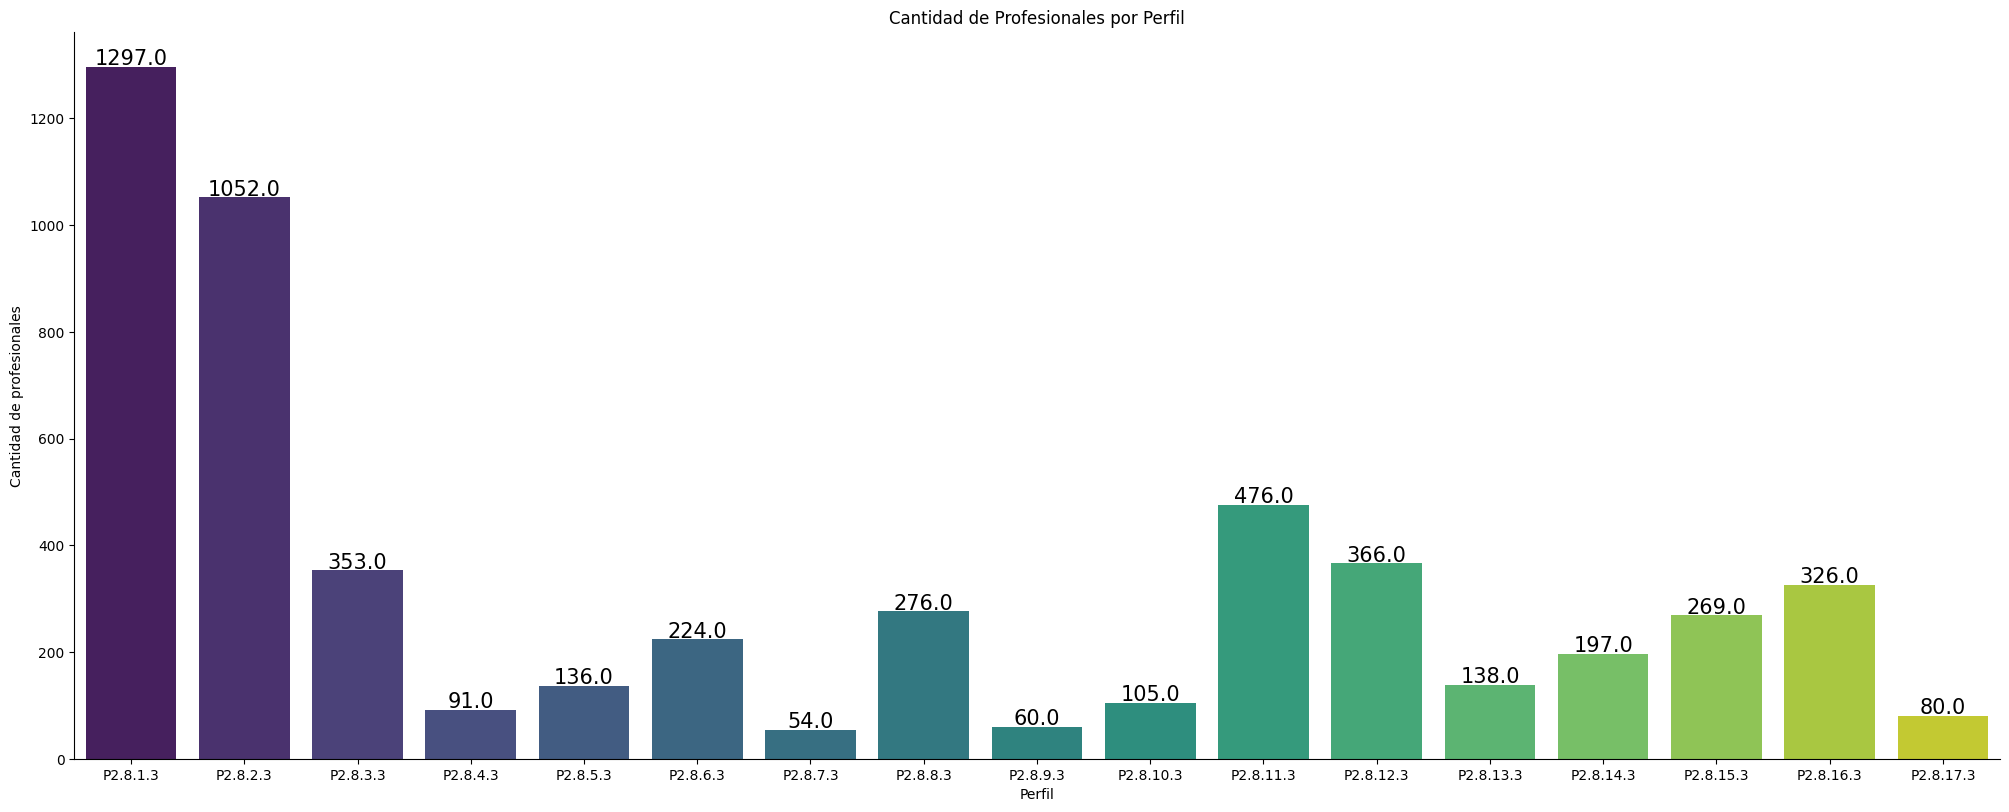

In [144]:
g = sns.catplot(data=ProfPorPerfil, kind="bar", height=8, aspect=2.5, palette='viridis',estimator="sum",errorbar=None)

plt.title('Cantidad de Profesionales por Perfil')
plt.xlabel('Perfil')
plt.ylabel('Cantidad de profesionales')

for ax in g.axes.flat:
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height}', (x + width / 2, y + height + 15), ha='center', va='center',fontsize=15)

plt.show()

In [145]:
df_melted = pd.melt(ProfPorPerfil, id_vars=['Tipo'], var_name='Columna', value_name='Cantidad')

df_sum = df_melted.groupby(['Tipo', 'Columna'])['Cantidad'].sum().reset_index()

df_sum['Porcentaje'] = df_sum.groupby('Columna')['Cantidad'].transform(lambda x: x / x.sum() * 100)

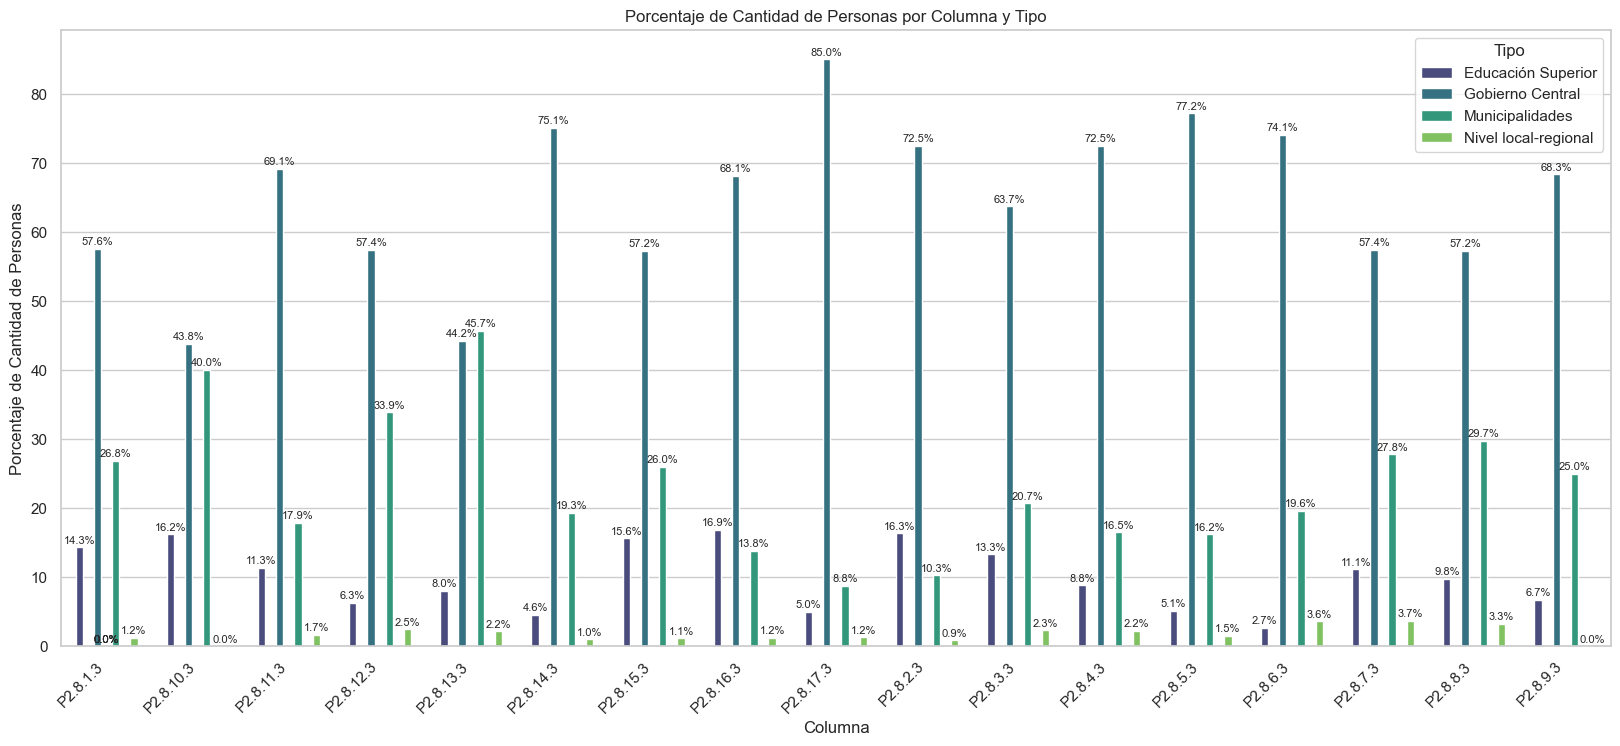

In [146]:

plt.figure(figsize=(20, 8))
sns.set(style="whitegrid")
ax = sns.barplot(x='Columna', y='Porcentaje', hue='Tipo', data=df_sum, palette='viridis', dodge=True, gap=0.6,width=0.8)

plt.subplots_adjust(hspace=0.125, wspace=0.125)
plt.title('Porcentaje de Cantidad de Personas por Columna y Tipo')
plt.xlabel('Columna')
plt.ylabel('Porcentaje de Cantidad de Personas')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo', loc='upper right')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height + 1), ha='center', va='center', fontsize=8)

plt.show()


### P4.3

In [147]:
FirmAutorizados = cuestionario[["Tipo","P4.3"]]
FirmAutorizados = FirmAutorizados.replace({'#s.i.': 0, '#n.a.': 0})
FirmAutorizados["P4.3"] = FirmAutorizados["P4.3"].astype(int)

In [148]:
bin = [0, 50, 200, 400, 700, 1200, 3000, 5000, 10000, 30000]
bins = pd.cut(FirmAutorizados['P4.3'], bins=bin, include_lowest=True)
FirmAutorizados['intervalos'] = bins

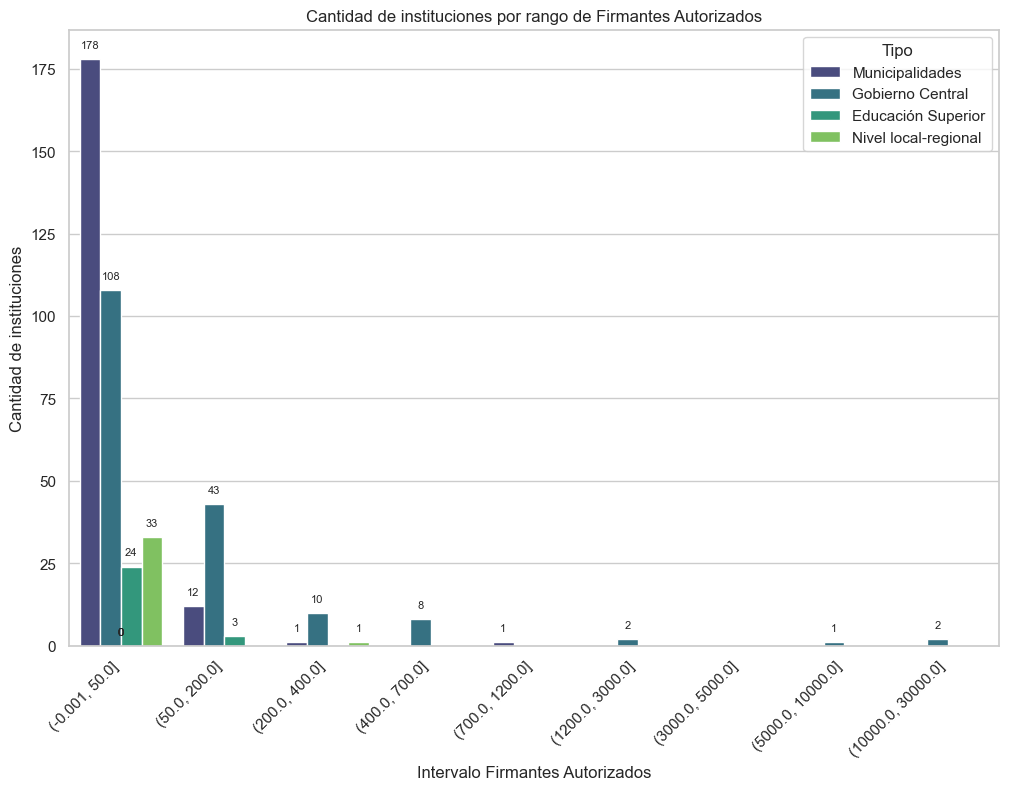

In [149]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='intervalos', hue='Tipo', data=FirmAutorizados, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Intervalo Firmantes Autorizados')
plt.ylabel('Cantidad de instituciones')
plt.title('Cantidad de instituciones por rango de Firmantes Autorizados')

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)

plt.show()

### P4.4

In [150]:
DocsFirmados = cuestionario[["Tipo","P4.4"]]
DocsFirmados = DocsFirmados.replace({'#s.i.': 0, '#n.a.': 0})
DocsFirmados["P4.4"] = DocsFirmados["P4.4"].astype(int)
bin = [0, 500, 2000, 5000, 8000, 12000, 20000, 50000, 100000, 150000,300000,700000,1200000,2000000]
bins = pd.cut(DocsFirmados['P4.4'], bins=bin, include_lowest=True)
DocsFirmados['intervalos'] = bins


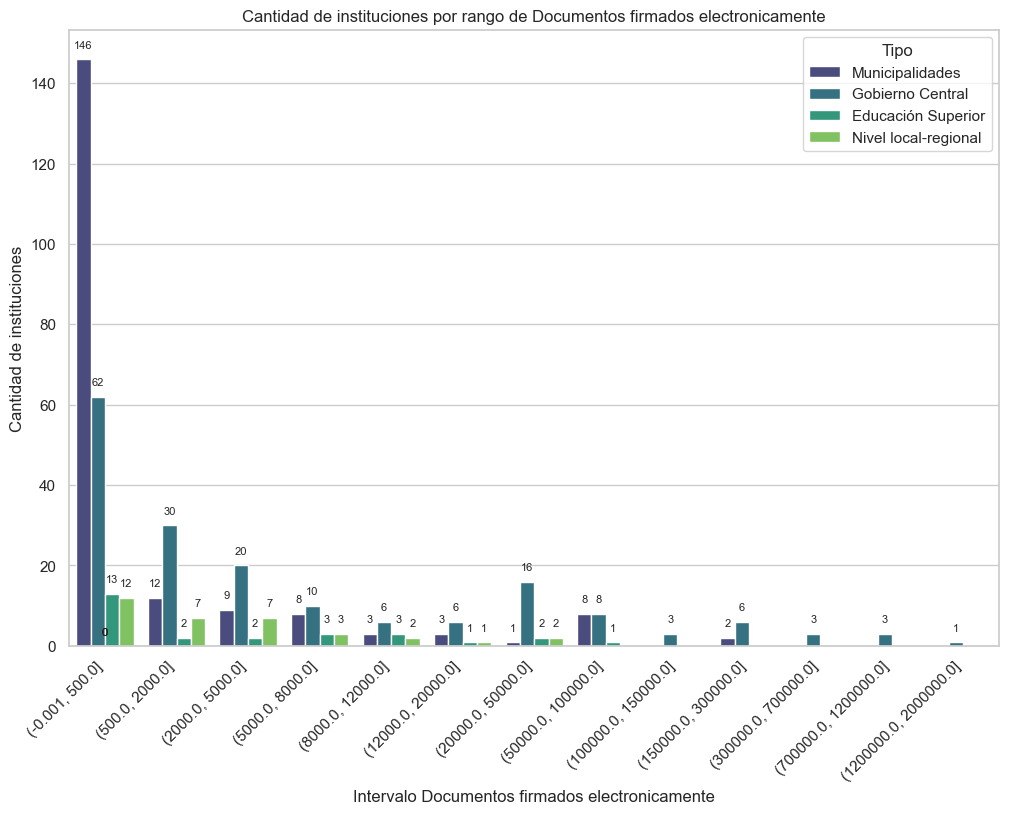

In [151]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='intervalos', hue='Tipo', data=DocsFirmados, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Intervalo Documentos firmados electronicamente')
plt.ylabel('Cantidad de instituciones')
plt.title('Cantidad de instituciones por rango de Documentos firmados electronicamente')

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)

plt.show()

### P5.1

In [152]:
OficPartes = cuestionario[["Tipo","P5.1"]]
OficPartes = OficPartes.replace({'#s.i.': 0, '#n.a.': 0})
OficPartes["P5.1"] = OficPartes["P5.1"].astype(float)

In [153]:
OficPartes = OficPartes.loc[OficPartes['P5.1'] <= 1000]

In [154]:
bin = [-0.1,0,3, 5, 10, 25, 50, 100, 200, 300, 400, 500, 1000]
bins = pd.cut(OficPartes['P5.1'], bins=bin)
OficPartes['intervalos'] = bins

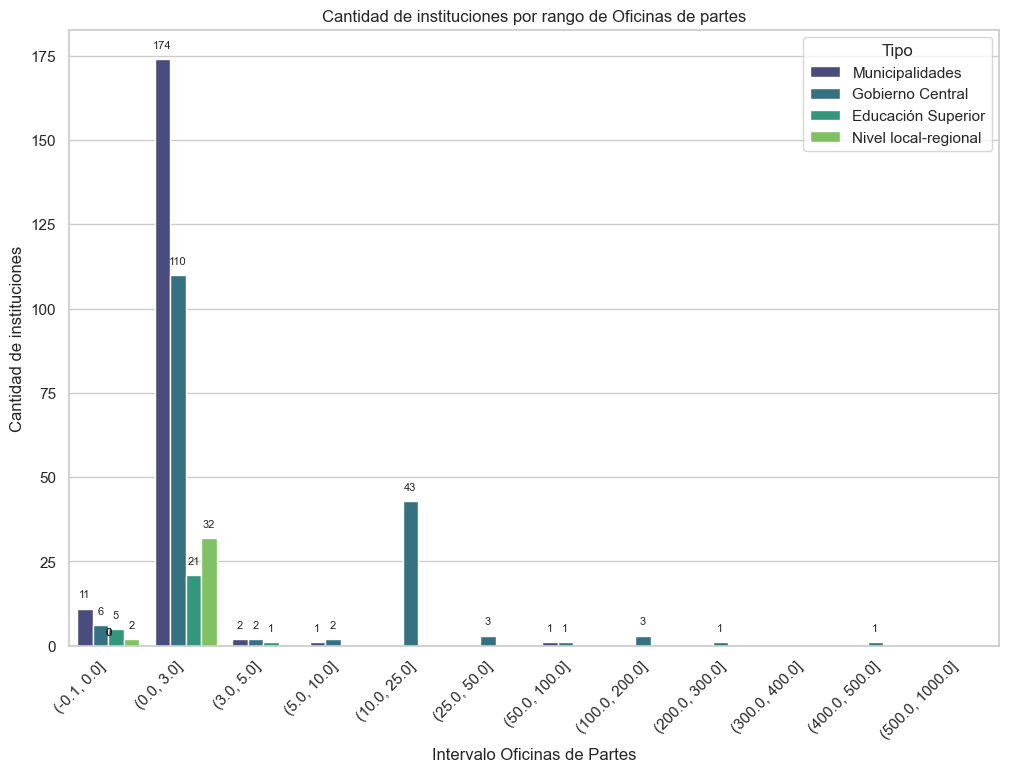

In [155]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='intervalos', hue='Tipo', data=OficPartes, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Intervalo Oficinas de Partes')
plt.ylabel('Cantidad de instituciones')
plt.title('Cantidad de instituciones por rango de Oficinas de partes')

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)

plt.show()

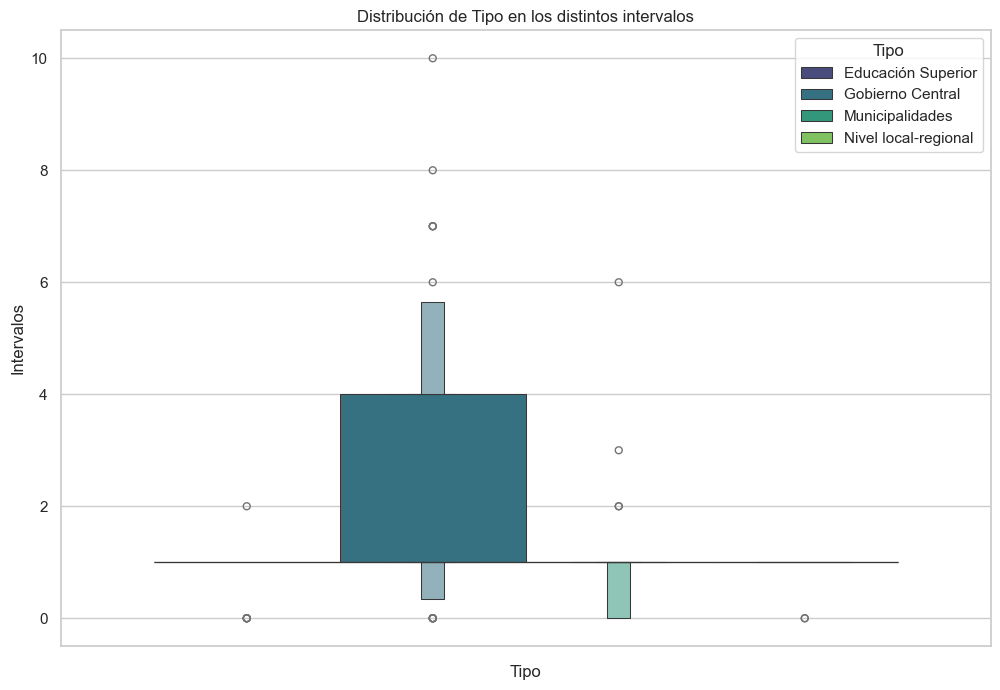

In [156]:
OficPartes['intervalos'] = OficPartes['intervalos'].cat.codes
OficPartes['Tipo'] = OficPartes['Tipo'].astype('category')

plt.figure(figsize=(12, 8))
sns.boxenplot(hue='Tipo', y='intervalos', data=OficPartes,palette='viridis')

plt.xlabel('Tipo')
plt.ylabel('Intervalos')
plt.title('Distribución de Tipo en los distintos intervalos')

plt.xticks(rotation=45, ha='right')

plt.show()


### P5.2

In [157]:
PersOfiPartes = cuestionario[["Tipo","P5.2"]]
PersOfiPartes = PersOfiPartes.replace({'#s.i.': 0, '#n.a.': 0})
PersOfiPartes["P5.2"] = PersOfiPartes["P5.2"].astype(int)
PersOfiPartes = PersOfiPartes.loc[PersOfiPartes['P5.2'] <= 1000]
bin = [-0.1,0,3, 5, 10, 25, 50, 100, 200, 300, 400, 500, 1000]
bins = pd.cut(PersOfiPartes['P5.2'], bins=bin)
PersOfiPartes['intervalos'] = bins

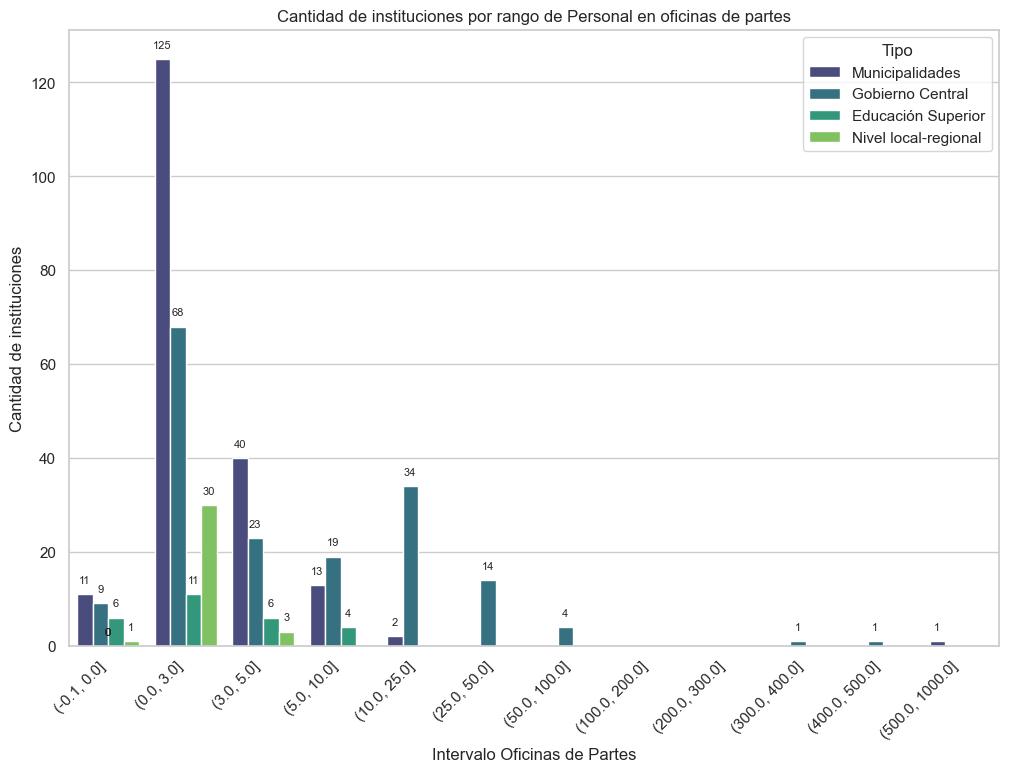

In [158]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='intervalos', hue='Tipo', data=PersOfiPartes, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Intervalo Oficinas de Partes')
plt.ylabel('Cantidad de instituciones')
plt.title('Cantidad de instituciones por rango de Personal en oficinas de partes')

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)

plt.show()

In [159]:
pivot_table = PersOfiPartes.pivot_table(index='Tipo', values=["P5.2"], aggfunc='sum')
df = pivot_table.sort_values(by='P5.2', ascending=False)['P5.2']

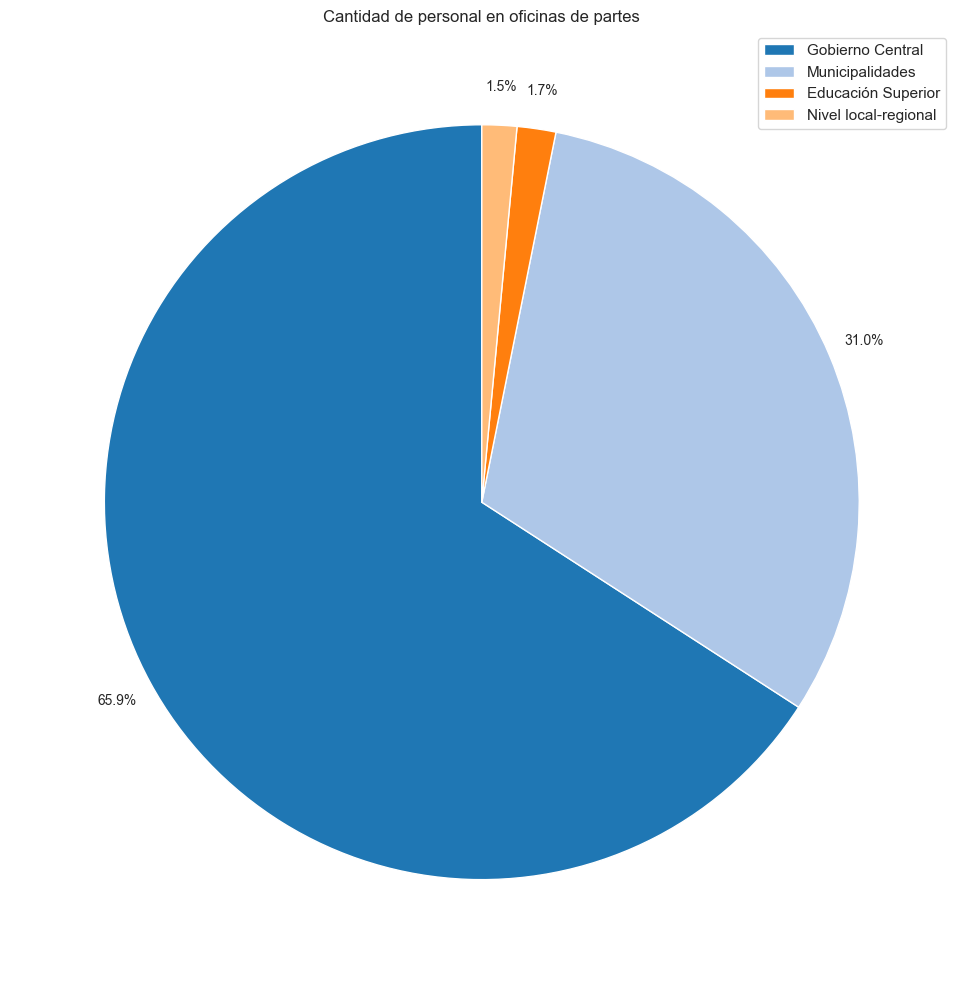

In [160]:
plt.figure(figsize=(10, 10))
plt.pie(df, labels=None, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors,pctdistance=1.1,textprops={'fontsize': 10})
plt.legend(df.index, loc='upper right')
plt.title('Cantidad de personal en oficinas de partes')
plt.tight_layout()
plt.show()

### P5.3

In [161]:
DocOtrasInst = cuestionario[["Tipo","P5.3"]]
DocOtrasInst = DocOtrasInst.replace({'#s.i.': 0, '#n.a.': 0})
DocOtrasInst["P5.3"] = DocOtrasInst["P5.3"].astype(int)

In [162]:
bin = [-0.1,0,100, 500, 1000, 5000, 20000, 100000, 500000, 1000000, 2000000]
bins = pd.cut(DocOtrasInst['P5.3'], bins=bin)
DocOtrasInst['intervalos'] = bins

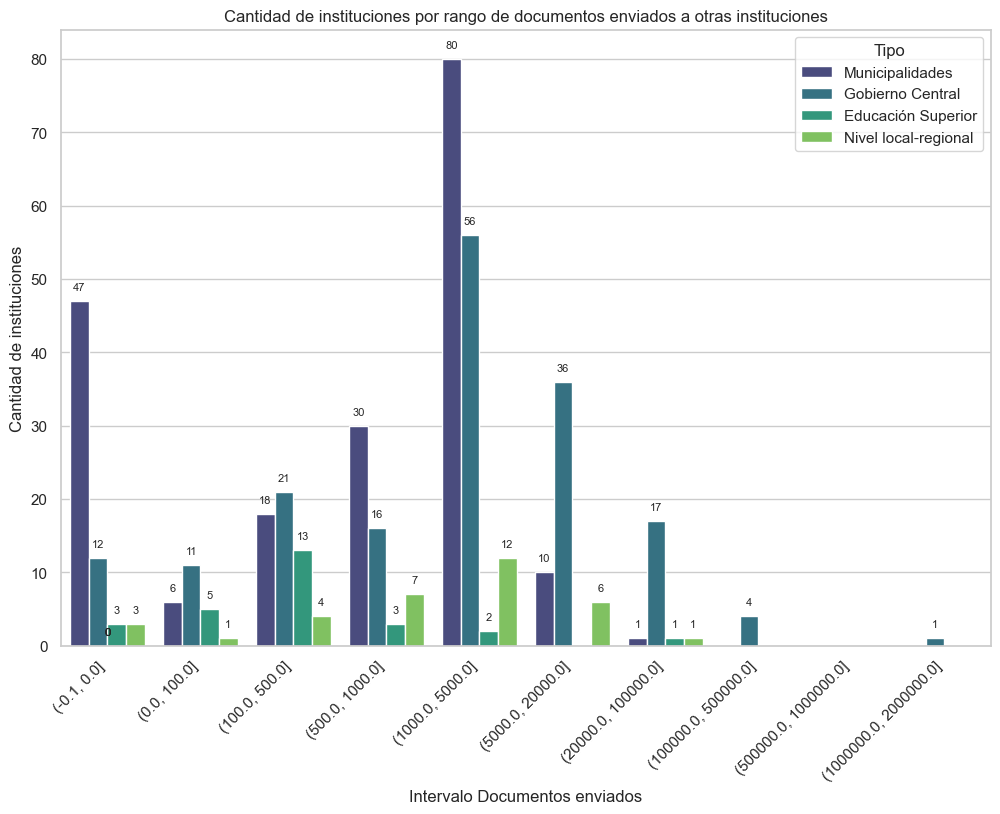

In [163]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='intervalos', hue='Tipo', data=DocOtrasInst, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Intervalo Documentos enviados')
plt.ylabel('Cantidad de instituciones')
plt.title('Cantidad de instituciones por rango de documentos enviados a otras instituciones')

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)

plt.show()

### P5.4

In [164]:
DocRecibidos = cuestionario[["Tipo","P5.4"]]
DocRecibidos = DocRecibidos.replace({'#s.i.': 0, '#n.a.': 0})
DocRecibidos["P5.4"] = DocRecibidos["P5.4"].astype(int)

In [165]:
bin = [-0.1,0,100, 500, 1000, 5000, 20000, 100000, 500000, 1000000]
bins = pd.cut(DocRecibidos['P5.4'], bins=bin)
DocRecibidos['intervalos'] = bins

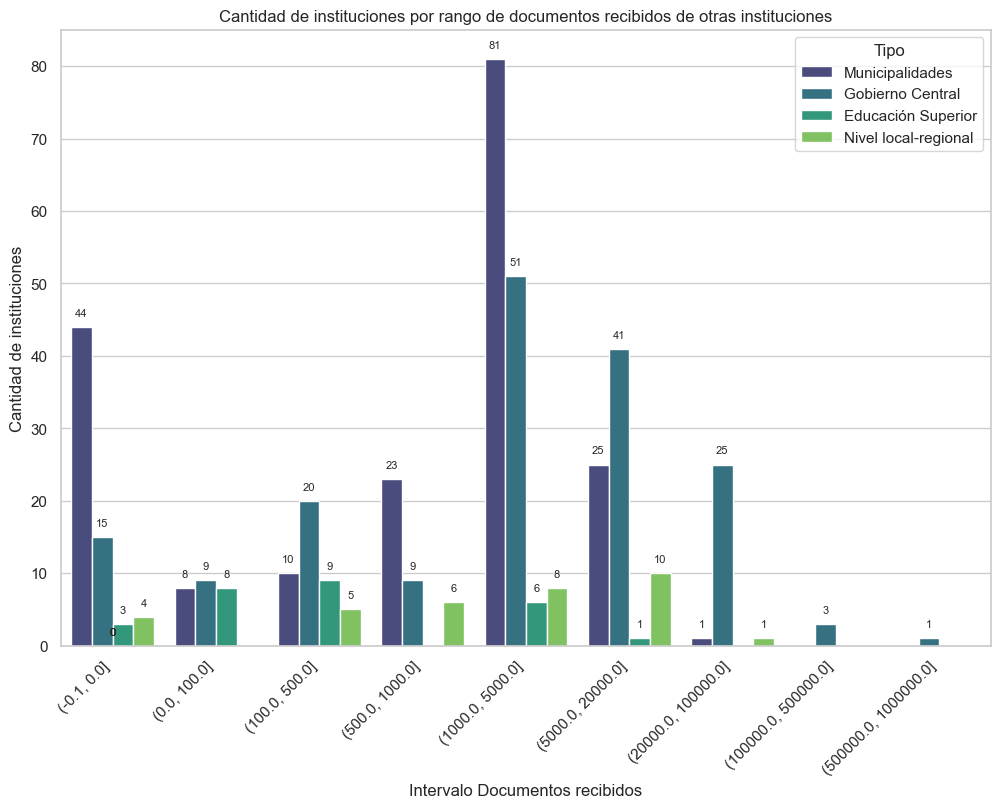

In [166]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='intervalos', hue='Tipo', data=DocRecibidos, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Intervalo Documentos recibidos')
plt.ylabel('Cantidad de instituciones')
plt.title('Cantidad de instituciones por rango de documentos recibidos de otras instituciones')

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)

plt.show()

### P5.7

In [167]:
ActPolitDocumental = cuestionario[["Tipo","P5.7"]]
ActPolitDocumental = ActPolitDocumental.replace({'#s.i.': np.nan, '#n.a.': np.nan})
ActPolitDocumental = ActPolitDocumental.dropna()
ActPolitDocumental["P5.7"] = ActPolitDocumental["P5.7"].astype(int)

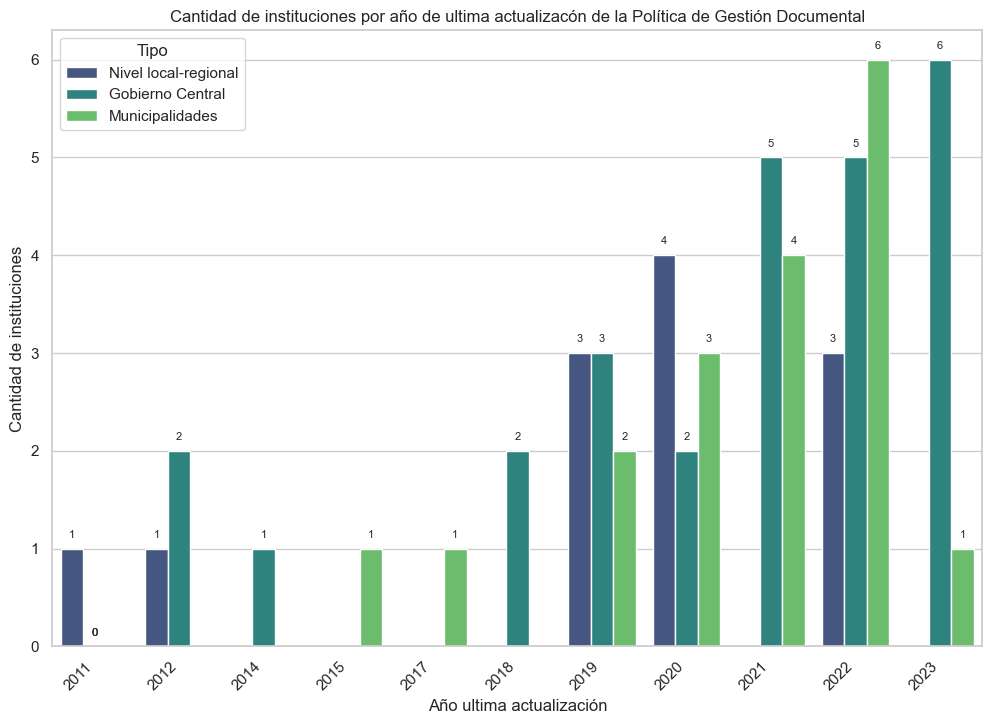

In [168]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='P5.7', hue='Tipo', data=ActPolitDocumental, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Año ultima actualización')
plt.ylabel('Cantidad de instituciones')
plt.title('Cantidad de instituciones por año de ultima actualizacón de la Política de Gestión Documental')

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)

plt.show()

### P6.1

In [169]:
CartCertificadas = cuestionario[["Tipo","P6.1"]]
CartCertificadas = CartCertificadas.replace({'#s.i.': 0, '#n.a.': 0})
CartCertificadas["P6.1"] = CartCertificadas["P6.1"].astype(int)

In [170]:
bin = [0,200, 500, 1000, 5000, 20000, 100000, 500000, 1000000,2500000]
bins = pd.cut(CartCertificadas['P6.1'], bins=bin)
CartCertificadas['intervalos'] = bins

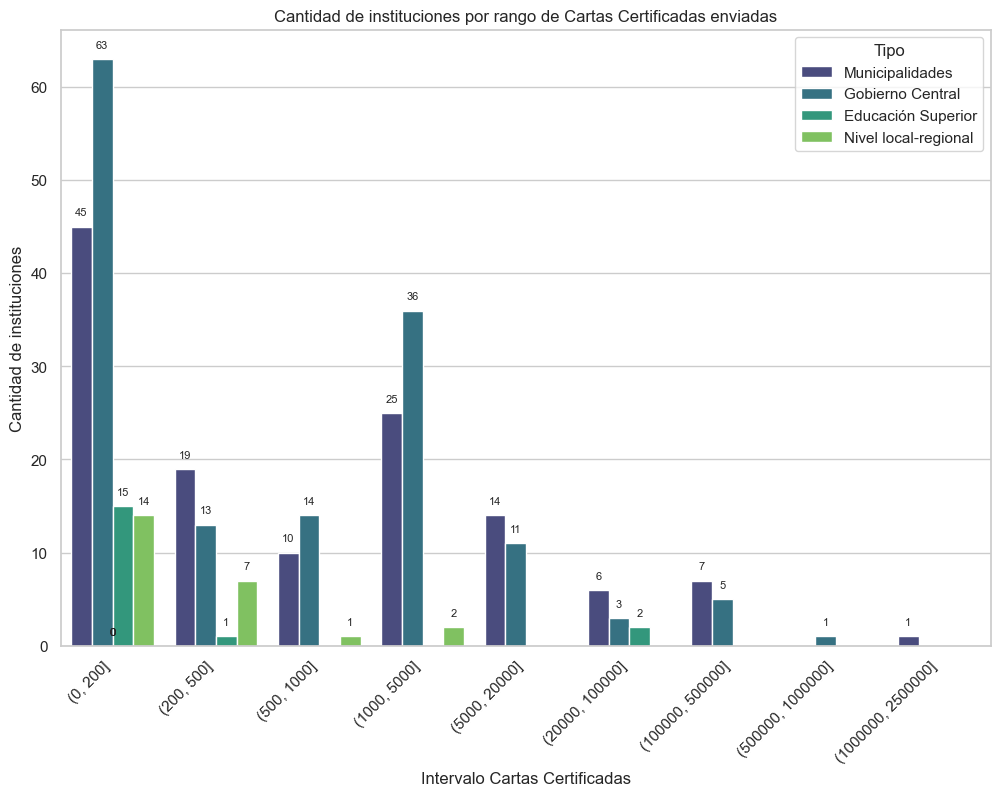

In [171]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='intervalos', hue='Tipo', data=CartCertificadas, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Intervalo Cartas Certificadas')
plt.ylabel('Cantidad de instituciones')
plt.title('Cantidad de instituciones por rango de Cartas Certificadas enviadas')

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)

plt.show()

### P6.2

In [172]:
CostoCartCertificadas = cuestionario[["Tipo","P6.2"]]
CostoCartCertificadas = CostoCartCertificadas.replace({'#s.i.': 0, '#n.a.': 0})
CostoCartCertificadas["P6.2"] = CostoCartCertificadas["P6.2"].astype(int)

In [173]:
bin = [0, 5000, 15000, 40000, 100000, 200000, 400000, 700000, 1200000, 30000000, 50000000, 100000000, 200000000, 500000000, 16000000000]
bins = pd.cut(CostoCartCertificadas['P6.2'], bins=bin)
CostoCartCertificadas['intervalos'] = bins

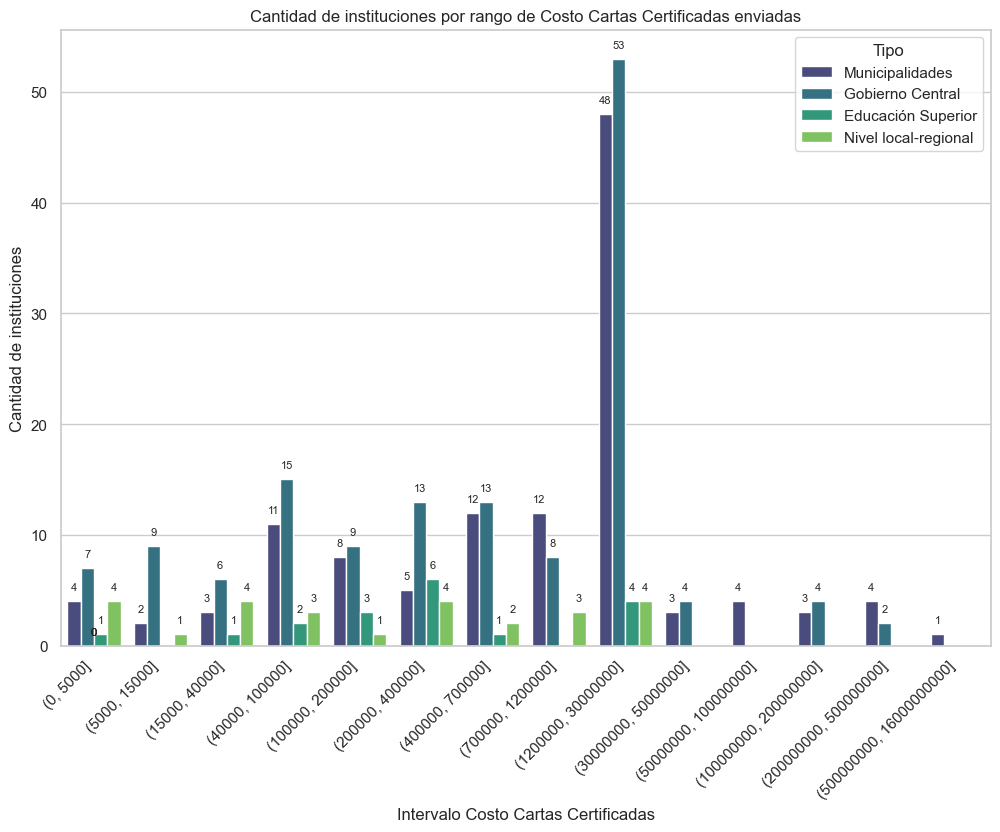

In [174]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='intervalos', hue='Tipo', data=CostoCartCertificadas, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Intervalo Costo Cartas Certificadas')
plt.ylabel('Cantidad de instituciones')
plt.title('Cantidad de instituciones por rango de Costo Cartas Certificadas enviadas')

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)

plt.show()

In [175]:
CostoPorCarta = cuestionario[["Tipo","P6.1","P6.2"]]
CostoPorCarta = CostoPorCarta.replace({'#s.i.': 0, '#n.a.': 0})
CostoPorCarta["CostoPorCarta"] = CostoPorCarta["P6.2"] / CostoPorCarta["P6.1"]
CostoPorCarta = CostoPorCarta.replace([np.inf, -np.inf], np.nan)
CostoPorCarta = CostoPorCarta.dropna()

In [176]:
bin = [0, 1000, 5000, 20000, 50000, 100000, 200000]
bins = pd.cut(CostoPorCarta['CostoPorCarta'], bins=bin)
CostoPorCarta['intervalos'] = bins

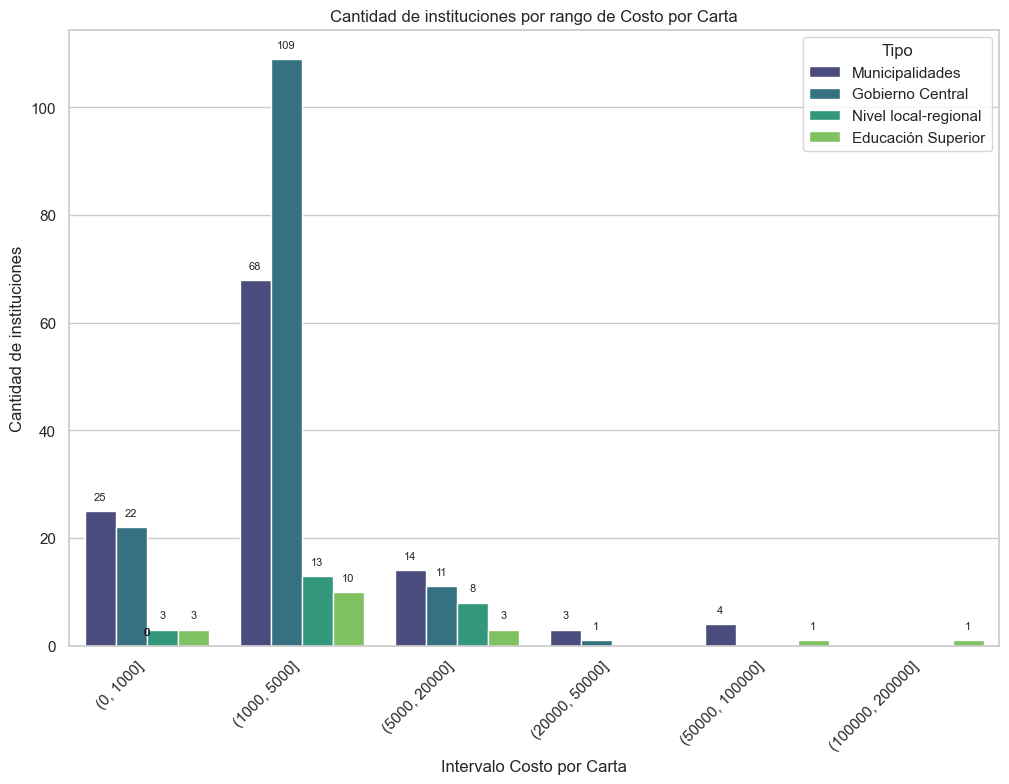

In [177]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='intervalos', hue='Tipo', data=CostoPorCarta, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Intervalo Costo por Carta')
plt.ylabel('Cantidad de instituciones')
plt.title('Cantidad de instituciones por rango de Costo por Carta')

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)

plt.show()

C:\Users\alejo\AppData\Local\Temp\ipykernel_6908\1479016640.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts_df = CostoPorCarta.groupby(['intervalos', 'Tipo']).size().unstack().fillna(0)


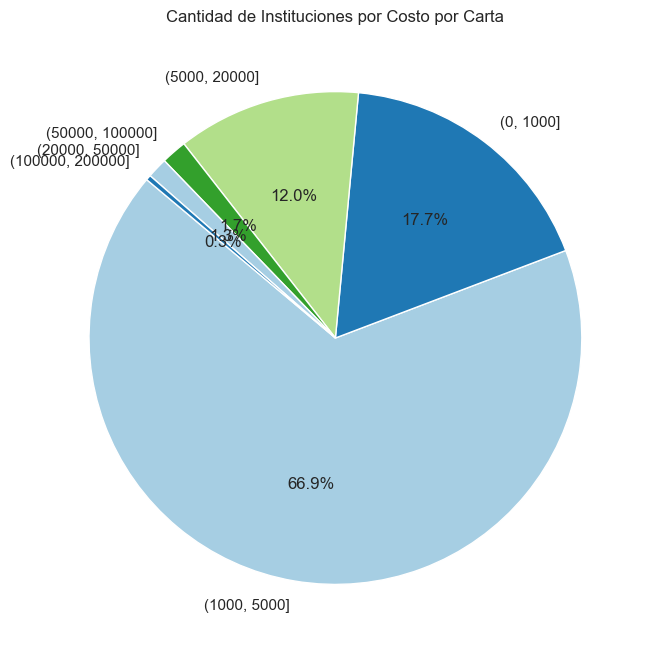

In [178]:
counts_df = CostoPorCarta.groupby(['intervalos', 'Tipo']).size().unstack().fillna(0)

counts_df['Total'] = counts_df.sum(axis=1)
counts_df = counts_df.sort_values(by='Total', ascending=False)

fig, ax = plt.subplots(figsize=(8, 8))
colors = plt.cm.Paired(range(len(CostoPorCarta['Tipo'].unique())))
ax.pie(counts_df['Total'], labels=counts_df.index, autopct='%1.1f%%', colors=colors, startangle=140)

plt.title('Cantidad de Instituciones por Costo por Carta')

plt.show()

### P7.1

In [179]:
InterOtrasInstituciones = cuestionario[["Tipo","P7.1.1","P7.1.2","P7.1.3","P7.1.4","P7.1.5","P7.1.6"]]

In [180]:
SiInteractuan = InterOtrasInstituciones[["Tipo","P7.1.1"]]
SiInteractuan = SiInteractuan.replace({'#s.i.': 'No interactúan'})
SiInteractuan = SiInteractuan.dropna()
SiInteractuan['Interactuan'] = SiInteractuan['P7.1.1'].apply(lambda x: 'Sí interactúan' if x != 'No interactúan' else x)

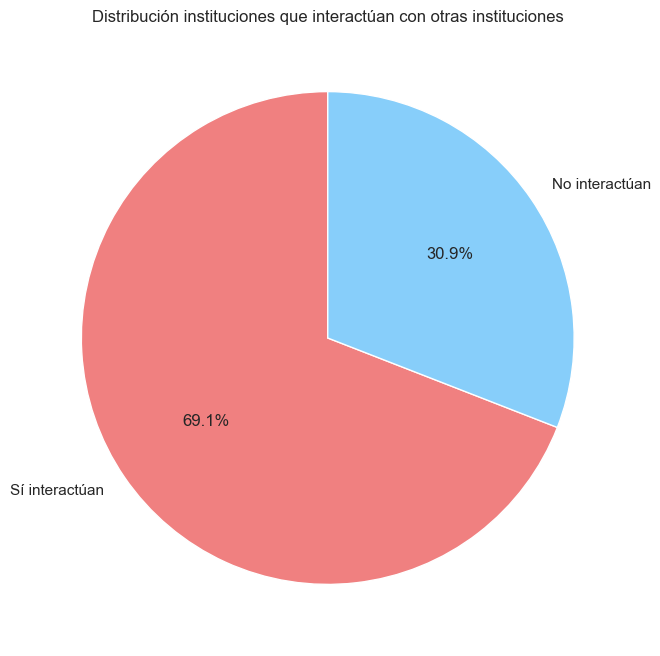

In [181]:
counts = SiInteractuan['Interactuan'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])

plt.title('Distribución instituciones que interactúan con otras instituciones')

plt.show()

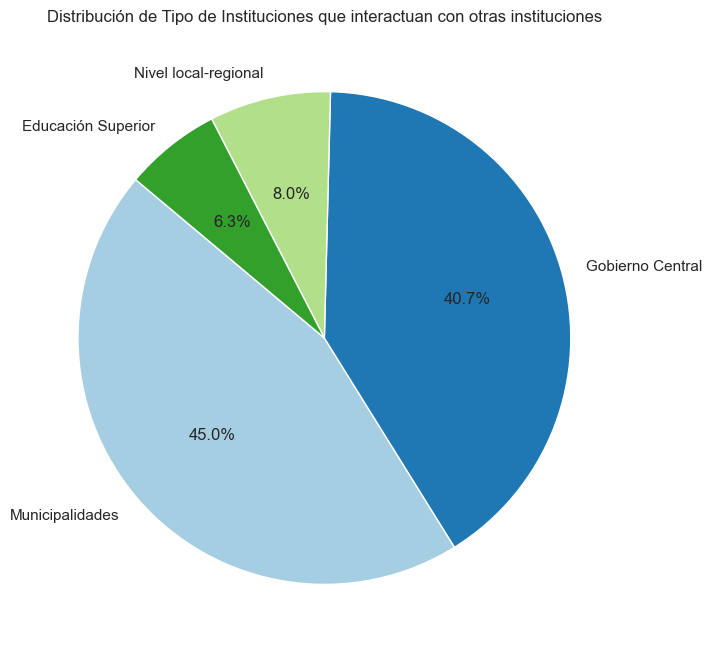

In [182]:
counts_df = SiInteractuan.groupby(['Tipo', 'P7.1.1']).size().unstack().fillna(0)

counts_df['Total'] = counts_df.sum(axis=1)
counts_df = counts_df.sort_values(by='Total', ascending=False)

fig, ax = plt.subplots(figsize=(8, 8))
colors = plt.cm.Paired(range(len(SiInteractuan['Tipo'].unique())))
ax.pie(counts_df['Total'], labels=counts_df.index, autopct='%1.1f%%', colors=colors, startangle=140)

plt.title('Distribución de Tipo de Instituciones que interactuan con otras instituciones')

plt.show()

In [183]:
InterOtrasInstituciones = InterOtrasInstituciones.replace({'#s.i.':np.nan, '#n.a.':0})
InterOtrasInstituciones = InterOtrasInstituciones.dropna()

In [184]:
InterOtrasInstituciones['CantidadInteracciones'] = InterOtrasInstituciones.iloc[:, 2:].apply(lambda row: sum(row != 0), axis=1)
InterOtrasInstituciones['CantidadInteracciones'] = InterOtrasInstituciones['CantidadInteracciones'].replace(6,"Mas de 5")

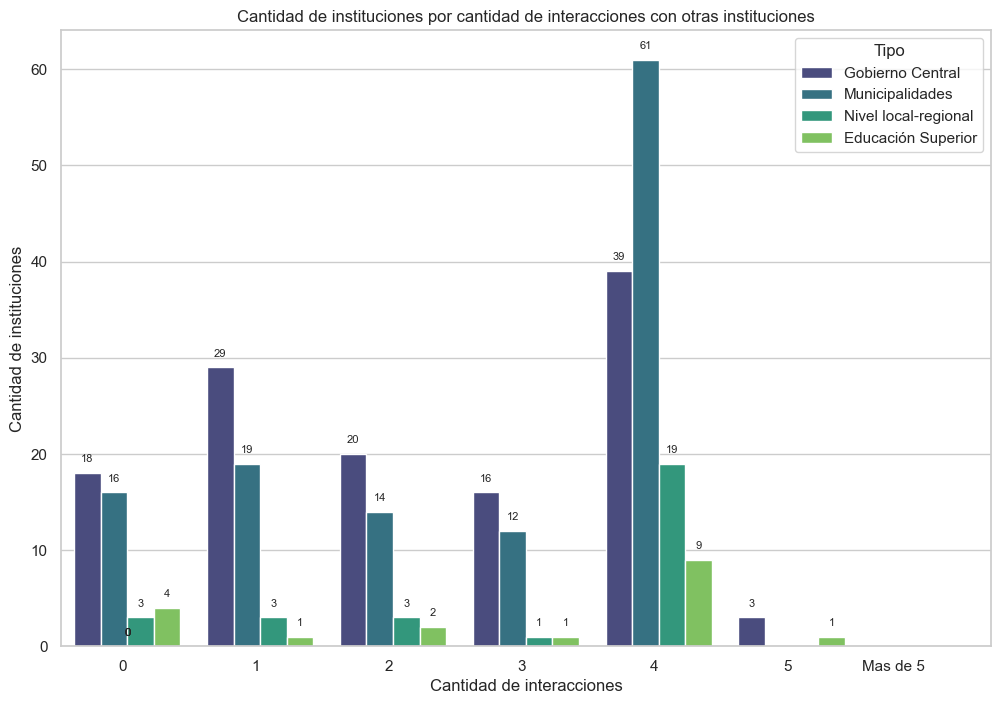

In [185]:
orden_arbitrario = [0,1,2,3,4,5,"Mas de 5"]
InterOtrasInstituciones['CantidadInteracciones'] = pd.Categorical(InterOtrasInstituciones['CantidadInteracciones'], categories=orden_arbitrario, ordered=True)
InterOtrasInstituciones = InterOtrasInstituciones.sort_values(by='CantidadInteracciones')

plt.figure(figsize=(12, 8))
ax = sns.countplot(x='CantidadInteracciones', hue='Tipo', data=InterOtrasInstituciones, palette='viridis')

plt.xticks(rotation=0, ha='right')
plt.xlabel('Cantidad de interacciones')
plt.ylabel('Cantidad de instituciones')
plt.title('Cantidad de instituciones por cantidad de interacciones con otras instituciones')

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)

plt.show()

In [186]:
columnas_interes = InterOtrasInstituciones.iloc[:, 1:7]  # Selecciona las columnas P7.1.1 a P7.1.6

In [187]:
conteo_total = columnas_interes.values.flatten()
conteo_total = pd.Series(conteo_total)
top_5_comunes = conteo_total.value_counts().head(6)
top_5_comunes = top_5_comunes.drop(0)
df_top_5_comunes = top_5_comunes.reset_index()
df_top_5_comunes.columns = ['Valor', 'Count']


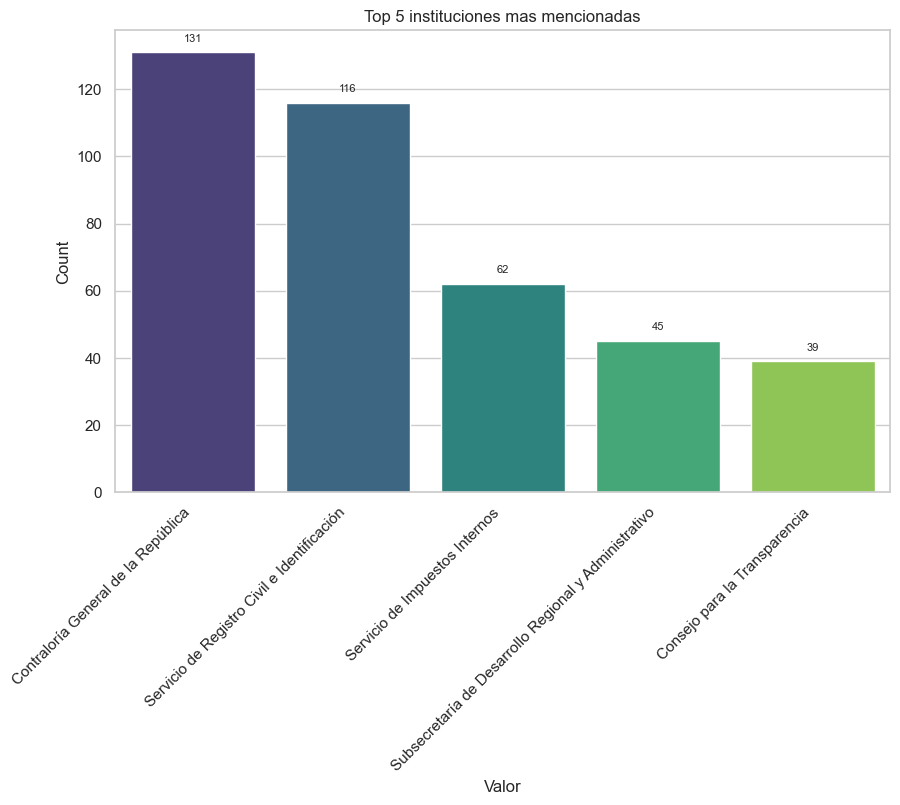

In [188]:
plt.figure(figsize=(10, 6))
sns.barplot(hue='Valor',x="Valor", y='Count', data=df_top_5_comunes, palette="viridis",legend=False)

plt.xlabel('Valor')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Top 5 instituciones mas mencionadas')

for p in plt.gca().patches:
    height = p.get_height()
    if not pd.isna(height):
        plt.gca().annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                           ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.show()

### P7.2

In [189]:
InterOtrasInstitucionesPriv = cuestionario[["Tipo","P7.2.1","P7.2.2","P7.2.3","P7.2.4","P7.2.5"]]

In [190]:
SiInteractuanPriv = InterOtrasInstitucionesPriv[["Tipo","P7.2.1"]]
SiInteractuanPriv = SiInteractuanPriv.replace({'#s.i.': 'No interactúan'})
SiInteractuanPriv = SiInteractuanPriv.dropna()
SiInteractuanPriv['Interactuan'] = SiInteractuanPriv['P7.2.1'].apply(lambda x: 'Sí interactúan' if x != 'No interactúan' else x)

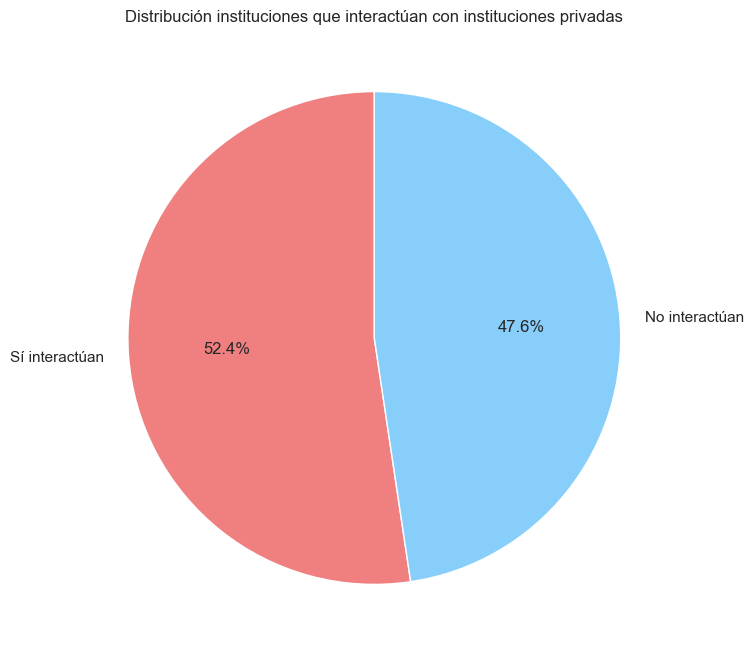

In [191]:
counts = SiInteractuanPriv['Interactuan'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])

plt.title('Distribución instituciones que interactúan con instituciones privadas')

plt.show()

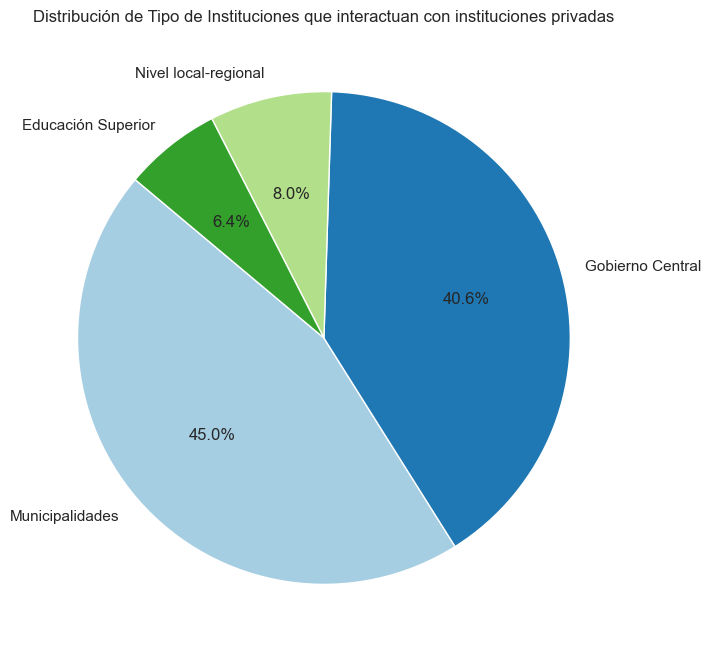

In [192]:
counts_df = SiInteractuanPriv.groupby(['Tipo', 'P7.2.1']).size().unstack().fillna(0)

counts_df['Total'] = counts_df.sum(axis=1)
counts_df = counts_df.sort_values(by='Total', ascending=False)

fig, ax = plt.subplots(figsize=(8, 8))
colors = plt.cm.Paired(range(len(SiInteractuanPriv['Tipo'].unique())))
ax.pie(counts_df['Total'], labels=counts_df.index, autopct='%1.1f%%', colors=colors, startangle=140)

plt.title('Distribución de Tipo de Instituciones que interactuan con instituciones privadas')

plt.show()

In [193]:
InterOtrasInstitucionesPriv = InterOtrasInstitucionesPriv.replace({'#s.i.':np.nan, '#n.a.':0})
InterOtrasInstitucionesPriv = InterOtrasInstitucionesPriv.dropna()

In [194]:
InterOtrasInstitucionesPriv['CantidadInteracciones'] = InterOtrasInstitucionesPriv.iloc[:, 2:].apply(lambda row: sum(row != 0), axis=1)

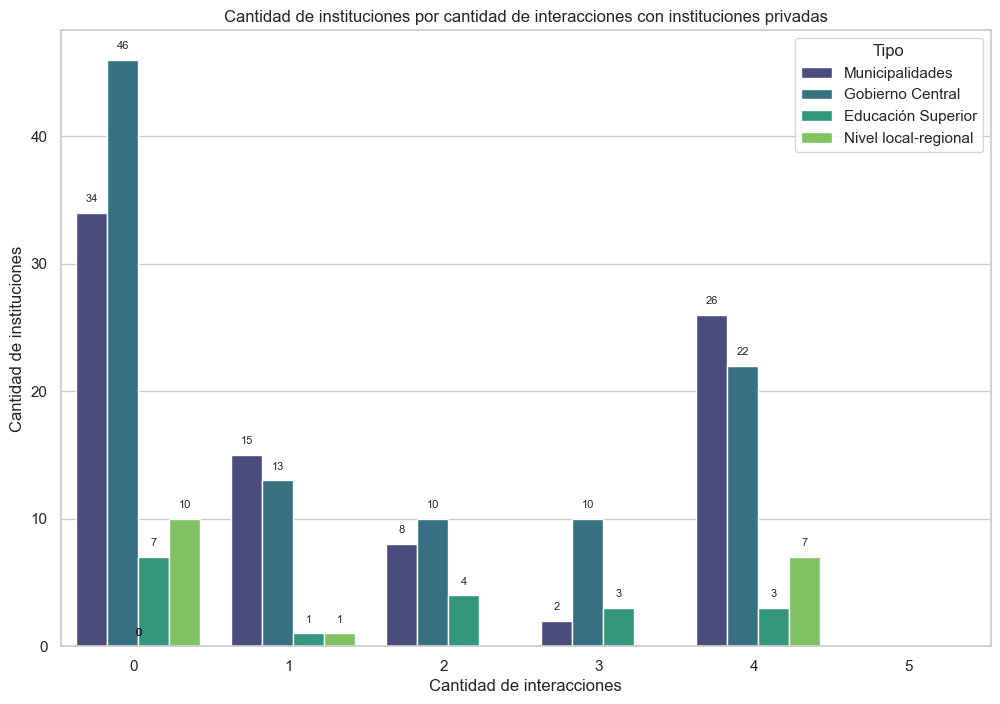

In [195]:
orden_arbitrario = [0,1,2,3,4,5]
InterOtrasInstitucionesPriv['CantidadInteracciones'] = pd.Categorical(InterOtrasInstitucionesPriv['CantidadInteracciones'], categories=orden_arbitrario, ordered=True)
InterOtrasInstitucionesPriv = InterOtrasInstitucionesPriv.sort_values(by='CantidadInteracciones')

plt.figure(figsize=(12, 8))
ax = sns.countplot(x='CantidadInteracciones', hue='Tipo', data=InterOtrasInstitucionesPriv, palette='viridis')

plt.xticks(rotation=0, ha='right')
plt.xlabel('Cantidad de interacciones')
plt.ylabel('Cantidad de instituciones')
plt.title('Cantidad de instituciones por cantidad de interacciones con instituciones privadas')

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)

plt.show()

In [196]:
columnas_interes_priv = InterOtrasInstitucionesPriv.iloc[:, 1:6] 

In [197]:
conteo_total_priv = columnas_interes_priv.values.flatten()
conteo_total_priv = pd.Series(conteo_total_priv)
top_5_comunes_priv = conteo_total_priv.value_counts().head(6)
top_5_comunes_priv = top_5_comunes_priv.drop(0)
top_5_comunes_priv = top_5_comunes_priv.reset_index()
top_5_comunes_priv.columns = ['Valor', 'Count']


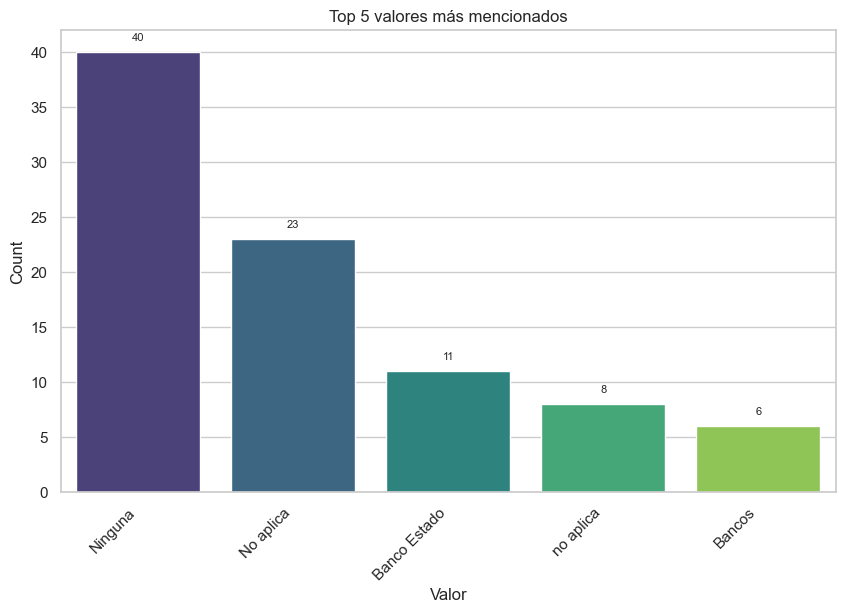

In [198]:
plt.figure(figsize=(10, 6))
sns.barplot(hue='Valor',x="Valor", y='Count', data=top_5_comunes_priv, palette="viridis",legend=False)

plt.xlabel('Valor')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Top 5 valores más mencionados')

for p in plt.gca().patches:
    height = p.get_height()
    if not pd.isna(height):
        plt.gca().annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                           ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.show()

### P7.3

In [199]:
MecanismosIntercambio = cuestionario[["Tipo","P7.3"]]
MecanismosIntercambio = MecanismosIntercambio.replace({'#s.i.':'Sin Información'})

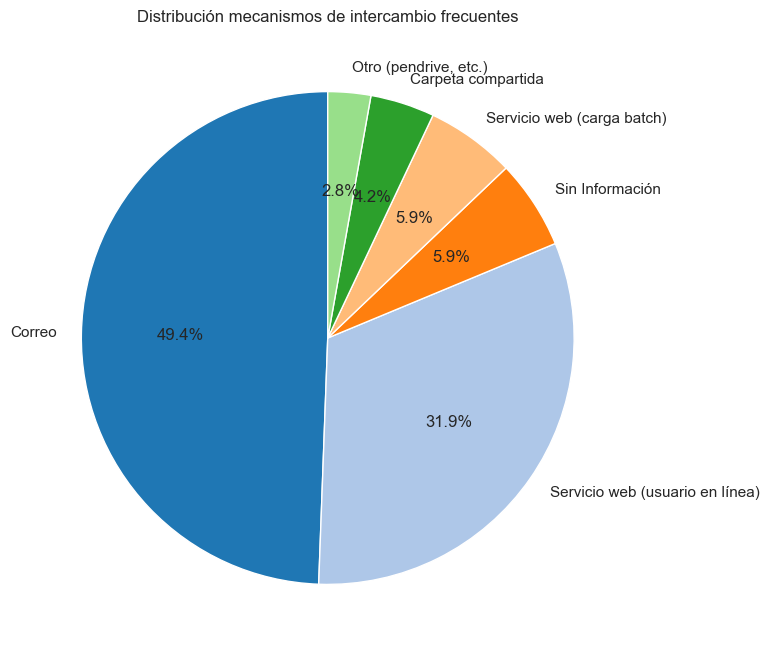

In [200]:
counts = MecanismosIntercambio['P7.3'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)

plt.title('Distribución mecanismos de intercambio frecuentes')

plt.show()

## Análisis Etapa 2

### P2.3

In [201]:
InsSinEquipo = cuestionario[['Fecha de respuesta',"Tipo","P1.1.1","P2.2","P2.3"]]
InsSinEquipo = InsSinEquipo[InsSinEquipo['P2.2']=="No"]
InsSinEquipo = InsSinEquipo[~(InsSinEquipo['P2.3']=="#s.i.")]

# Ejemplos
InsSinEquipo["TipoCoberturaTI"] = ""
InsSinEquipo.at[8,"TipoCoberturaTI"] = "Tercerizado"
InsSinEquipo.at[41,"TipoCoberturaTI"] = "Tercerizado"
InsSinEquipo.at[199,"TipoCoberturaTI"] = "Tercerizado"
InsSinEquipo.at[97,"TipoCoberturaTI"] = "Otro instituto"
InsSinEquipo.at[11,"TipoCoberturaTI"] = "Otro instituto"
InsSinEquipo.at[225,"TipoCoberturaTI"] = "Otro instituto"
InsSinEquipo.at[223,"TipoCoberturaTI"] = "Otro instituto"
InsSinEquipo.at[92,"TipoCoberturaTI"] = "Soporte tecnico"
InsSinEquipo.at[81,"TipoCoberturaTI"] = "Soporte tecnico"
InsSinEquipo.at[189,"TipoCoberturaTI"] = "Soporte tecnico"
InsSinEquipo.at[27,"TipoCoberturaTI"] = "Empleado unico"
InsSinEquipo.at[21,"TipoCoberturaTI"] = "Empleado unico"
InsSinEquipo.at[127,"TipoCoberturaTI"] = "Empleado unico"
InsSinEquipo.at[60,"TipoCoberturaTI"] = "Empleados regulares"
InsSinEquipo.at[68,"TipoCoberturaTI"] = "Tercerizado"
InsSinEquipo.at[160,"TipoCoberturaTI"] = "Empleado unico"
InsSinEquipo.at[288,"TipoCoberturaTI"] = "Empleado unico"
InsSinEquipo.at[350,"TipoCoberturaTI"] = "Tercerizado"
InsSinEquipo.at[412,"TipoCoberturaTI"] = "Empleados regulares"
InsSinEquipo.at[231,"TipoCoberturaTI"] = "Soporte tecnico"

training_data = InsSinEquipo[InsSinEquipo['TipoCoberturaTI'] != '']

train_data, test_data, train_labels, test_labels = train_test_split(
    training_data['P2.3'],
    training_data['TipoCoberturaTI'],
    test_size=0.2,
    random_state=42
)
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(train_data)
test_vectors = vectorizer.transform(test_data)

classifier = MultinomialNB()
classifier.fit(train_vectors, train_labels)
InsSinEquipo['Prediccion_Categoria'] = classifier.predict(vectorizer.transform(InsSinEquipo['P2.3']))
InsSinEquipo.drop(columns="TipoCoberturaTI",inplace=True)
InsSinEquipo.rename(columns={"Prediccion_Categoria":"CoberturaTI"}, inplace=True)

In [202]:
TipoCobertura = InsSinEquipo[["Tipo","CoberturaTI"]]

¿Cómo cubren las necesidades de informática las instituciones sin equipo propio?

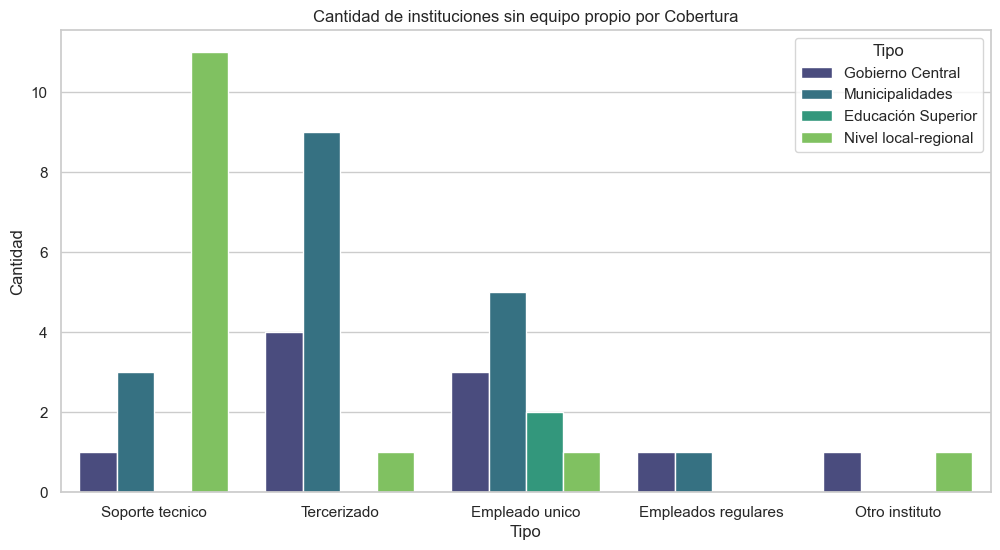

In [203]:
plt.figure(figsize=(12, 6))
sns.countplot(x='CoberturaTI', hue='Tipo', data=TipoCobertura, palette='viridis')
plt.title('Cantidad de instituciones sin equipo propio por Cobertura')
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
plt.show()

### P8.2 y P2.2

In [204]:
EquipoYPlanMejora = cuestionario[["Tipo","P2.2","P8.2"]]
EquipoYPlanMejora = EquipoYPlanMejora.replace({'#s.i.': 'Sin Información', '#n.a.': 'Sin Información',"Sí":"Si","No, sin embargo estamos trabajando en la elaboración de un plan de mejora continua de nuestras plataformas":"Plan en proceso"})

Instituciones con plan de mejora de plataformas

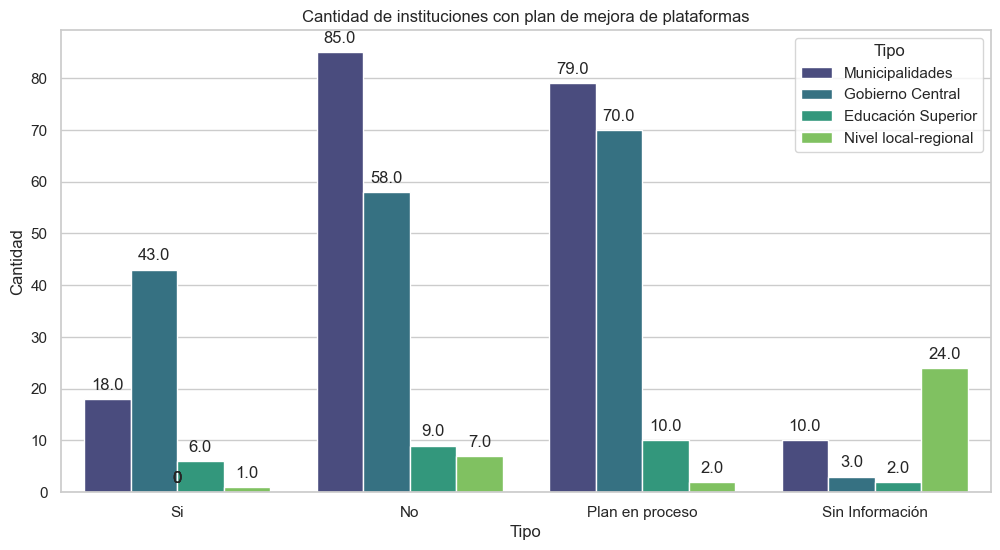

In [205]:
orden = ['Si', 'No', 'Plan en proceso', 'Sin Información']
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='P8.2', hue='Tipo', data=EquipoYPlanMejora, palette='viridis', order=orden)
plt.title('Cantidad de instituciones con plan de mejora de plataformas')
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

Instituciones con área de informática

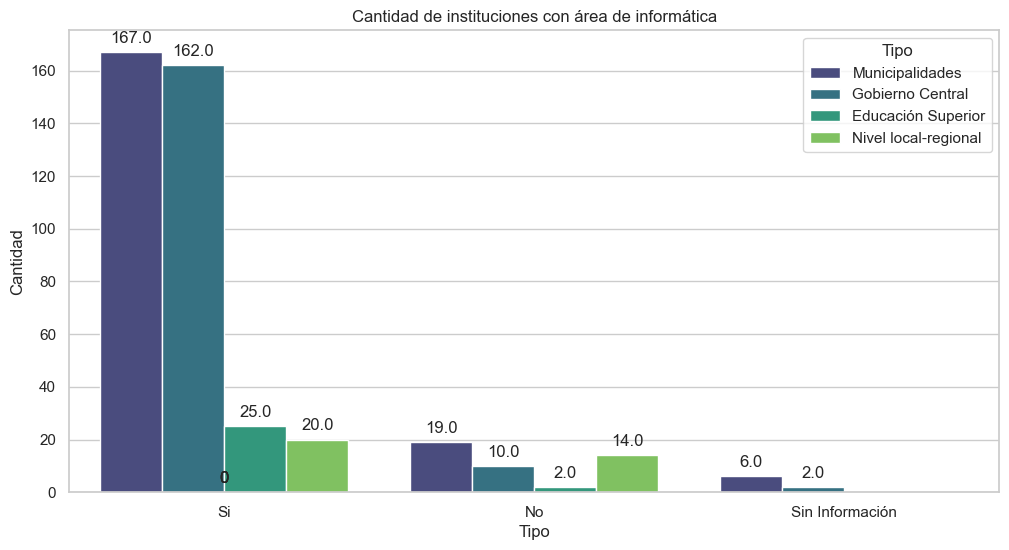

In [206]:
ordenar = ['Si', 'No', 'Sin Información']
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='P2.2', hue='Tipo', data=EquipoYPlanMejora, palette='viridis', order=ordenar)
plt.title('Cantidad de instituciones con área de informática')
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [207]:
EquipoYPlanMejoraCruce = EquipoYPlanMejora[EquipoYPlanMejora['P2.2']!="Sin Información"]

Relaciones entre instituciones con área informatica y plan de mejora de plataformas

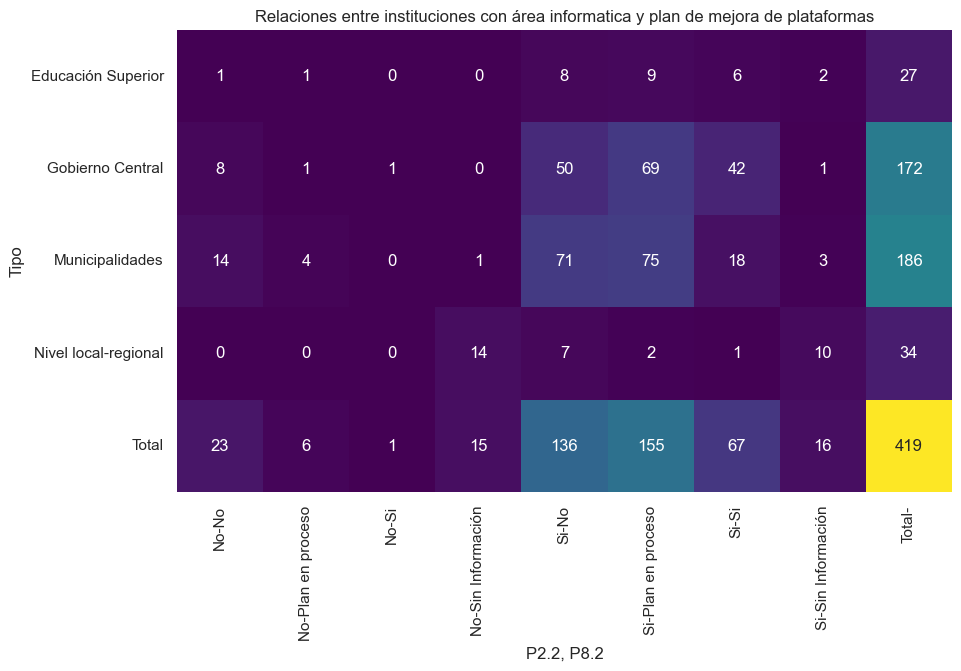

In [208]:
tabla_contingencia = pd.crosstab(index=EquipoYPlanMejoraCruce['Tipo'], columns=[EquipoYPlanMejoraCruce['P2.2'], EquipoYPlanMejoraCruce['P8.2']], margins=True, margins_name="Total")

plt.figure(figsize=(10, 6))
sns.heatmap(tabla_contingencia, annot=True, cmap='viridis', fmt='d', cbar=False)
plt.title('Relaciones entre instituciones con área informatica y plan de mejora de plataformas')
plt.xlabel('P2.2, P8.2')
plt.ylabel('Tipo')
plt.show()

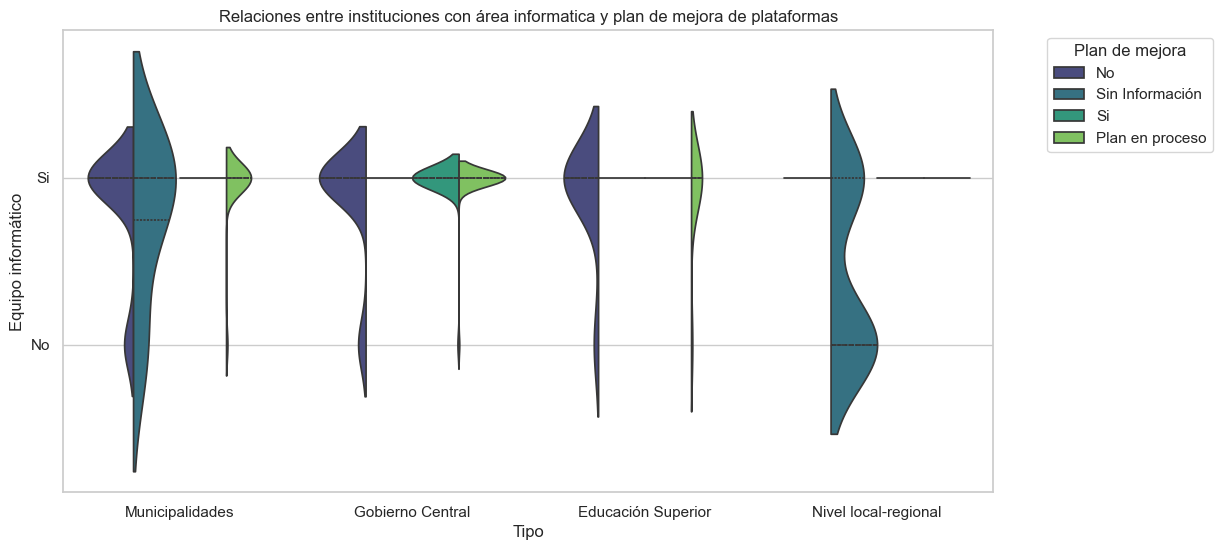

In [209]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Tipo', y='P2.2', hue='P8.2', data=EquipoYPlanMejoraCruce, split=True, inner='quartile', palette='viridis')
plt.title('Relaciones entre instituciones con área informatica y plan de mejora de plataformas')
plt.xlabel('Tipo')
plt.ylabel('Equipo informático')
plt.legend(title="Plan de mejora", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### P3

In [210]:
PlanImplementacion = cuestionario[["Tipo", "P3.1", "P3.4"]]
PlanImplementacion = PlanImplementacion.replace({'#s.i.': 'Sin Información', '#n.a.': 'Sin Información'})

Instituciones con plan de implementacón de la ley 21.180

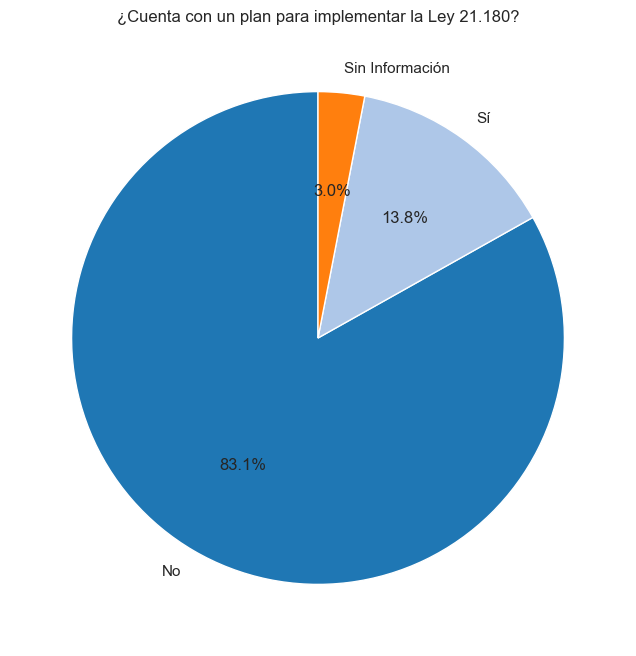

In [211]:
counts = PlanImplementacion['P3.1'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)

plt.title('¿Cuenta con un plan para implementar la Ley 21.180?')

plt.show()

Frecuencia de instituciones por actualizacion de avances y tipo

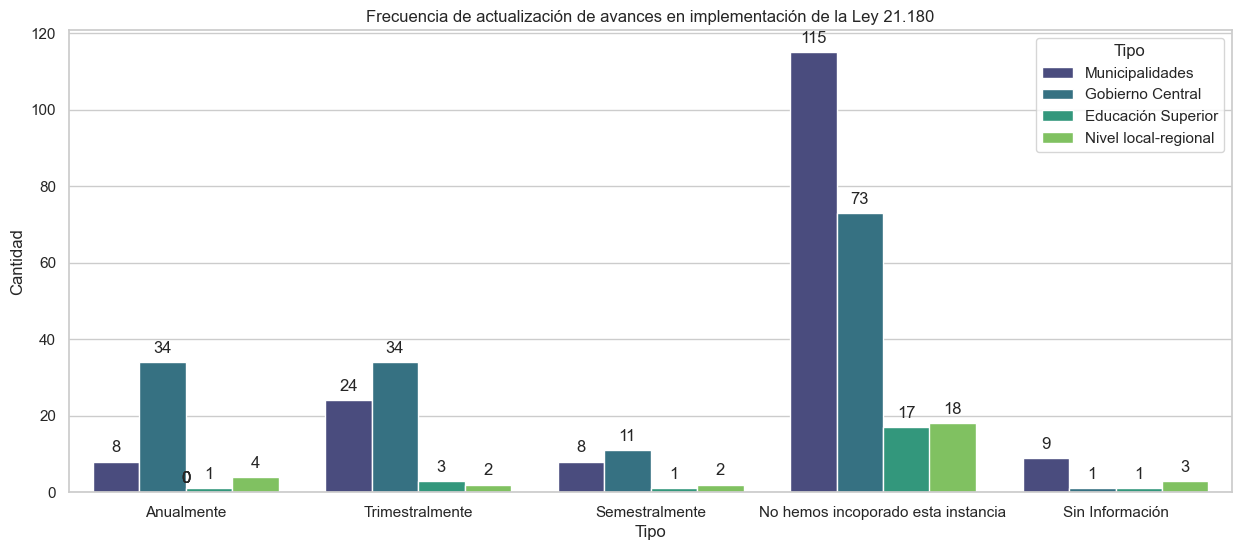

In [212]:
orden = ['Anualmente', 'Trimestralmente', 'Semestralmente','Anualmente', 'No hemos incoporado esta instancia', 'Sin Información']
plt.figure(figsize=(15, 6))
ax = sns.countplot(x='P3.4', hue='Tipo', data=PlanImplementacion, palette='viridis', order=orden)
plt.title('Frecuencia de actualización de avances en implementación de la Ley 21.180')
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [213]:
ConPlanImplementacion = PlanImplementacion[PlanImplementacion['P3.1']=="Sí"]

Frecuencia de instituciones por actualizacion de avances y tipo - Solo aquellas con plan de implementacion

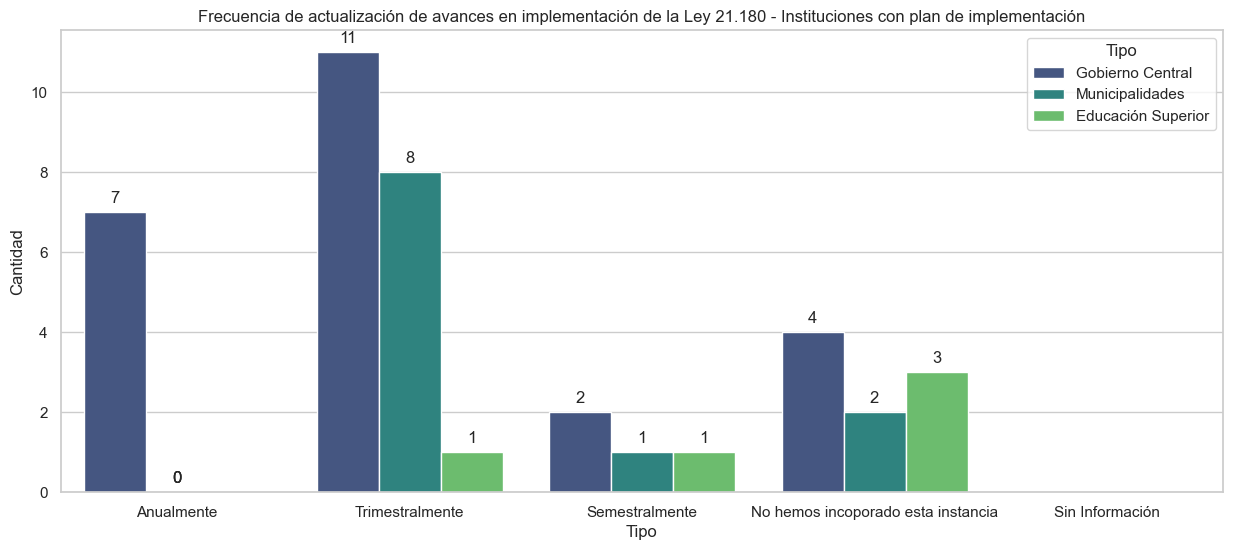

In [214]:
orden = ['Anualmente', 'Trimestralmente', 'Semestralmente','Anualmente', 'No hemos incoporado esta instancia', 'Sin Información']
plt.figure(figsize=(15, 6))
ax = sns.countplot(x='P3.4', hue='Tipo', data=ConPlanImplementacion, palette='viridis', order=orden)
plt.title('Frecuencia de actualización de avances en implementación de la Ley 21.180 - Instituciones con plan de implementación')
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [215]:
EjesExternos = cuestionario[["Tipo", "P3.5.1", "P3.5.2", "P3.5.3", "P3.5.4", "P3.5.5"]]

In [216]:
EjesExternos = EjesExternos.replace({'#s.i.': 'Sin Información', '#n.a.': 'Sin Información', '#n.s.': 'Sin Información'})
EjesExternos = EjesExternos.replace({'Fortalecimiento del equipo de Transformación Digital (formación, capacitación, atracción de talento).': 'Fortalecimiento del equipo de Transformación Digital', 'Gestión del cambio de los funcionarios (planes de sensibilización, difusión de la LTD, adopción de nuevas herramientas)':'Gestión del cambio de los funcionarios', 'Uso intensivo de datos para la gestión institucional (recolección, anonimización, limpieza, publicación, difusión, análisis, reutilización de datos)':'Uso intensivo de datos para la gestión institucional','Otro (¿cuál?)':'Otro'})

Otros ejes trabajados por las instituciones

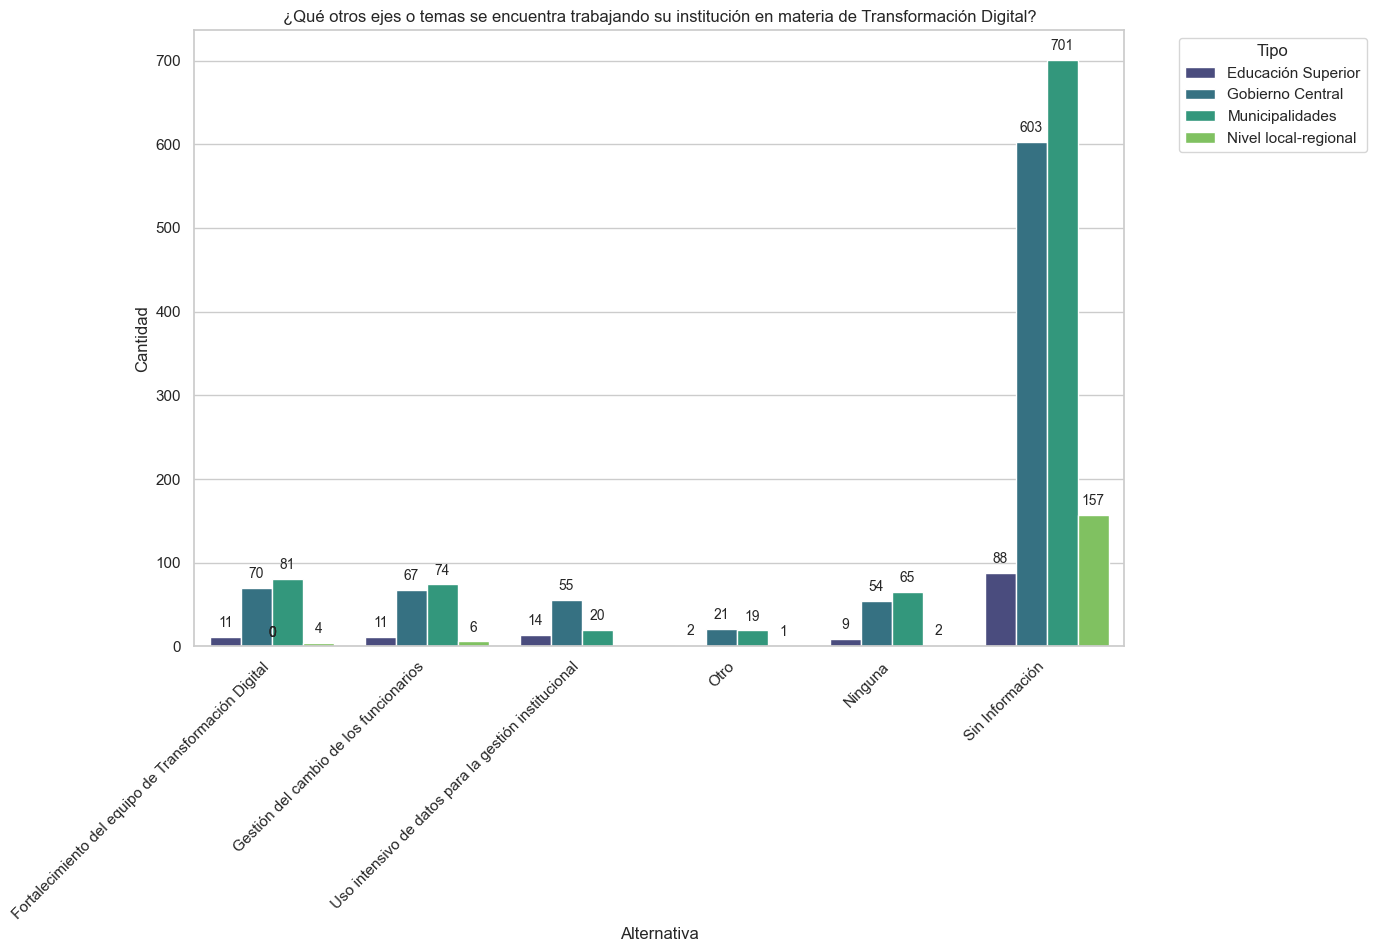

In [217]:
orden = ['Fortalecimiento del equipo de Transformación Digital', 'Gestión del cambio de los funcionarios', 'Uso intensivo de datos para la gestión institucional', 'Otro','Ninguna', 'Sin Información']
melted_df = EjesExternos.melt(id_vars=['Tipo'], var_name='Alternativa', value_name='Respuesta')
count_df = melted_df.groupby(['Tipo', 'Respuesta']).size().reset_index(name='Cantidad')

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Respuesta', y='Cantidad', hue='Tipo', data=count_df, palette='viridis', order=orden)

plt.title('¿Qué otros ejes o temas se encuentra trabajando su institución en materia de Transformación Digital?')
plt.xlabel('Alternativa')
plt.ylabel('Cantidad')
plt.legend(title="Tipo", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)


plt.show()

### P10.4

In [218]:
InsApp = cuestionario[["Tipo", "P10.4"]]
InsApp = InsApp.replace({'#s.i.': 'Sin Información', '#n.a.': 'Sin Información'})

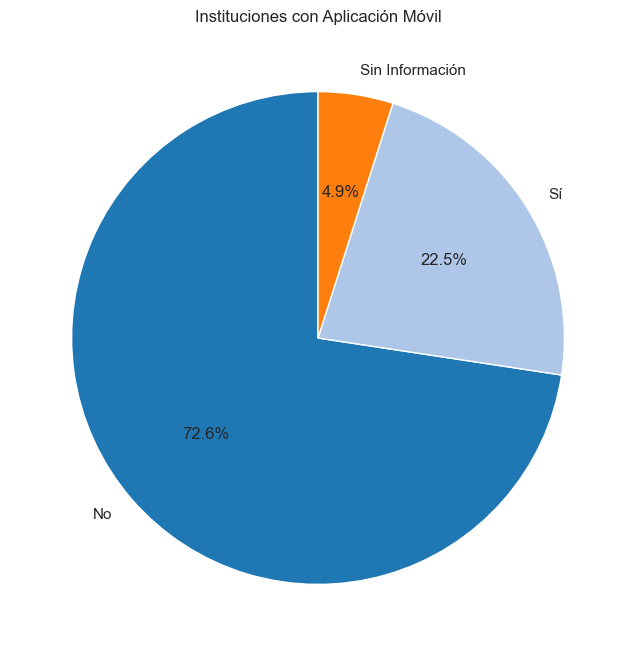

In [219]:
counts = InsApp['P10.4'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)

plt.title('Instituciones con Aplicación Móvil')

plt.show()

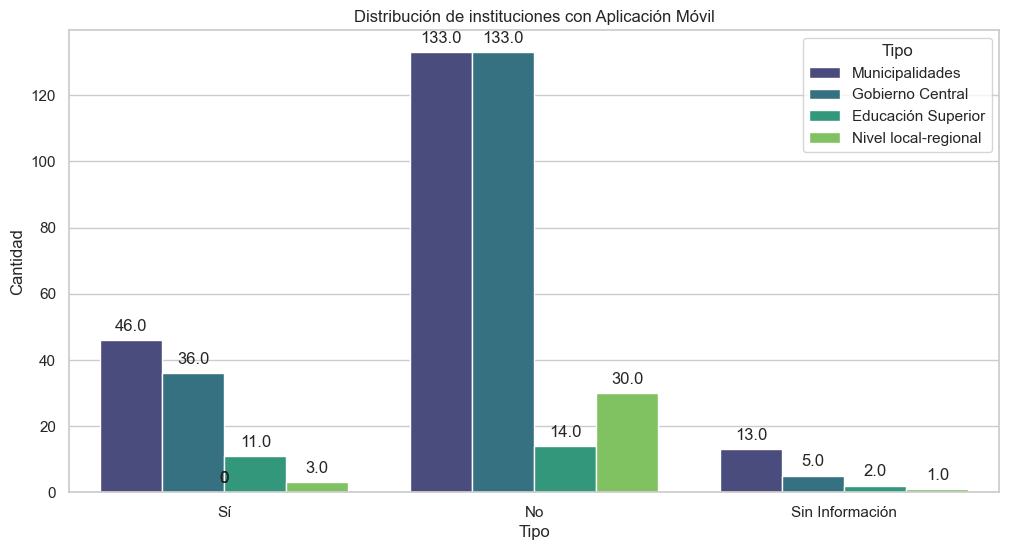

In [220]:
orden = ['Sí', 'No', 'Sin Información']
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='P10.4', hue='Tipo', data=InsApp, palette='viridis', order=orden)
plt.title('Distribución de instituciones con Aplicación Móvil')
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [221]:
GastosTIC = cuestionario[["Tipo","P10.4","P13.GC.2.1","P13.GC.2.2","P13.GC.2.3","P13.GC.2.4","P13.GC.2.5","P13.GC.2.6","P13.GC.3.1","P13.GC.3.2","P13.GC.3.3","P13.GC.3.4","P13.GC.3.5","P13.GC.3.6","P13.GC.3.7","P13.GC.3.8"]]
GastosTIC = GastosTIC.replace({'#s.i.': 0, '#n.a.': 0})
GastosTIC["TotalGastos"] = GastosTIC.iloc[:, 2:-1].sum(axis=1)
GastosTICTotal = GastosTIC[["Tipo","P10.4","TotalGastos"]]
GastosTICTotal = GastosTICTotal[GastosTICTotal["TotalGastos"] != 0]

In [222]:
promedio_por_p10_4 = GastosTICTotal.groupby(['Tipo', 'P10.4'])['TotalGastos'].mean().reset_index()


C:\Users\alejo\AppData\Local\Temp\ipykernel_6908\1299246838.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,}'.format(int(x/1e6)) for x in ax.get_yticks()])


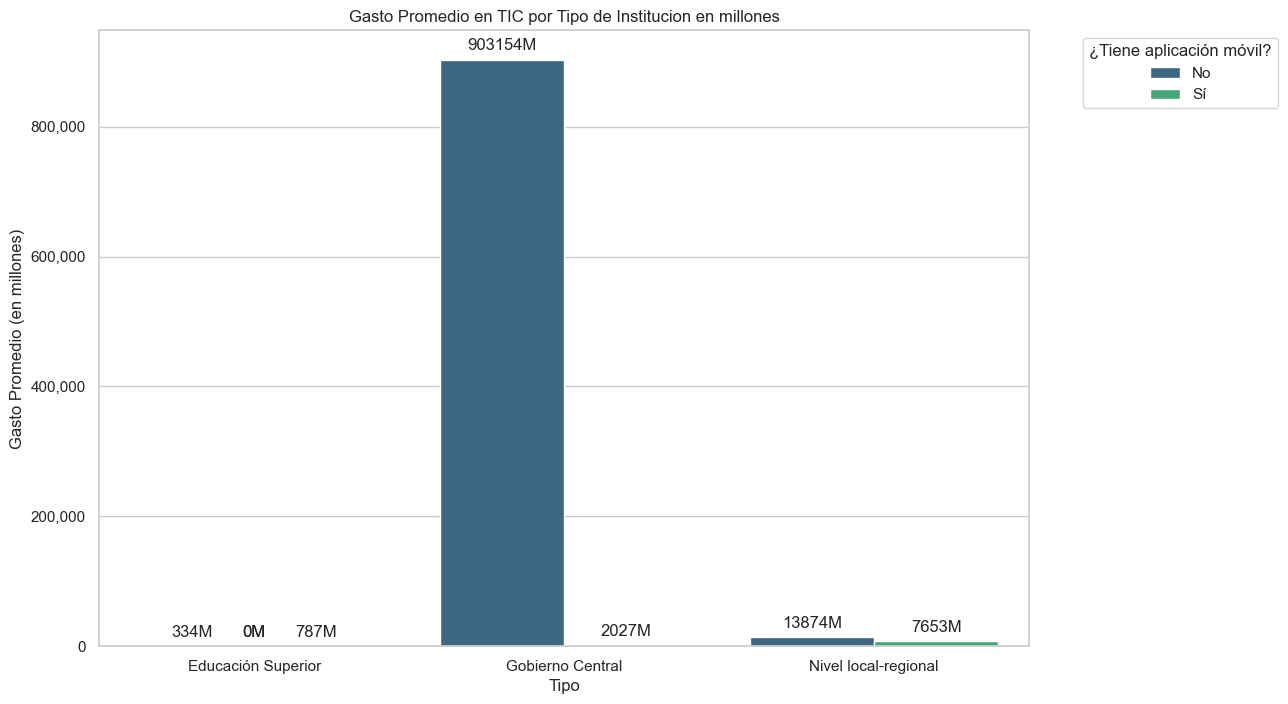

In [223]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Tipo', y='TotalGastos', hue='P10.4', data=promedio_por_p10_4, errorbar=None, palette='viridis')

ax.set_yticklabels(['{:,}'.format(int(x/1e6)) for x in ax.get_yticks()])


plt.title('Gasto Promedio en TIC por Tipo de Institucion en millones')
plt.xlabel('Tipo')
plt.ylabel('Gasto Promedio (en millones)')
plt.legend(title="¿Tiene aplicación móvil?", bbox_to_anchor=(1.05, 1), loc='upper left')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height()/1e6)}M', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

### P4.4 y P5.5

In [224]:
GDyDF = cuestionario[["Tipo","P4.4","P5.5"]]
GDyDF.loc[:, "P4.4"] = GDyDF["P4.4"].replace({'#s.i.': 0, '#n.a.': 0})
GDyDF.loc[:, "P5.5"] = GDyDF["P5.5"].replace({'#s.i.': "Sin Información"})

Relacion entre presencia de politica de gestión documental con cantidad de documentos firmados electronicamente

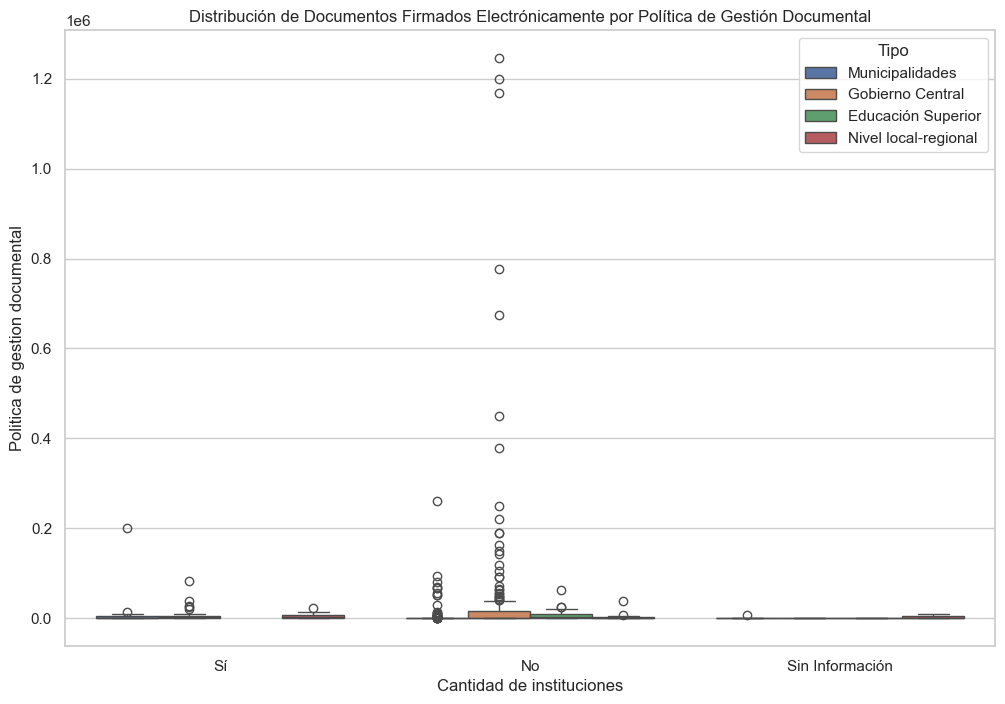

In [225]:
orden = ["Sí", "No", "Sin Información"]
plt.figure(figsize=(12, 8))
sns.boxplot(x='P5.5', y='P4.4', data=GDyDF, hue='Tipo', order=orden)
plt.title('Distribución de Documentos Firmados Electrónicamente por Política de Gestión Documental')
plt.ylabel('Politica de gestion documental')
plt.xlabel('Cantidad de instituciones')
plt.show()

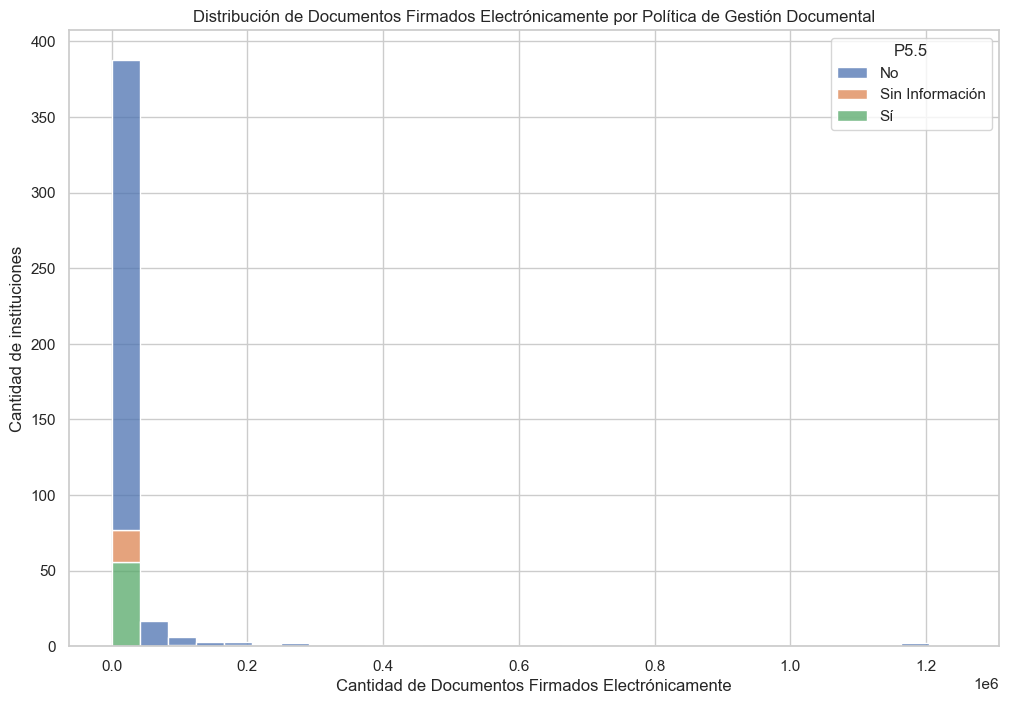

In [226]:
plt.figure(figsize=(12, 8))
sns.histplot(data=GDyDF, x='P4.4', hue='P5.5', multiple='stack', bins=30)
plt.title('Distribución de Documentos Firmados Electrónicamente por Política de Gestión Documental')
plt.xlabel('Cantidad de Documentos Firmados Electrónicamente')
plt.ylabel('Cantidad de instituciones')
plt.show()

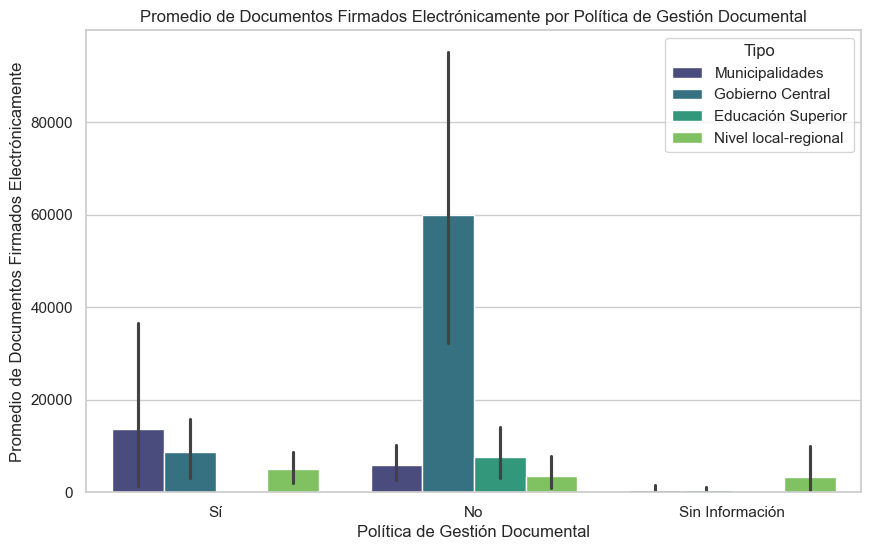

In [227]:
orden = ["Sí", "No", "Sin Información"]
plt.figure(figsize=(10, 6))
sns.barplot(x='P5.5', y='P4.4', data=GDyDF, hue='Tipo', palette='viridis', order=orden)
plt.title('Promedio de Documentos Firmados Electrónicamente por Política de Gestión Documental')
plt.xlabel('Política de Gestión Documental')
plt.ylabel('Promedio de Documentos Firmados Electrónicamente')
plt.show()

### P8.1 y P7.1

In [228]:
PlataformasInterop = cuestionario[["Tipo","P7.1.1","P8.1"]]


In [229]:
PlataformasInterop["P7.1.1"] = PlataformasInterop["P7.1.1"].replace({'#s.i.': 'No interactúan'})
PlataformasInterop = PlataformasInterop.dropna()
PlataformasInterop['Interactuan'] = PlataformasInterop['P7.1.1'].apply(lambda x: 'Sí interactúan' if x != 'No interactúan' else x)
PlataformasInterop["P8.1"] = PlataformasInterop["P8.1"].replace({'#s.i.': 'Sin Información', '#n.a.': 'Sin Información', 'No, sin embargo estamos trabajando en la identificación de las plataformas electrónicas':'En proceso'})
PlataformasInterop = PlataformasInterop[['Tipo', 'Interactuan', 'P8.1']]

C:\Users\alejo\AppData\Local\Temp\ipykernel_6908\551549542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PlataformasInterop["P7.1.1"] = PlataformasInterop["P7.1.1"].replace({'#s.i.': 'No interactúan'})


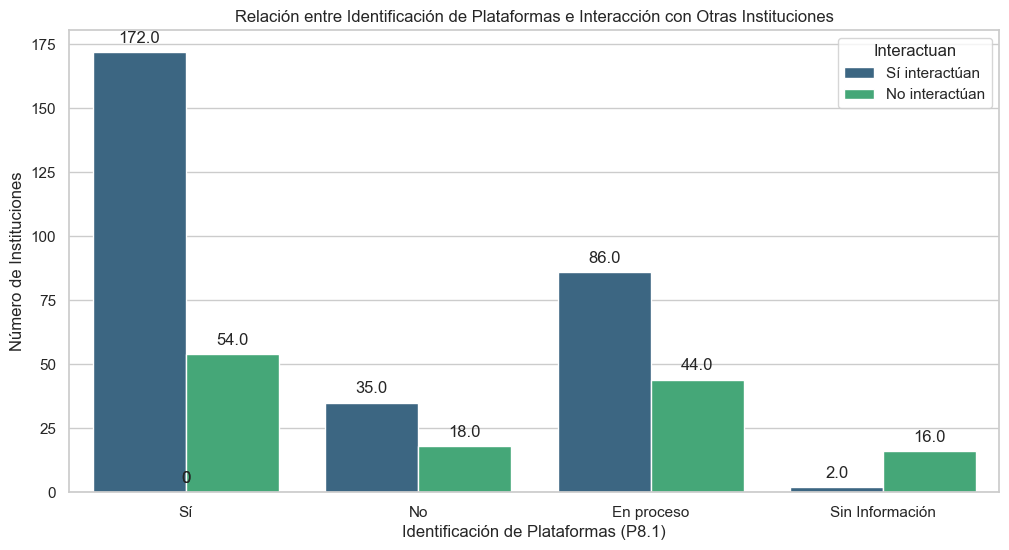

In [230]:
orden = ['Sí', 'No', 'En proceso', 'Sin Información']
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='P8.1', hue='Interactuan', data=PlataformasInterop, palette='viridis', order=orden)
plt.title('Relación entre Identificación de Plataformas e Interacción con Otras Instituciones')
plt.xlabel('Identificación de Plataformas (P8.1)')
plt.ylabel('Número de Instituciones')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

### P11.4 P11.9

Relacion medidas de seguridad implementadas con las actividades de difusión y entrenamiento sobre seguridad de la información.

In [231]:
MedidasyEntrenamiento = cuestionario[["Tipo", "P11.4", "P11.9.1","P11.9.2","P11.9.3","P11.9.4","P11.9.5","P11.9.6","P11.9.7","P11.9.8","P11.9.9","P11.9.10","P11.9.11","P11.9.12"]]
MedidasyEntrenamiento = MedidasyEntrenamiento.replace({'#s.i.': 'Sin Información', '#n.a.': 'Sin Información',"#n.a.":"Sin Información","#s.i.":"Sin Información","#n.s.":"Sin Información","#n.a.":"Sin Información"})

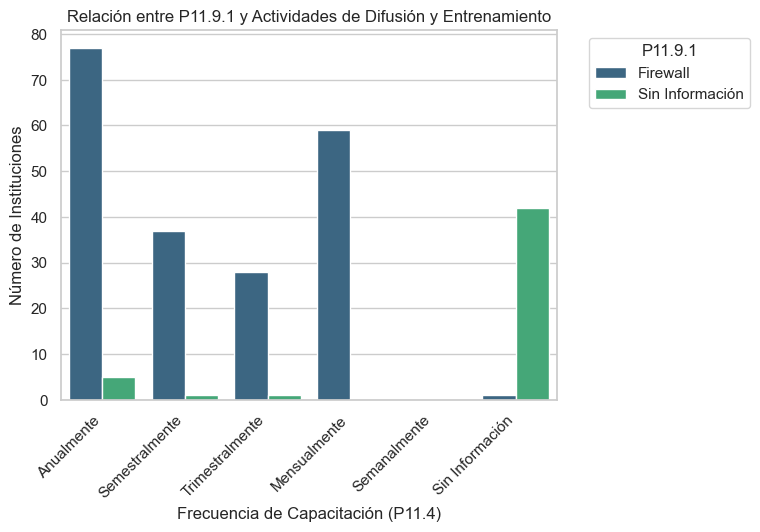

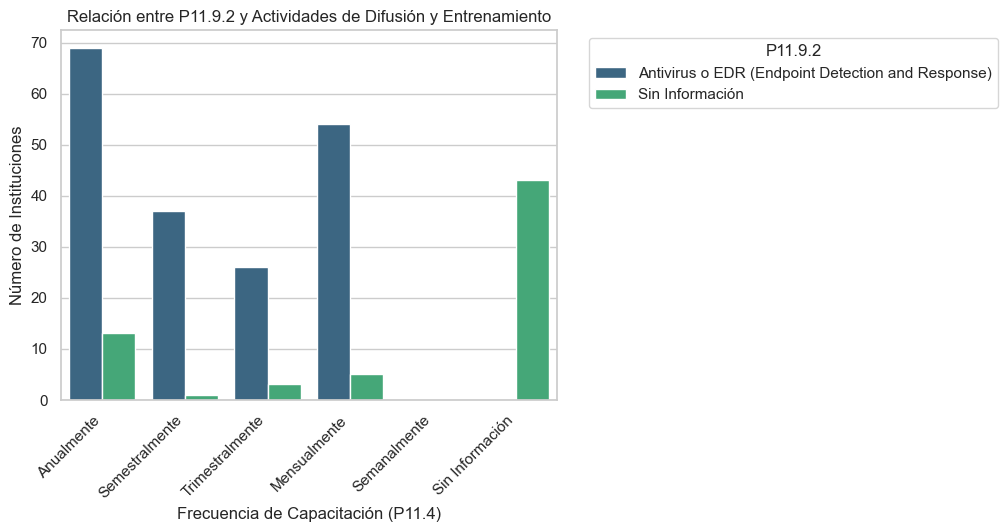

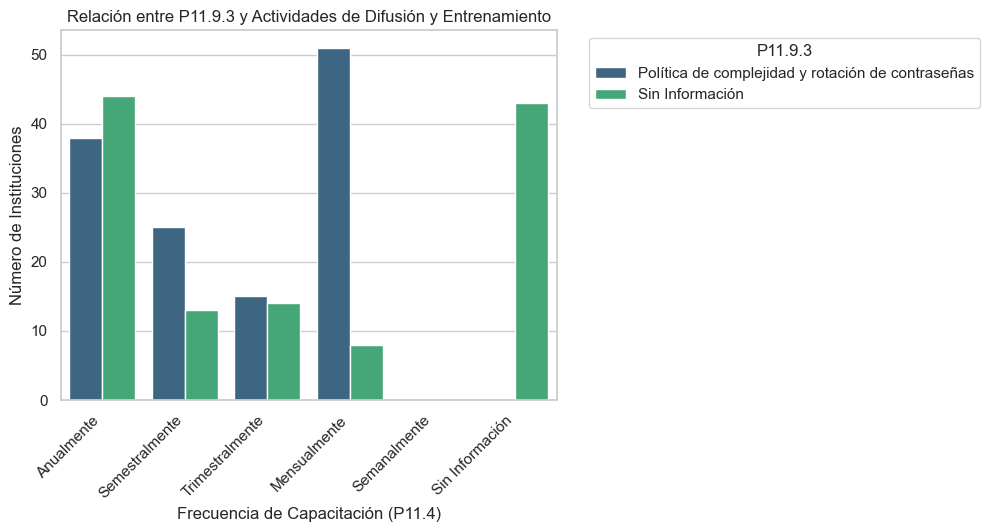

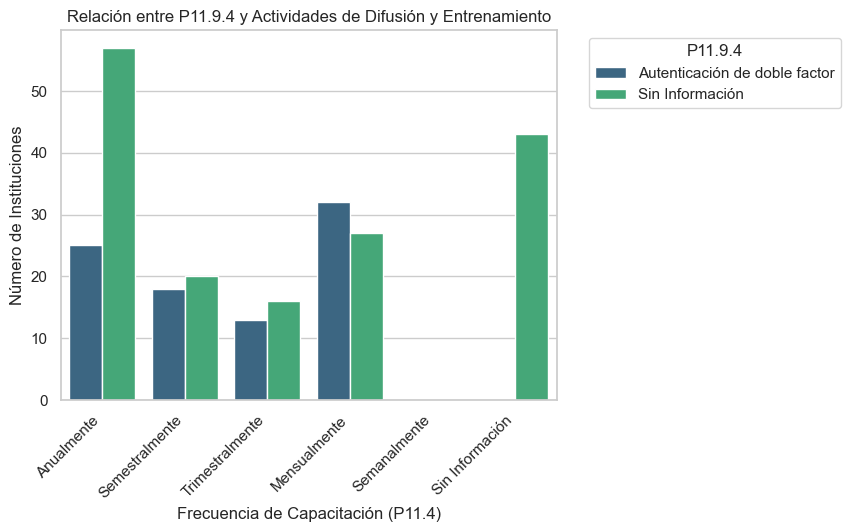

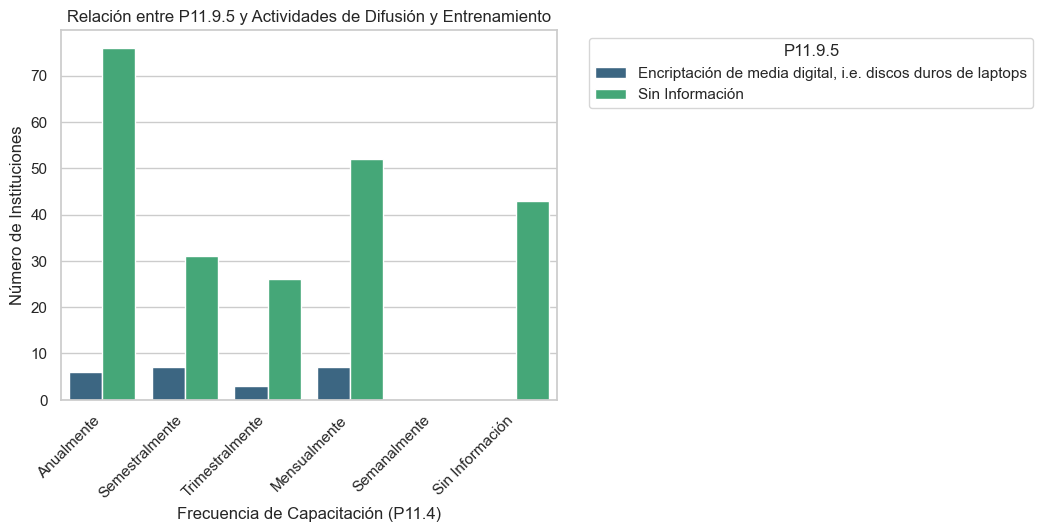

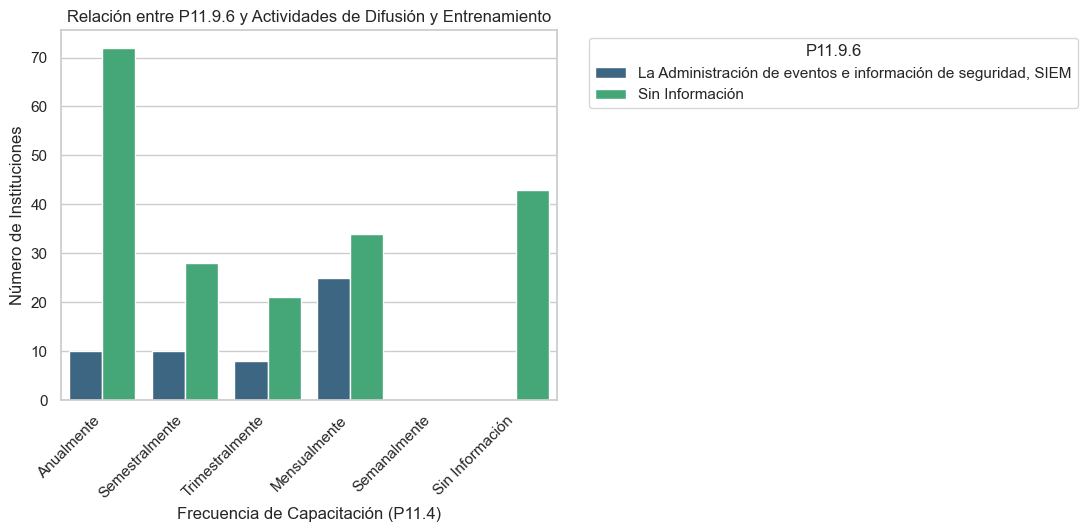

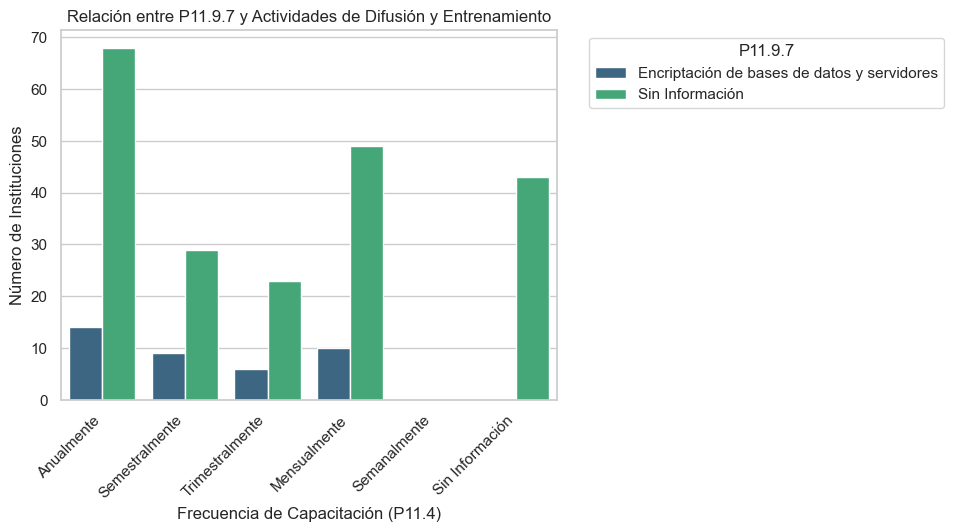

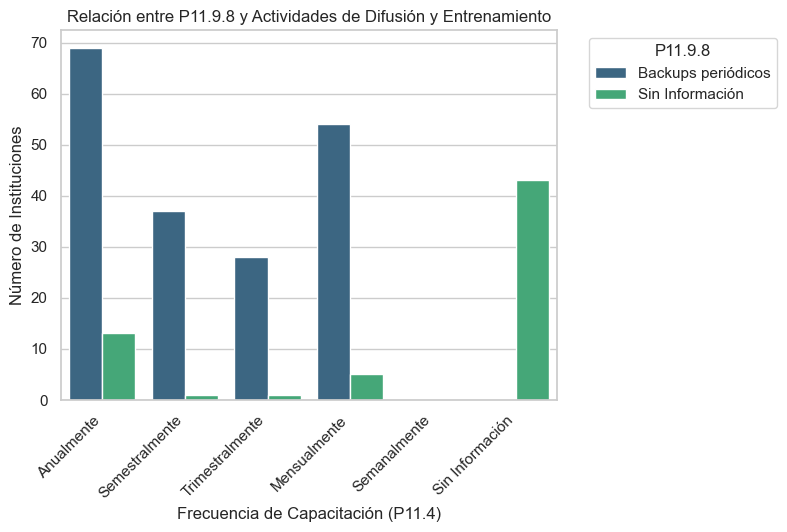

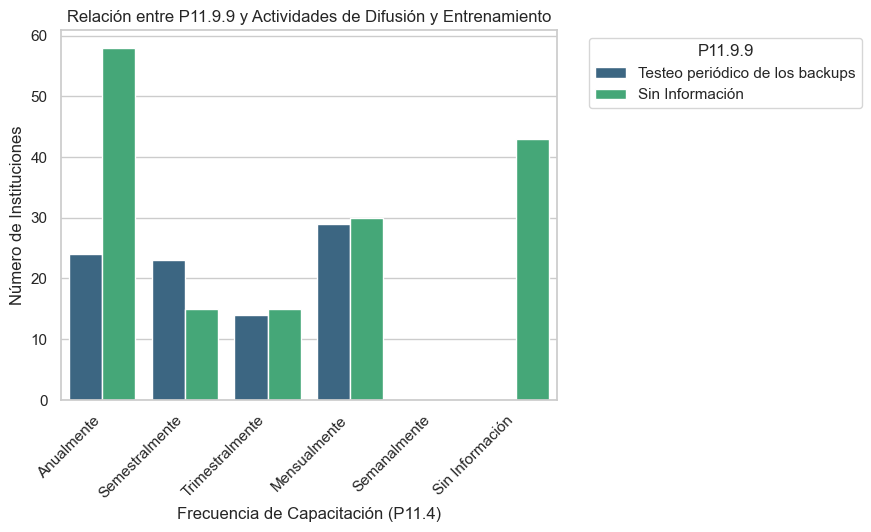

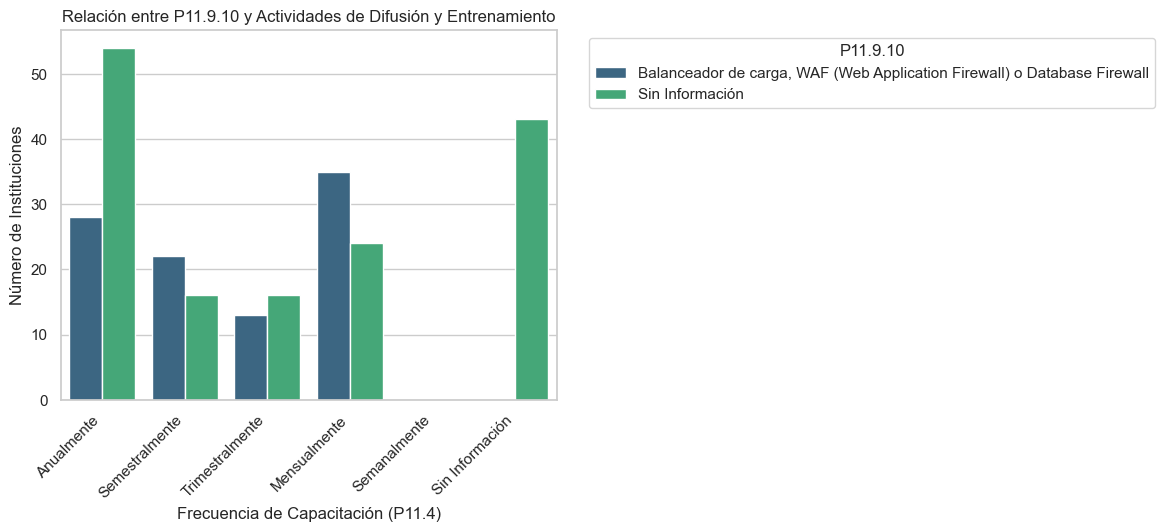

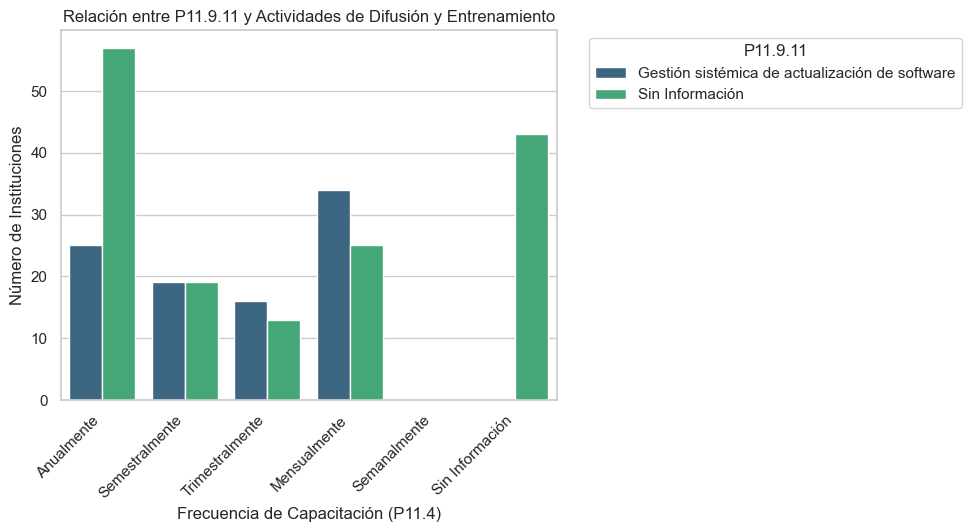

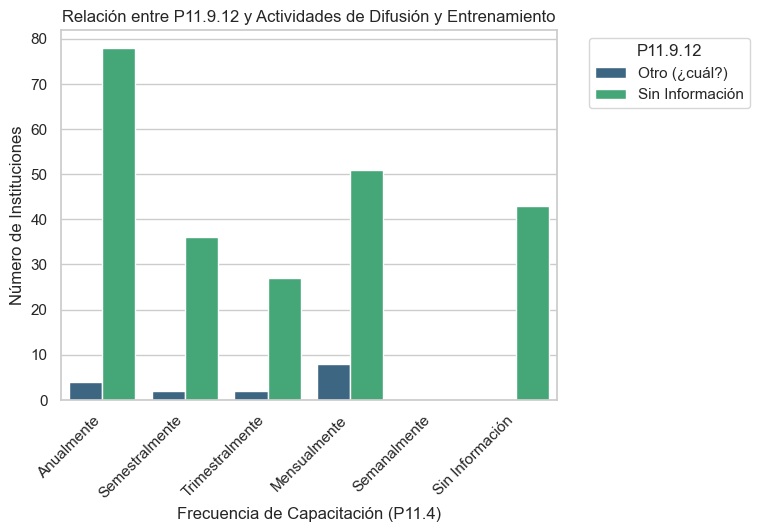

In [232]:
orden_hue = ["Firewall", "Antivirus o EDR (Endpoint Detection and Response)", "Política de complejidad y rotación de contraseñas", "Autenticación de doble factor", "Encriptación de media digital, i.e. discos duros de laptops", "La Administración de eventos e información de seguridad, SIEM", "Encriptación de bases de datos y servidores", "Backups periódicos", "Testeo periódico de los backups", "Balanceador de carga, WAF (Web Application Firewall) o Database Firewall", "Gestión sistémica de actualización de software",'Otro (¿cuál?)', "Sin Información"]
columnas_relacionadas = ["P11.4","P11.9.1","P11.9.2","P11.9.3","P11.9.4","P11.9.5","P11.9.6","P11.9.7","P11.9.8","P11.9.9","P11.9.10","P11.9.11","P11.9.12"]
for i, columna in enumerate(columnas_relacionadas[1:]):
    sns.countplot(x="P11.4", hue=columna, data=MedidasyEntrenamiento, palette='viridis',order=["Anualmente", "Semestralmente", "Trimestralmente", "Mensualmente", "Semanalmente", "Sin Información"],hue_order=[orden_hue[i],"Sin Información"])

    plt.title(f'Relación entre {columna} y Actividades de Difusión y Entrenamiento')
    plt.xlabel('Frecuencia de Capacitación (P11.4)')
    plt.ylabel('Número de Instituciones')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title=columna, bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()

### P2.7, P13.GC.2, P13.GC.3

In [43]:
GastoxFormacion = cuestionario[["Tipo", "P2.7.1", "P2.7.2", "P2.7.3", "P2.7.4", "P2.7.5", "P2.7.6","P13.GC.2.1","P13.GC.2.2","P13.GC.2.3","P13.GC.2.4","P13.GC.2.5","P13.GC.2.6","P13.GC.3.1","P13.GC.3.2","P13.GC.3.3","P13.GC.3.4","P13.GC.3.5","P13.GC.3.6","P13.GC.3.7","P13.GC.3.8"]]
GastoxFormacion = GastoxFormacion.replace({'#s.i.': 0, '#n.a.': 0})
GastoxFormacion["TotalGastos"] = GastoxFormacion.iloc[:, 7:-1].sum(axis=1)

In [44]:
GastoxFormacion = GastoxFormacion[['Tipo', 'P2.7.1', 'P2.7.2', 'P2.7.3', 'P2.7.4', 'P2.7.5', 'P2.7.6', 'TotalGastos']]

In [45]:
columnas_formacion = ["P2.7.1", "P2.7.2", "P2.7.3", "P2.7.4", "P2.7.5", "P2.7.6"]
data_formacion_gasto = GastoxFormacion[["TotalGastos"] + columnas_formacion]
gasto_bajo = data_formacion_gasto[data_formacion_gasto['TotalGastos'] <= 9999999999]
gasto_alto = data_formacion_gasto[data_formacion_gasto['TotalGastos'] > 9999999999]
outlier = gasto_alto.loc[192]
gasto_alto = gasto_alto.drop(192,axis=0)

In [46]:
outlier

0
TotalGastos    101739221076272
P2.7.1                       9
P2.7.2                       0
P2.7.3                       1
P2.7.4                       0
P2.7.5                      22
P2.7.6                       2
Name: 192, dtype: int64

In [47]:
gasto_bajo_melted = gasto_bajo.melt(id_vars="TotalGastos", var_name="Formacion", value_name="Cantidad")
gasto_alto_melted = gasto_alto.melt(id_vars="TotalGastos", var_name="Formacion", value_name="Cantidad")

Plot de la relación entre el gasto de una institución en área TIC y la cantidad de personal según su formación académica.

El dataset se divide en dos para factilitar la visualización ya que algunas instituciones tienen un gasto muy grande comparadas con el resto.

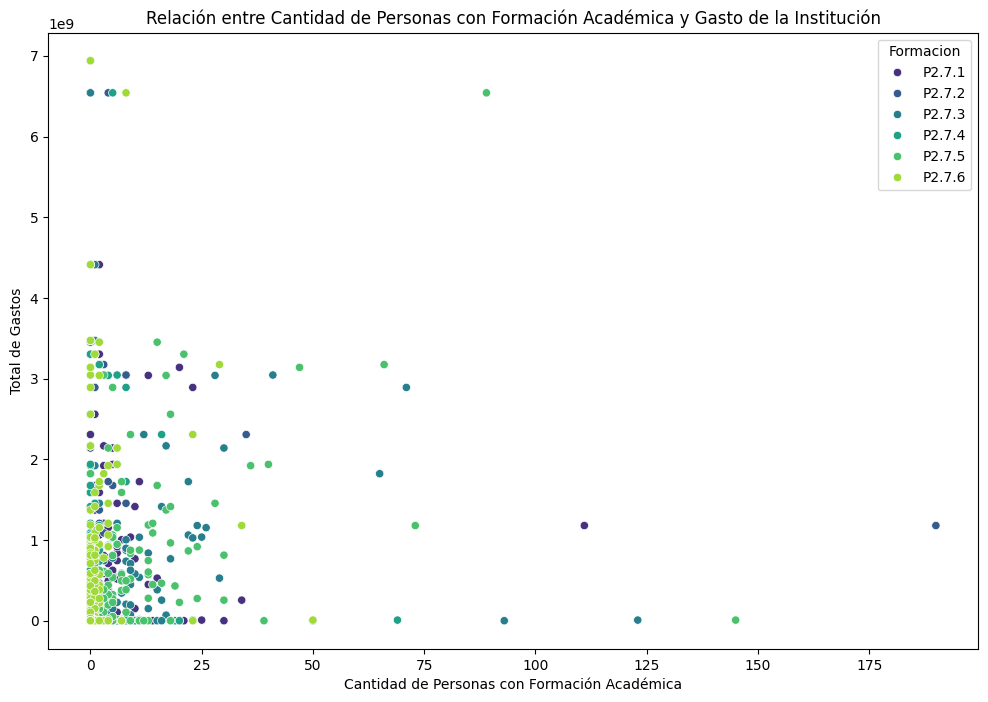

In [48]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="Cantidad", y="TotalGastos", hue="Formacion", data=gasto_bajo_melted, palette="viridis")

plt.title('Relación entre Cantidad de Personas con Formación Académica y Gasto de la Institución')
plt.xlabel('Cantidad de Personas con Formación Académica')
plt.ylabel('Total de Gastos')

plt.show()

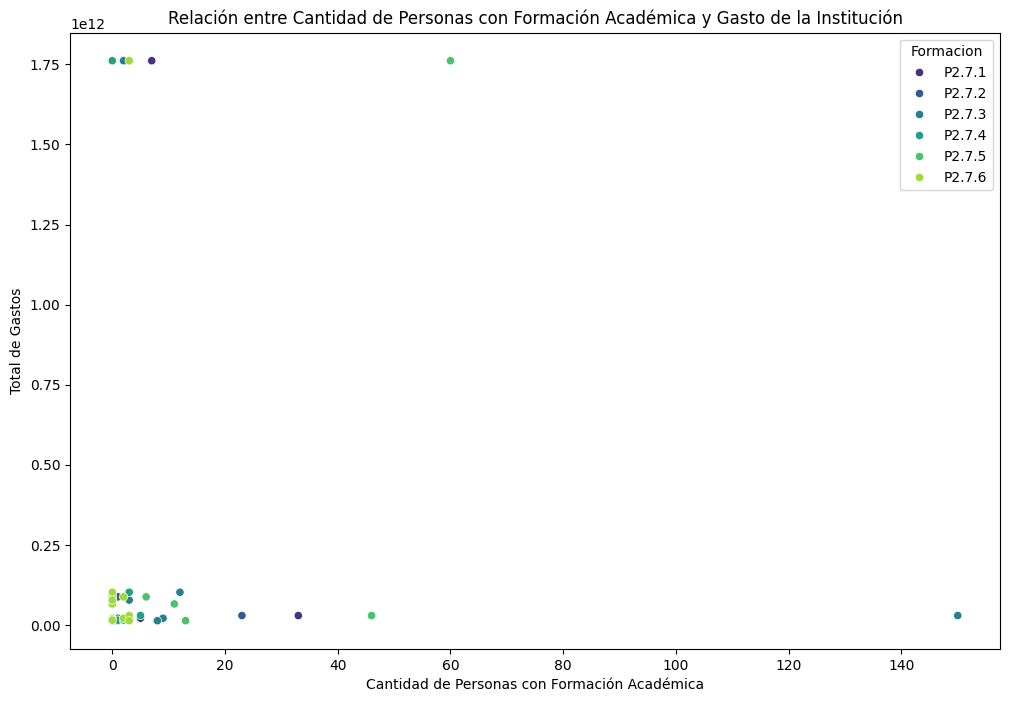

In [49]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="Cantidad", y="TotalGastos", hue="Formacion", data=gasto_alto_melted, palette="viridis")

plt.title('Relación entre Cantidad de Personas con Formación Académica y Gasto de la Institución')
plt.xlabel('Cantidad de Personas con Formación Académica')
plt.ylabel('Total de Gastos')

plt.show()

### P3.1, P3.3 y P13

In [58]:
GastoyAlineamiento = cuestionario[["P3.1","P3.3.1","P3.3.2","P3.3.3","P3.3.4","P3.3.5","P3.3.6","P3.3.7","P3.3.8","P3.3.9","P13.GC.2.1","P13.GC.2.2","P13.GC.2.3","P13.GC.2.4","P13.GC.2.5","P13.GC.2.6","P13.GC.3.1","P13.GC.3.2","P13.GC.3.3","P13.GC.3.4","P13.GC.3.5","P13.GC.3.6","P13.GC.3.7","P13.GC.3.8"]]
GastoyAlineamiento[["P3.1","P3.3.1","P3.3.2","P3.3.3","P3.3.4","P3.3.5","P3.3.6","P3.3.7","P3.3.8","P3.3.9"]] = GastoyAlineamiento[["P3.1","P3.3.1","P3.3.2","P3.3.3","P3.3.4","P3.3.5","P3.3.6","P3.3.7","P3.3.8","P3.3.9"]].replace({'#s.i.': 'Sin Información', '#n.a.': 'Sin Información', '#n.s.': 'Sin Información'})
GastoyAlineamiento = GastoyAlineamiento.replace({'#s.i.': 0, '#n.a.': 0})
GastoyAlineamiento["TotalGastos"] = GastoyAlineamiento.iloc[:, 10:-1].sum(axis=1)
# GastoyAlineamiento = GastoyAlineamiento.replace({'Fortalecimiento del equipo de Transformación Digital (formación, capacitación, atracción de talento).': 'Fortalecimiento del equipo de Transformación Digital', 'Gestión del cambio de los funcionarios (planes de sensibilización, difusión de la LTD, adopción de nuevas herramientas)':'Gestión del cambio de los funcionarios', 'Uso intensivo de datos para la gestión institucional (recolección, anonimización, limpieza, publicación, difusión, análisis, reutilización de datos)':'Uso intensivo de datos para la gestión institucional','Otro (¿cuál?)':'Otro'})

C:\Users\alejo\AppData\Local\Temp\ipykernel_13392\3574237538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GastoyAlineamiento[["P3.1","P3.3.1","P3.3.2","P3.3.3","P3.3.4","P3.3.5","P3.3.6","P3.3.7","P3.3.8","P3.3.9"]] = GastoyAlineamiento[["P3.1","P3.3.1","P3.3.2","P3.3.3","P3.3.4","P3.3.5","P3.3.6","P3.3.7","P3.3.8","P3.3.9"]].replace({'#s.i.': 'Sin Información', '#n.a.': 'Sin Información', '#n.s.': 'Sin Información'})


In [60]:
GastoyAlineamiento = GastoyAlineamiento[['P3.1', 'P3.3.1', 'P3.3.2', 'P3.3.3', 'P3.3.4', 'P3.3.5', 'P3.3.6', 'P3.3.7', 'P3.3.8', 'P3.3.9', 'TotalGastos']]

In [78]:
GastoyAlineamientoPI = GastoyAlineamiento[["P3.1","TotalGastos"]]
GastoyAlineamientoEjes = GastoyAlineamiento[["P3.3.1","P3.3.2","P3.3.3","P3.3.4","P3.3.5","P3.3.6","P3.3.7","P3.3.8","P3.3.9","TotalGastos"]]


In [69]:
GastoyAlineamientoPI_Bajo = GastoyAlineamientoPI[GastoyAlineamientoPI['TotalGastos'] <= 9999999999]
GastoyAlineamientoPI_Alto = GastoyAlineamientoPI[GastoyAlineamientoPI['TotalGastos'] > 9999999999]

C:\Users\alejo\AppData\Local\Temp\ipykernel_13392\2718151381.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='P3.1', y='TotalGastos', data=GastoyAlineamientoPI_Bajo, palette='viridis')


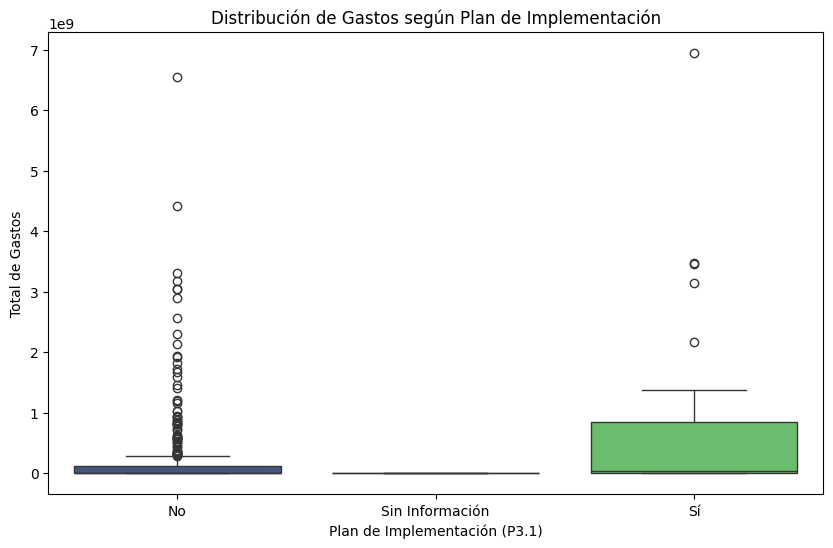

C:\Users\alejo\AppData\Local\Temp\ipykernel_13392\2718151381.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='P3.1', y='TotalGastos', data=GastoyAlineamientoPI_Bajo, palette='viridis')


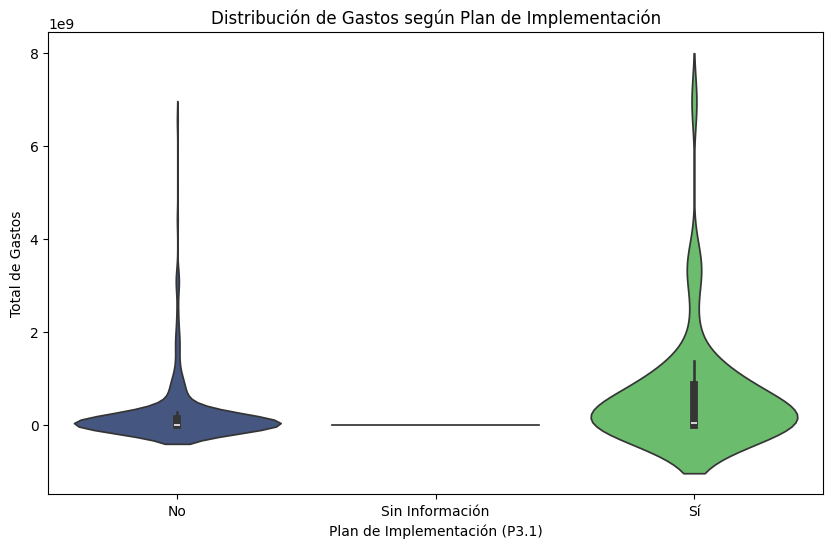

C:\Users\alejo\AppData\Local\Temp\ipykernel_13392\2718151381.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='P3.1', y='TotalGastos', data=GastoyAlineamientoPI_Bajo,palette='viridis')


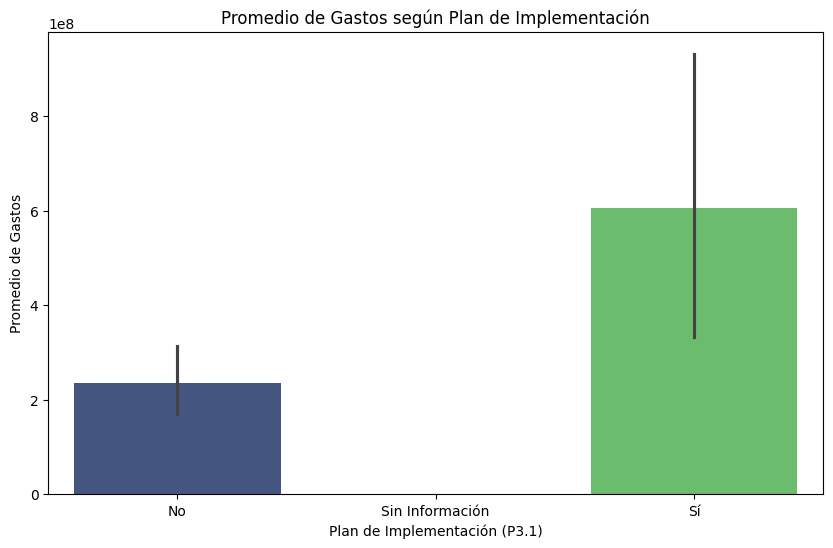

In [68]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='P3.1', y='TotalGastos', data=GastoyAlineamientoPI_Bajo, palette='viridis')
plt.title('Distribución de Gastos según Plan de Implementación')
plt.xlabel('Plan de Implementación (P3.1)')
plt.ylabel('Total de Gastos')
plt.show()

# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='P3.1', y='TotalGastos', data=GastoyAlineamientoPI_Bajo, palette='viridis')
plt.title('Distribución de Gastos según Plan de Implementación')
plt.xlabel('Plan de Implementación (P3.1)')
plt.ylabel('Total de Gastos')
plt.show()

# Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='P3.1', y='TotalGastos', data=GastoyAlineamientoPI_Bajo,palette='viridis')
plt.title('Promedio de Gastos según Plan de Implementación')
plt.xlabel('Plan de Implementación (P3.1)')
plt.ylabel('Promedio de Gastos')
plt.show()

C:\Users\alejo\AppData\Local\Temp\ipykernel_13392\2720196163.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='P3.1', y='TotalGastos', data=GastoyAlineamientoPI_Alto, palette='viridis')


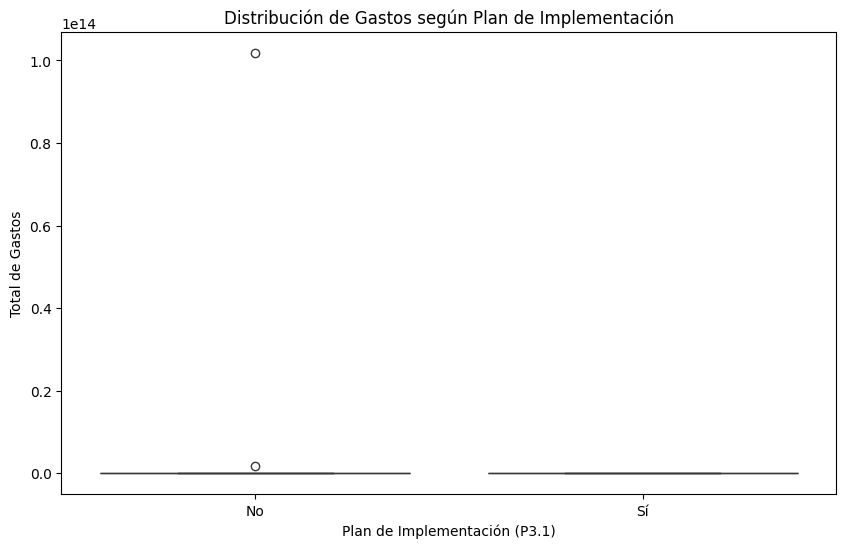

C:\Users\alejo\AppData\Local\Temp\ipykernel_13392\2720196163.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='P3.1', y='TotalGastos', data=GastoyAlineamientoPI_Alto, palette='viridis')


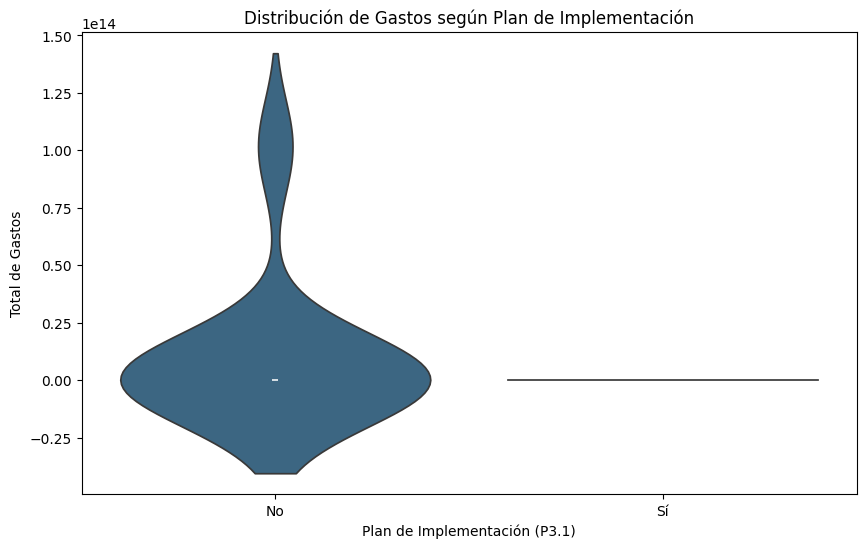

C:\Users\alejo\AppData\Local\Temp\ipykernel_13392\2720196163.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='P3.1', y='TotalGastos', data=GastoyAlineamientoPI_Alto,palette='viridis')


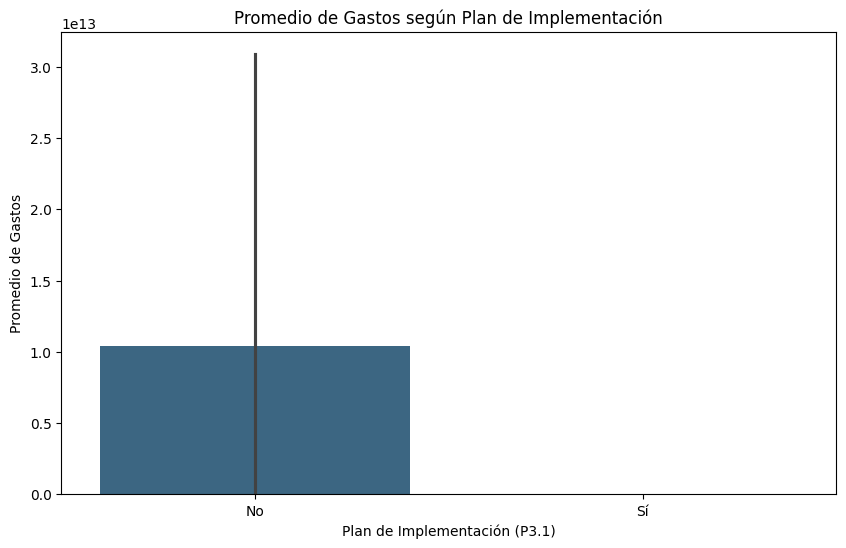

In [70]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='P3.1', y='TotalGastos', data=GastoyAlineamientoPI_Alto, palette='viridis')
plt.title('Distribución de Gastos según Plan de Implementación')
plt.xlabel('Plan de Implementación (P3.1)')
plt.ylabel('Total de Gastos')
plt.show()

# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='P3.1', y='TotalGastos', data=GastoyAlineamientoPI_Alto, palette='viridis')
plt.title('Distribución de Gastos según Plan de Implementación')
plt.xlabel('Plan de Implementación (P3.1)')
plt.ylabel('Total de Gastos')
plt.show()

# Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='P3.1', y='TotalGastos', data=GastoyAlineamientoPI_Alto,palette='viridis')
plt.title('Promedio de Gastos según Plan de Implementación')
plt.xlabel('Plan de Implementación (P3.1)')
plt.ylabel('Promedio de Gastos')
plt.show()

In [87]:
GastoyAlineamientoEjesBajo = GastoyAlineamientoEjes[GastoyAlineamientoEjes['TotalGastos'] <= 9999999999]
GastoyAlineamientoEjesAlto = GastoyAlineamientoEjes[GastoyAlineamientoEjes['TotalGastos'] > 9999999999]
GastoyAlineamientoEjesAlto = GastoyAlineamientoEjesAlto.drop(192,axis=0)
GastoyAlineamientoEjesAlto = GastoyAlineamientoEjesAlto.drop(271,axis=0)

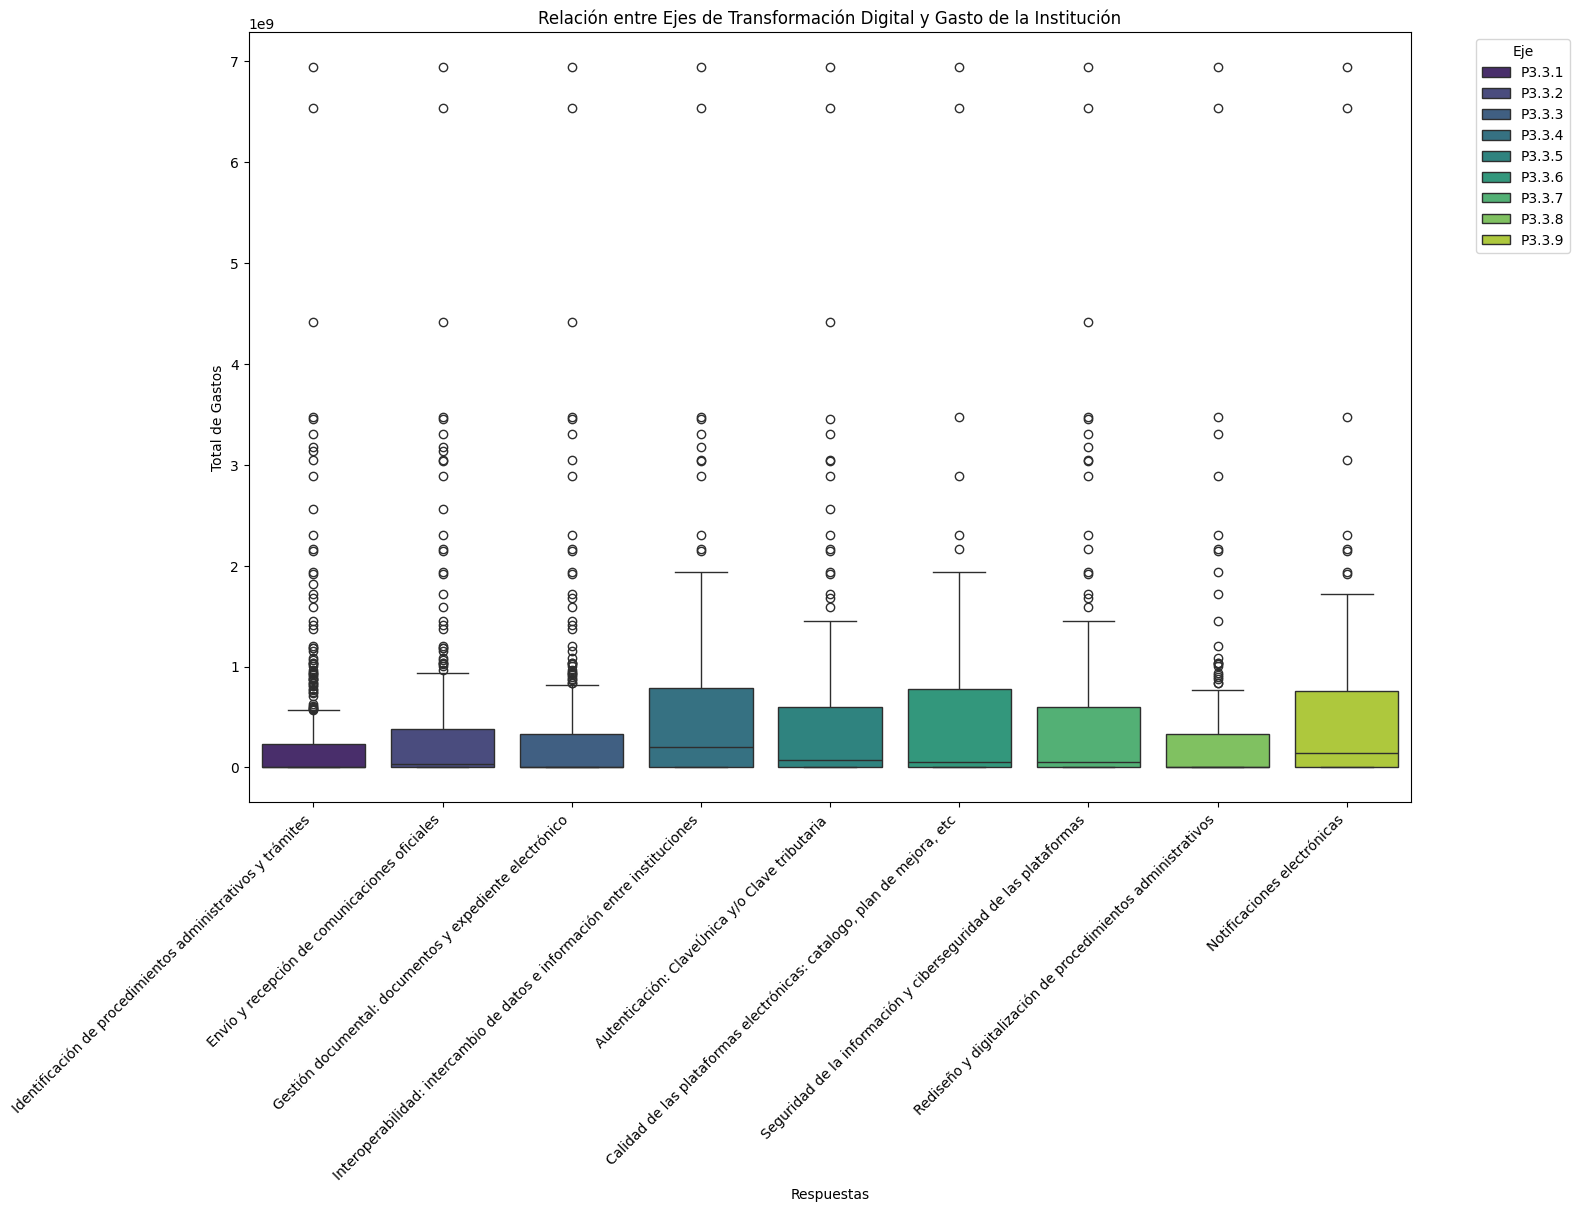

In [84]:
df_melted = pd.melt(GastoyAlineamientoEjesBajo, id_vars=['TotalGastos'], var_name='Eje', value_name='Respuesta')

# Filtrar respuestas que no son 'Sin Información'
df_melted = df_melted[df_melted['Respuesta'] != 'Sin Información']

# Boxplot para cada eje
plt.figure(figsize=(15, 10))
sns.boxplot(x='Respuesta', y='TotalGastos', hue='Eje', data=df_melted, palette='viridis')
plt.title('Relación entre Ejes de Transformación Digital y Gasto de la Institución')
plt.xlabel('Respuestas')
plt.ylabel('Total de Gastos')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Eje', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

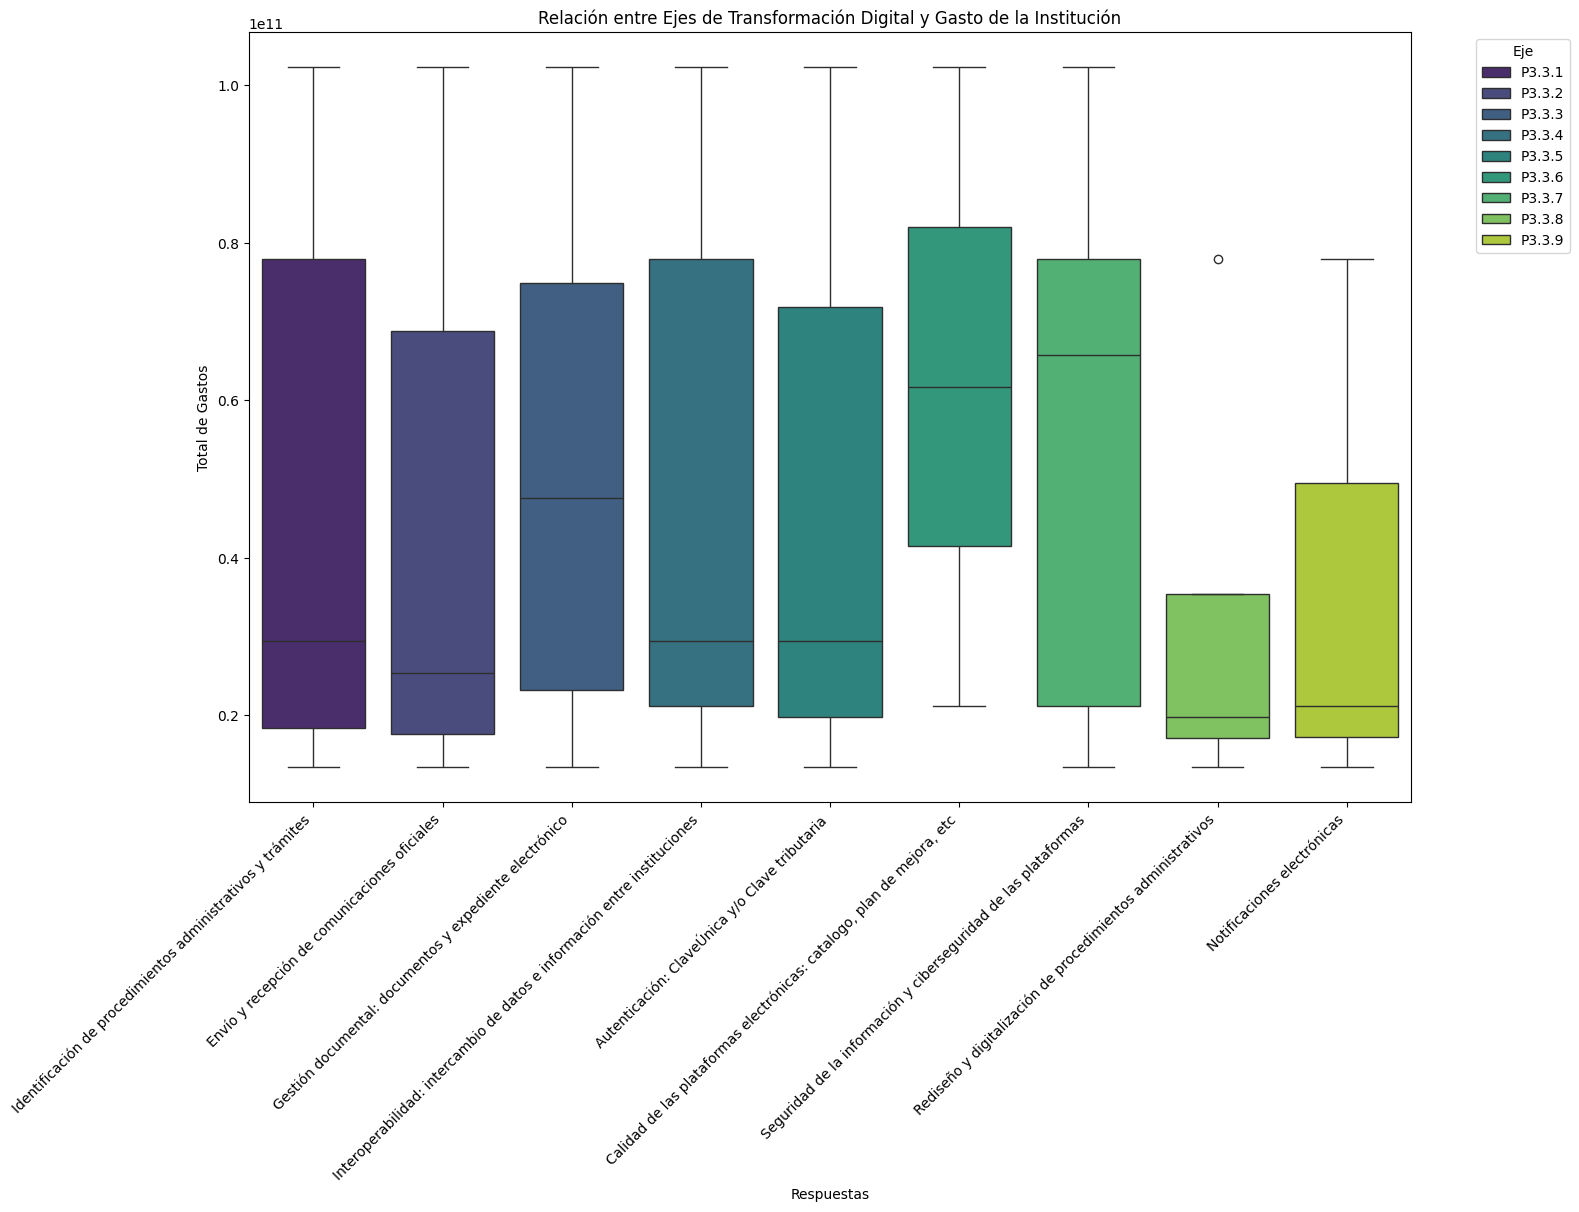

In [88]:
df_melted = pd.melt(GastoyAlineamientoEjesAlto, id_vars=['TotalGastos'], var_name='Eje', value_name='Respuesta')

# Filtrar respuestas que no son 'Sin Información'
df_melted = df_melted[df_melted['Respuesta'] != 'Sin Información']

# Boxplot para cada eje
plt.figure(figsize=(15, 10))
sns.boxplot(x='Respuesta', y='TotalGastos', hue='Eje', data=df_melted, palette='viridis')
plt.title('Relación entre Ejes de Transformación Digital y Gasto de la Institución')
plt.xlabel('Respuestas')
plt.ylabel('Total de Gastos')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Eje', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### P9.1, P2.6a.1, P2.6a.2

In [104]:
PersonalyEquipos = cuestionario[["P2.6a.1", "P2.6a.2","P9.1.1.5","P9.1.2.5","P9.1.3.5","P9.1.4.5","P9.1.5.5","P9.1.6.5"]]
PersonalyEquipos = PersonalyEquipos.replace({"#s.i.":0,"#n.a.":0,"#n.s.":0})
PersonalyEquipos["PersonalTIC"] = PersonalyEquipos["P2.6a.1"] + PersonalyEquipos["P2.6a.2"]
PersonalyEquipos["TotalEquipos"] = PersonalyEquipos["P9.1.1.5"] + PersonalyEquipos["P9.1.2.5"] + PersonalyEquipos["P9.1.3.5"] + PersonalyEquipos["P9.1.4.5"] + PersonalyEquipos["P9.1.5.5"] + PersonalyEquipos["P9.1.6.5"]
PersonalyEquipos = PersonalyEquipos[['PersonalTIC', 'TotalEquipos']]
PersonalyEquipos = PersonalyEquipos[PersonalyEquipos['PersonalTIC'] != 0]

In [108]:
PersonalyEquipos150 = PersonalyEquipos[PersonalyEquipos['PersonalTIC'] <= 150]

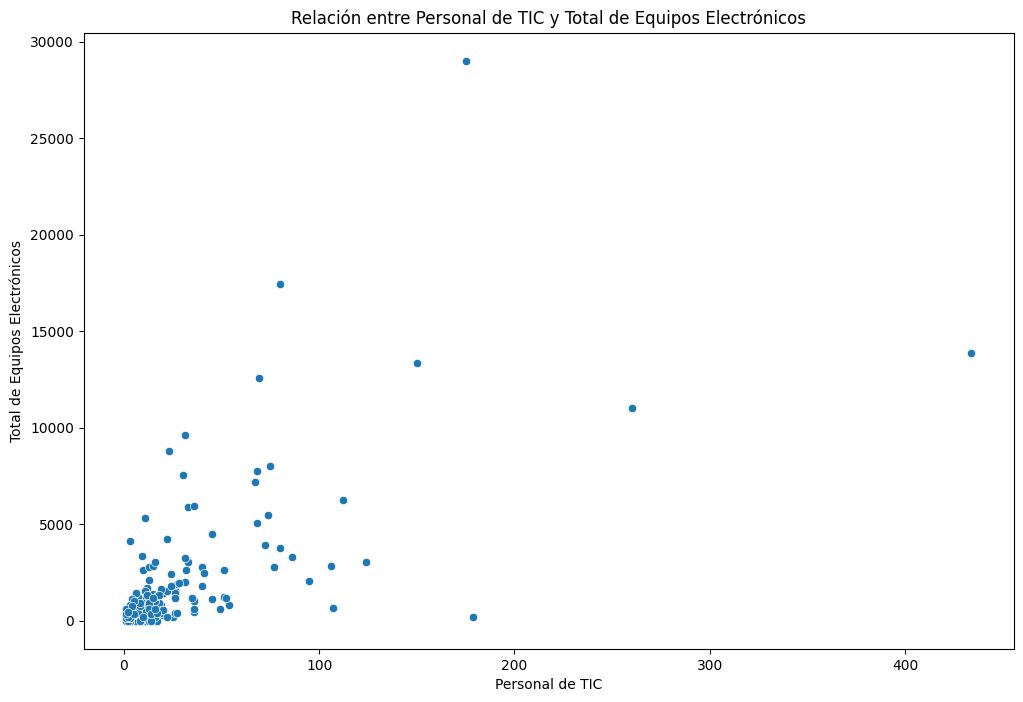

In [117]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PersonalTIC', y='TotalEquipos', data=PersonalyEquipos)
plt.title('Relación entre Personal de TIC y Total de Equipos Electrónicos')
plt.xlabel('Personal de TIC')
plt.ylabel('Total de Equipos Electrónicos')
plt.show()

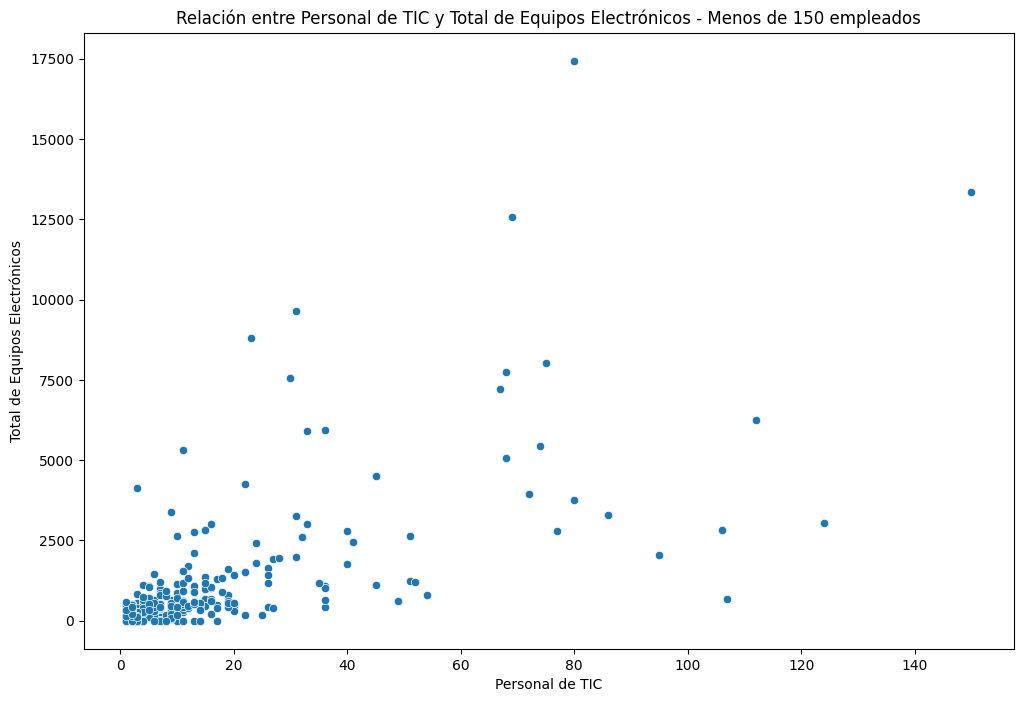

In [118]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PersonalTIC', y='TotalEquipos', data=PersonalyEquipos150)
plt.title('Relación entre Personal de TIC y Total de Equipos Electrónicos - Menos de 150 empleados')
plt.xlabel('Personal de TIC')
plt.ylabel('Total de Equipos Electrónicos')
plt.show()

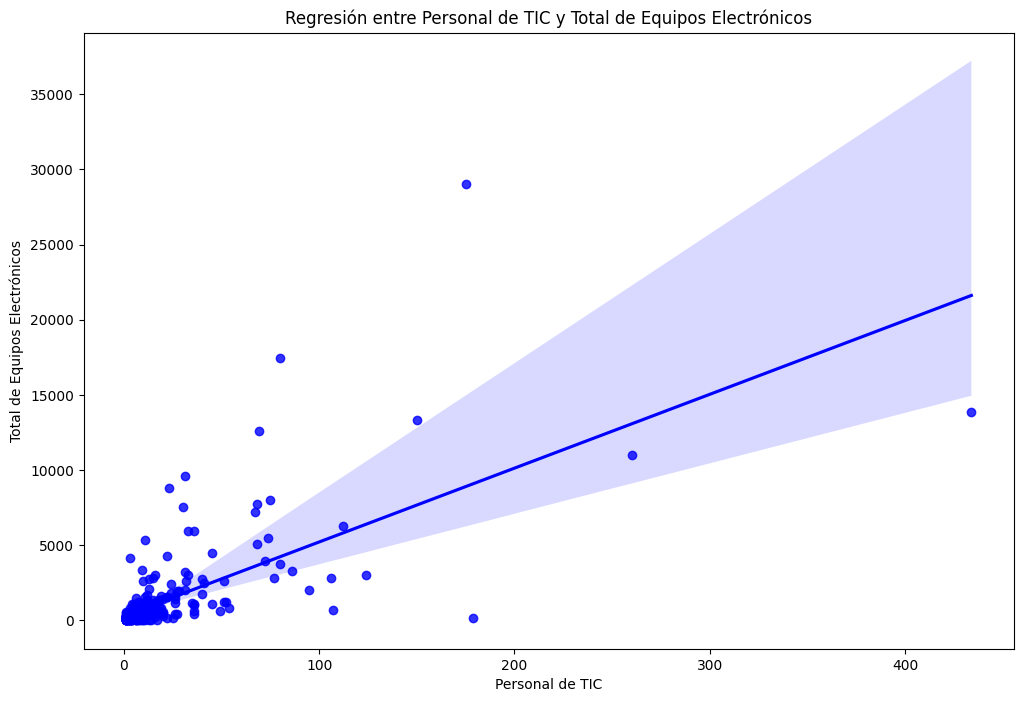

In [115]:
plt.figure(figsize=(12, 8))
sns.regplot(x='PersonalTIC', y='TotalEquipos', data=PersonalyEquipos, color='b')
plt.title('Regresión entre Personal de TIC y Total de Equipos Electrónicos')
plt.xlabel('Personal de TIC')
plt.ylabel('Total de Equipos Electrónicos')
plt.show()

C:\Users\alejo\AppData\Local\Temp\ipykernel_13392\33673754.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PersonalTIC_Rango', y='TotalEquipos', data=PersonalyEquipos, palette='viridis')


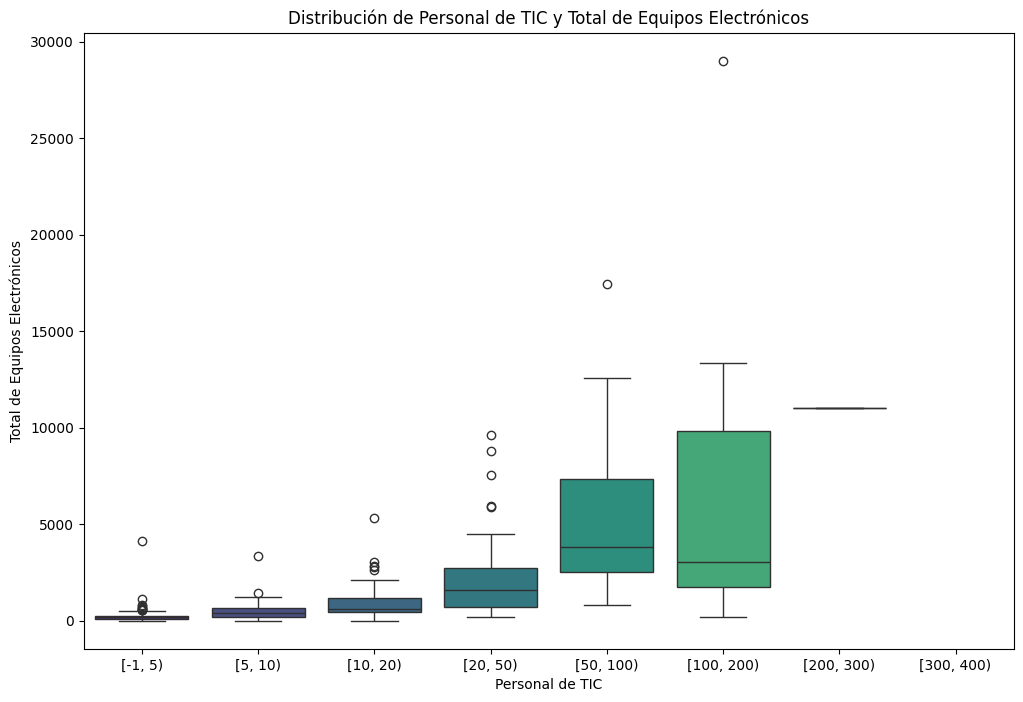

In [113]:
bins = [-1, 5, 10, 20, 50, 100, 200, 300, 400]
PersonalyEquipos['PersonalTIC_Rango'] = pd.cut(PersonalyEquipos['PersonalTIC'], bins=bins, right=False)

plt.figure(figsize=(12, 8))

sns.boxplot(x='PersonalTIC_Rango', y='TotalEquipos', data=PersonalyEquipos, palette='viridis')
plt.title('Distribución de Personal de TIC y Total de Equipos Electrónicos')
plt.xlabel('Personal de TIC')
plt.ylabel('Total de Equipos Electrónicos')
plt.show()

### P9.9, P9.6.1, P9.8.1

In [123]:
DataCenters = cuestionario[["P9.5","P9.9", "P9.6.1", "P9.8.1"]]
DataCenters = DataCenters.replace({"#s.i.":"Sin informacion","#n.a.":"Sin informacion","#n.s.":"Sin informacion"})

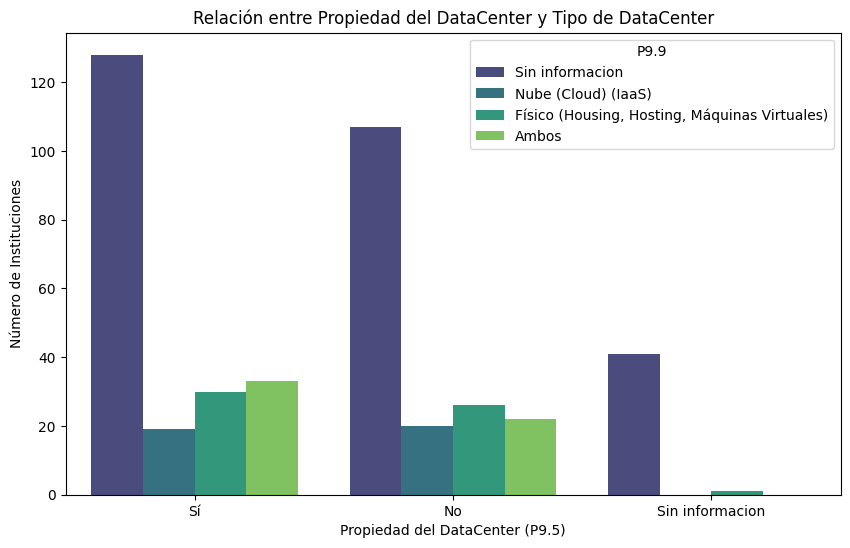

In [126]:
orden = ["Sí", "No", "Sin informacion"]
plt.figure(figsize=(10, 6))
sns.countplot(x='P9.5', hue='P9.9', data=DataCenters, palette='viridis', order=orden)
plt.title('Relación entre Propiedad del DataCenter y Tipo de DataCenter')
plt.xlabel('Propiedad del DataCenter (P9.5)')
plt.ylabel('Número de Instituciones')
plt.show()

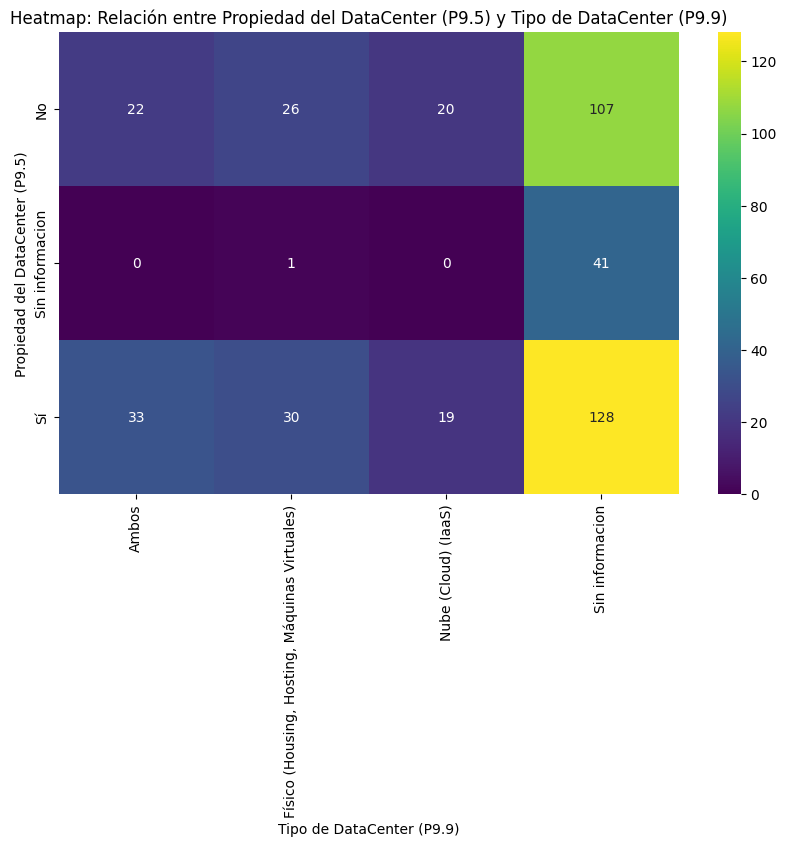

In [138]:
crosstab = pd.crosstab(DataCenters['P9.5'], DataCenters['P9.9'])
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, cmap='viridis', fmt='g', cbar=True)
plt.title('Heatmap: Relación entre Propiedad del DataCenter (P9.5) y Tipo de DataCenter (P9.9)')
plt.xlabel('Tipo de DataCenter (P9.9)')
plt.ylabel('Propiedad del DataCenter (P9.5)')
plt.show()

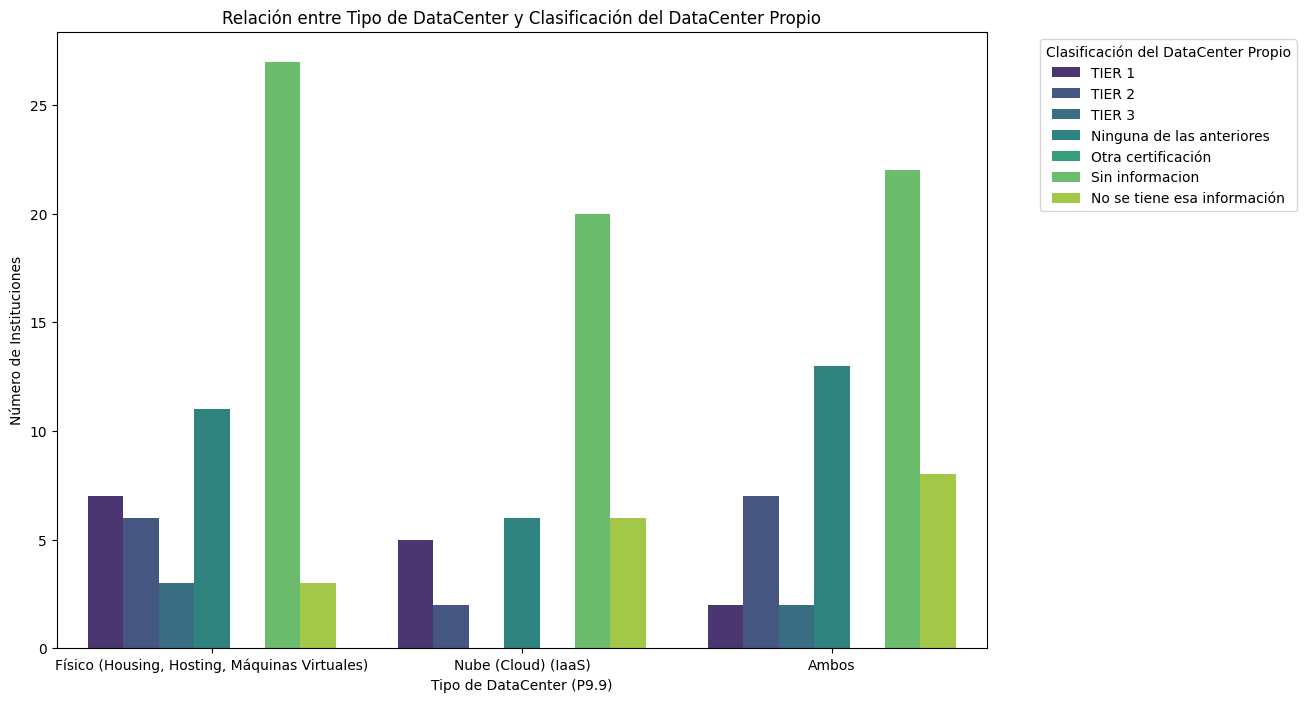

In [130]:
ordenHue = ["TIER 1", "TIER 2", "TIER 3", "Ninguna de las anteriores", "Otra certificación", "Sin informacion", "No se tiene esa información"]
plt.figure(figsize=(12, 8))
sns.countplot(x='P9.9', hue='P9.6.1', data=DataCenters, palette='viridis', order=['Físico (Housing, Hosting, Máquinas Virtuales)', 'Nube (Cloud) (IaaS)', 'Ambos'], hue_order=ordenHue)
plt.title('Relación entre Tipo de DataCenter y Clasificación del DataCenter Propio')
plt.xlabel('Tipo de DataCenter (P9.9)')
plt.ylabel('Número de Instituciones')
plt.legend(title="Clasificación del DataCenter Propio", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

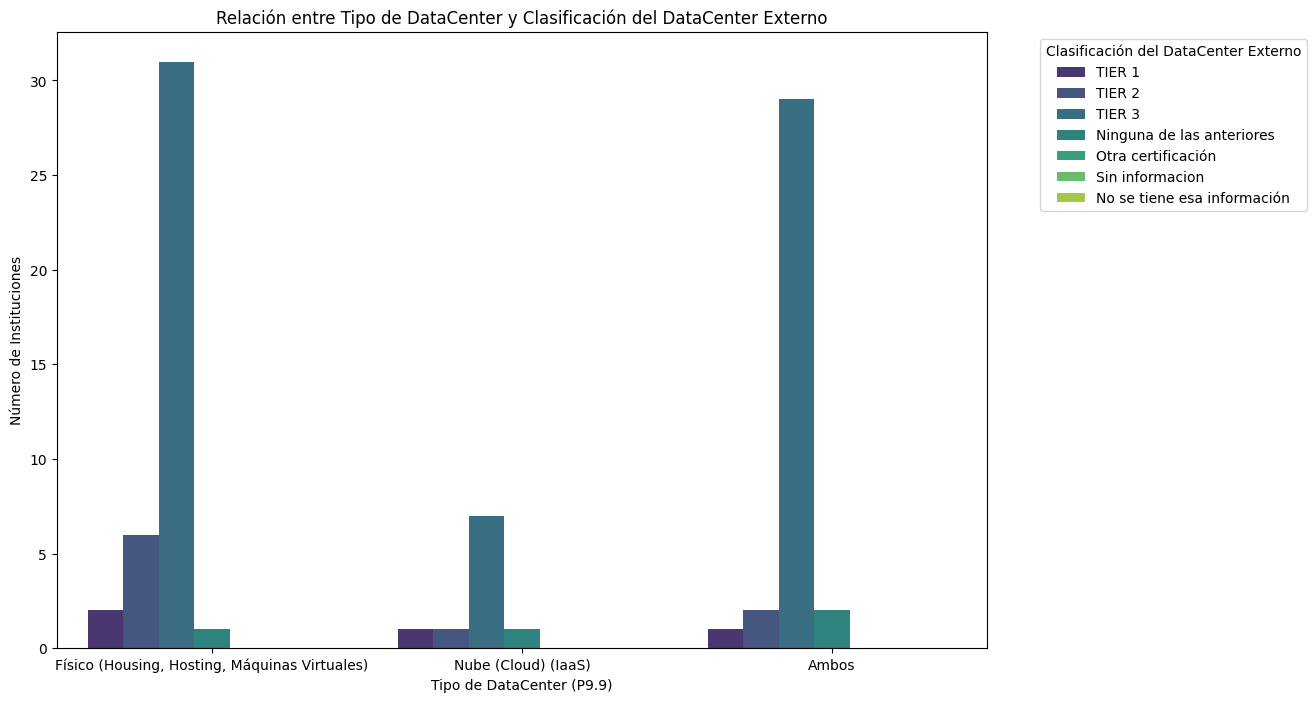

In [131]:
ordenHue = ["TIER 1", "TIER 2", "TIER 3", "Ninguna de las anteriores", "Otra certificación", "Sin informacion", "No se tiene esa información"]
plt.figure(figsize=(12, 8))
sns.countplot(x='P9.9', hue='P9.8.1', data=DataCenters, palette='viridis', order=['Físico (Housing, Hosting, Máquinas Virtuales)', 'Nube (Cloud) (IaaS)', 'Ambos'], hue_order=ordenHue)
plt.title('Relación entre Tipo de DataCenter y Clasificación del DataCenter Externo')
plt.xlabel('Tipo de DataCenter (P9.9)')
plt.ylabel('Número de Instituciones')
plt.legend(title="Clasificación del DataCenter Externo", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

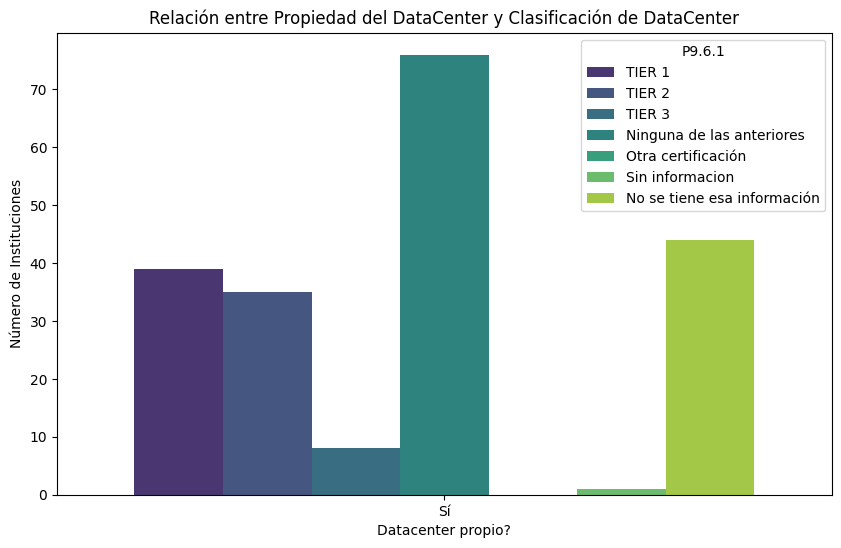

In [136]:
orden = ["Sí"]
ordenHue = ["TIER 1", "TIER 2", "TIER 3", "Ninguna de las anteriores", "Otra certificación", "Sin informacion", "No se tiene esa información"]
plt.figure(figsize=(10, 6))
sns.countplot(x='P9.5', hue='P9.6.1', data=DataCenters, palette='viridis', order=orden, hue_order=ordenHue)
plt.title('Relación entre Propiedad del DataCenter y Clasificación de DataCenter')
plt.xlabel('Datacenter propio?')
plt.ylabel('Número de Instituciones')
plt.show()

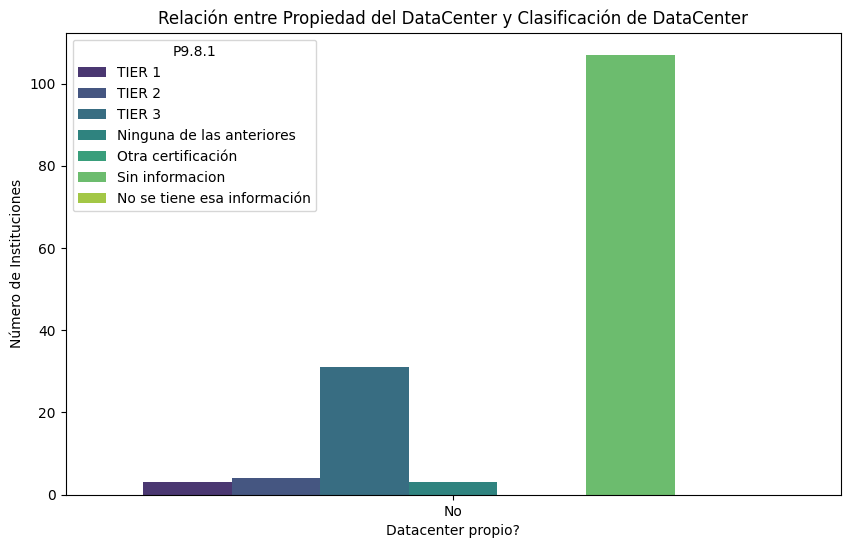

In [135]:
orden = ["No"]
ordenHue = ["TIER 1", "TIER 2", "TIER 3", "Ninguna de las anteriores", "Otra certificación", "Sin informacion", "No se tiene esa información"]
plt.figure(figsize=(10, 6))
sns.countplot(x='P9.5', hue='P9.8.1', data=DataCenters, palette='viridis', order=orden, hue_order=ordenHue)
plt.title('Relación entre Propiedad del DataCenter y Clasificación de DataCenter')
plt.xlabel('Datacenter propio?')
plt.ylabel('Número de Instituciones')
plt.show()

### P2.5.X y P2.6a

In [56]:
FuncionesTIC = cuestionario[["P2.6a.1", "P2.6a.2","P2.5.1","P2.5.2","P2.5.3","P2.5.4","P2.5.5","P2.5.6","P2.5.7","P2.5.8"]]
FuncionesTIC[["P2.6a.1","P2.6a.2"]] = FuncionesTIC[["P2.6a.1","P2.6a.2"]].replace({'#s.i.': 0, '#n.a.': 0})
FuncionesTIC.loc[0:1] = FuncionesTIC[["P2.6a.1","P2.6a.2"]].astype(int)
FuncionesTIC["PersonalTIC"] = FuncionesTIC["P2.6a.1"] + FuncionesTIC["P2.6a.2"]
FuncionesTIC = FuncionesTIC.replace({'#s.i.': "Sin informacón", '#n.a.': "Sin informacón", '#n.s.': "Sin informacón"})
FuncionesTIC = FuncionesTIC.replace({"Adquisiciones y gestión de contratos de tecnología o servicios informáticos (ejemplo: equipos, sistemas, licencia de softwares, actualizaciones, sistemas de seguridad informática).":"Adquisiciones y gestión de contratos de tecnología o servicios informáticos", "Operación y mantención de software de gestión interna (ejemplo: ofimática, sistemas internos, actualizaciones y servicios de seguridad).":"Operación y mantención de software de gestión interna","Operación y mantención de software orientados a los usuarios (sitio web, plataformas de servicio a ciudadanos, servicios a otras instituciones)":"Operación y mantención de software orientados a los usuarios"})



C:\Users\alejo\AppData\Local\Temp\ipykernel_21268\3026874518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FuncionesTIC[["P2.6a.1","P2.6a.2"]] = FuncionesTIC[["P2.6a.1","P2.6a.2"]].replace({'#s.i.': 0, '#n.a.': 0})
C:\Users\alejo\AppData\Local\Temp\ipykernel_21268\3026874518.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FuncionesTIC["PersonalTIC"] = FuncionesTIC["P2.6a.1"] + FuncionesTIC["P2.6a.2"]


In [57]:
bins = [-1, 5, 10, 20, 50, 100, 200, 300, 400]
bin_mujeres = [-1,5,10,30,50,70,100]
bin_hombres = [-1, 5, 10, 20, 50, 100, 200, 300, 400]
FuncionesTIC['PersonalTIC_Rango'] = pd.cut(FuncionesTIC['PersonalTIC'], bins=bins, right=False)
FuncionesTIC['Rango_Mujeres'] = pd.cut(FuncionesTIC['P2.6a.1'], bins=bin_mujeres, right=False)
FuncionesTIC['Rango_Hombres'] = pd.cut(FuncionesTIC['P2.6a.2'], bins=bin_hombres, right=False)
funciones_columns = ["P2.5.1","P2.5.2","P2.5.3","P2.5.4","P2.5.5","P2.5.6","P2.5.7","P2.5.8"]

In [58]:
melted_total = FuncionesTIC.melt(id_vars='PersonalTIC_Rango', value_vars=funciones_columns, var_name='Funcion', value_name='Cantidad')
melted_mujeres = FuncionesTIC.melt(id_vars='Rango_Mujeres', value_vars=funciones_columns, var_name='Funcion', value_name='Cantidad')
melted_hombres = FuncionesTIC.melt(id_vars='Rango_Hombres', value_vars=funciones_columns, var_name='Funcion', value_name='Cantidad')

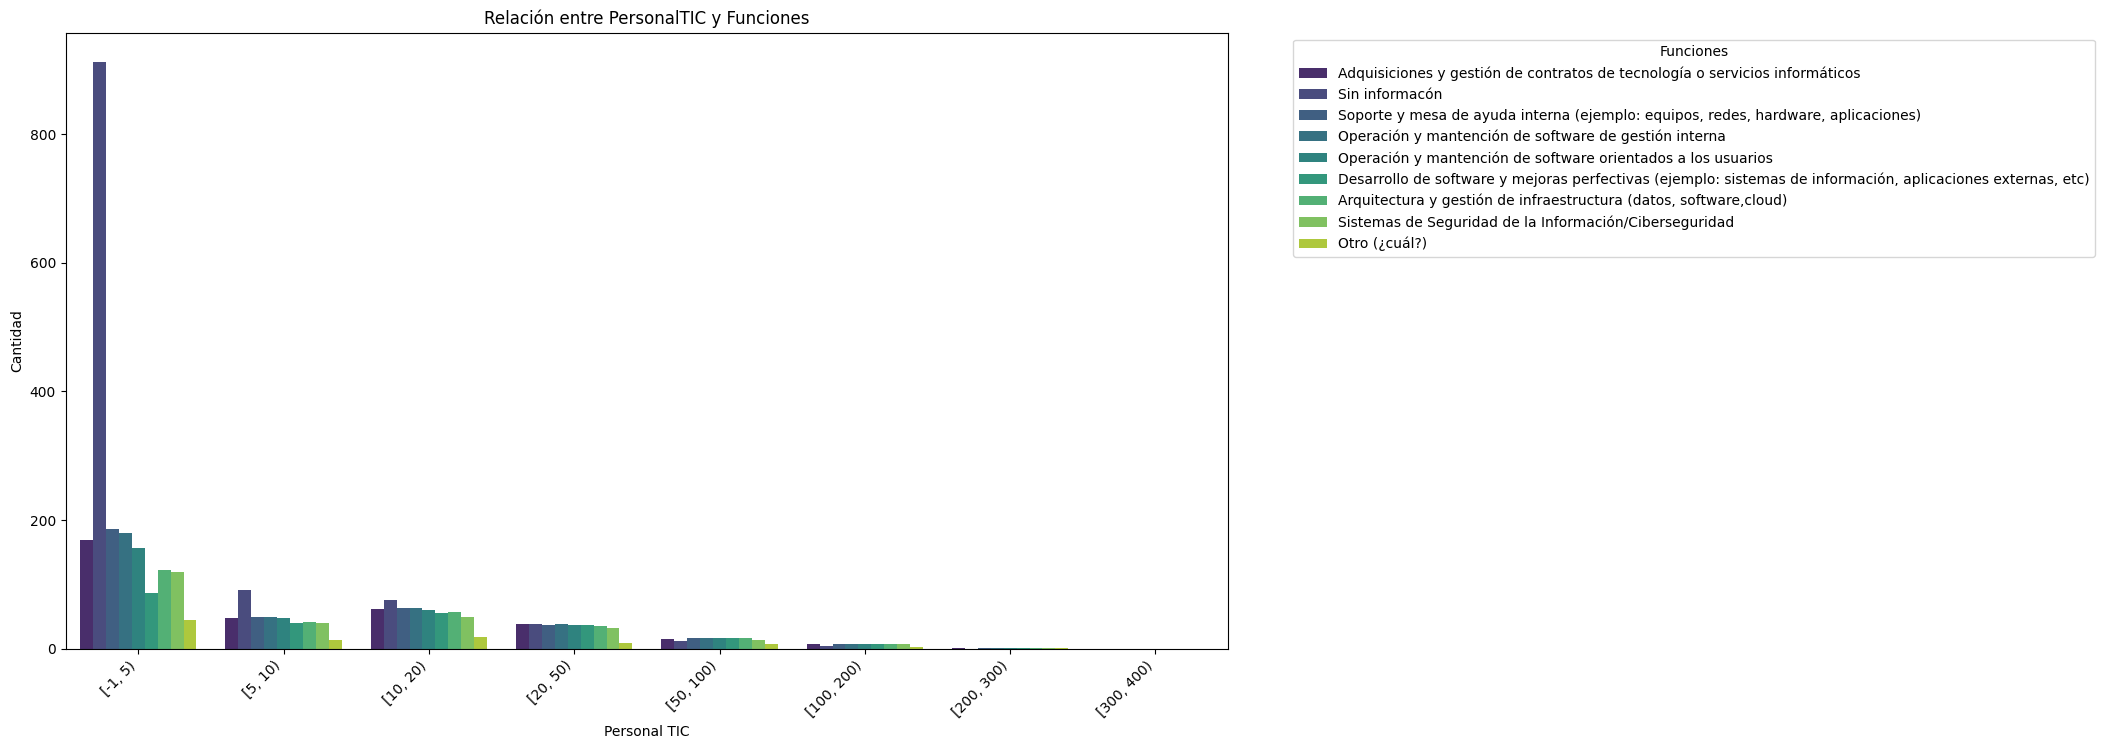

In [59]:
plt.figure(figsize=(15, 8))
sns.countplot(hue='Cantidad', x='PersonalTIC_Rango',data=melted_total, palette='viridis')
plt.title('Relación entre PersonalTIC y Funciones')
plt.xlabel('Personal TIC')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Funciones', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

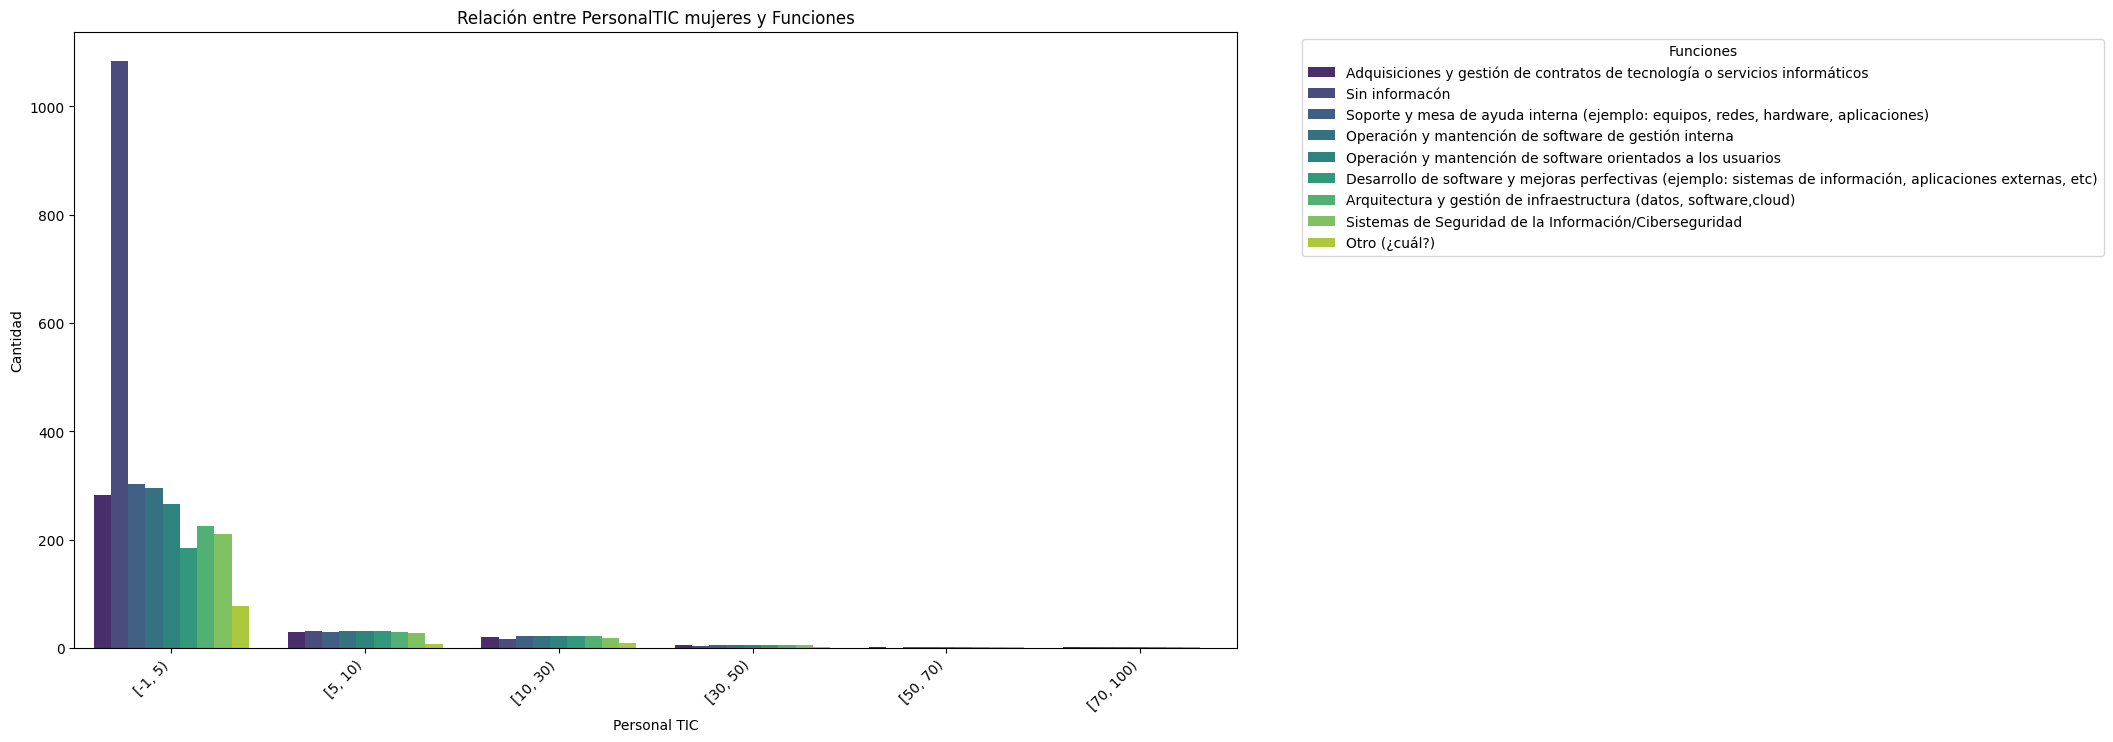

In [62]:
plt.figure(figsize=(15, 8))
sns.countplot(hue='Cantidad', x='Rango_Mujeres',data=melted_mujeres, palette='viridis')
plt.title('Relación entre PersonalTIC mujeres y Funciones')
plt.xlabel('Personal TIC')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Funciones', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

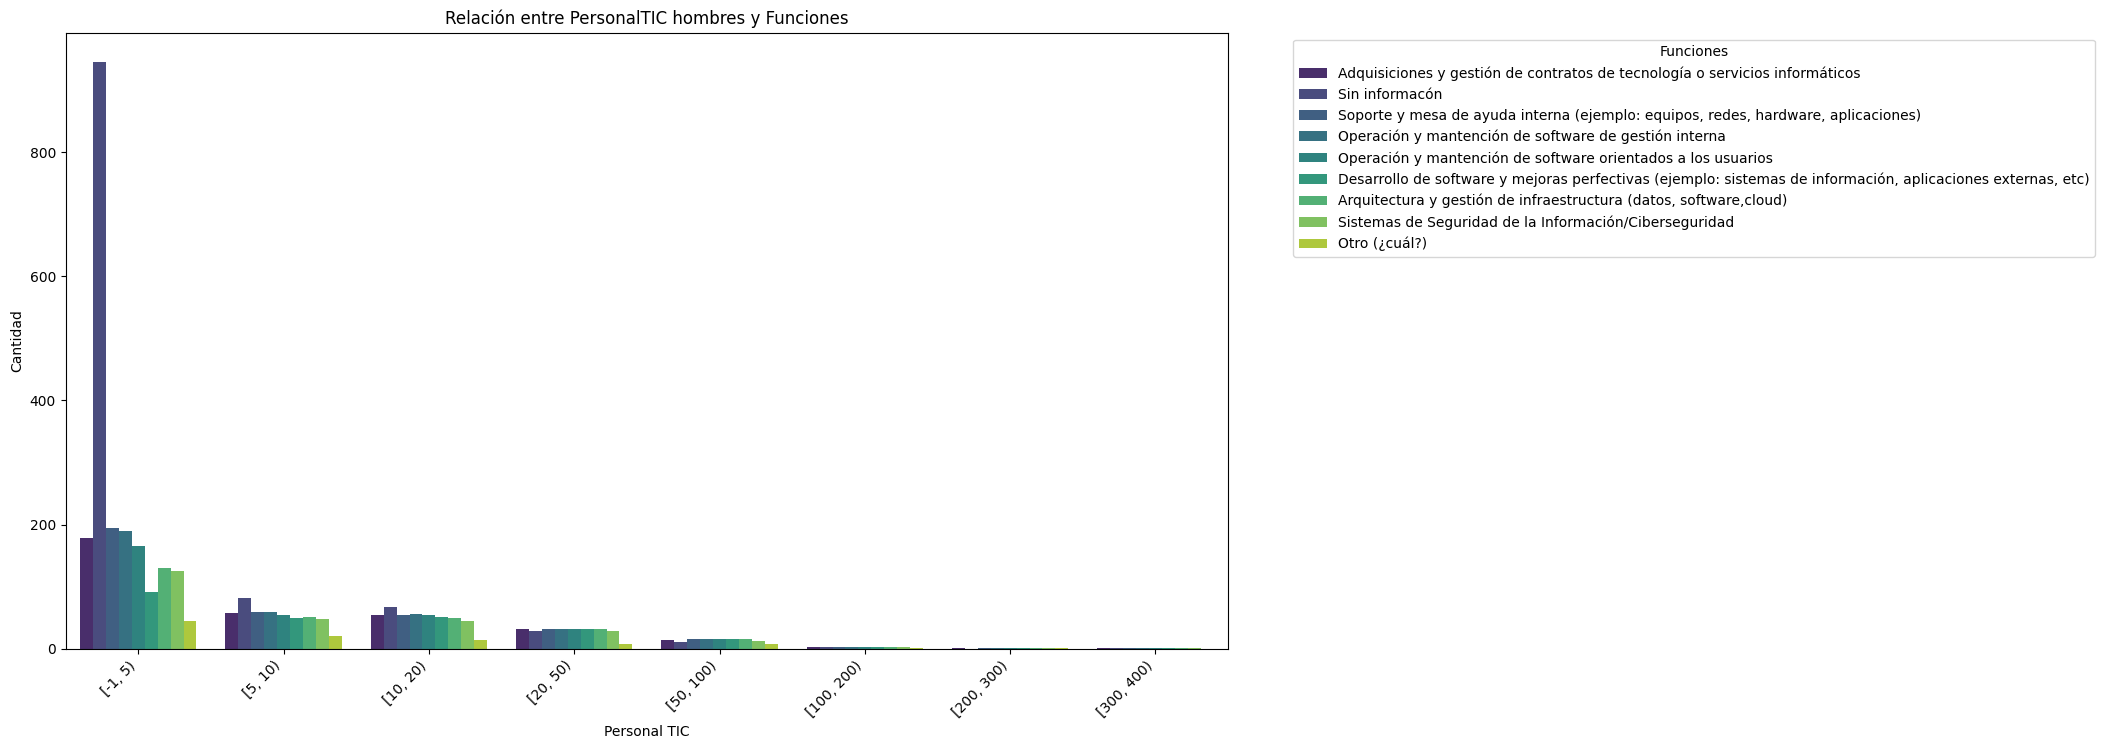

In [63]:
plt.figure(figsize=(15, 8))
sns.countplot(hue='Cantidad', x='Rango_Hombres',data=melted_hombres, palette='viridis')
plt.title('Relación entre PersonalTIC hombres y Funciones')
plt.xlabel('Personal TIC')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Funciones', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### P2.8.X y P13

In [67]:
GastoxPerfil = cuestionario[["P2.8.1.3", "P2.8.2.3", "P2.8.3.3", "P2.8.4.3","P2.8.5.3","P2.8.6.3","P2.8.7.3","P2.8.8.3","P2.8.9.3","P2.8.10.3","P2.8.11.3","P2.8.12.3","P2.8.13.3","P2.8.14.3","P2.8.15.3","P2.8.16.3","P2.8.17.3","P13.GC.2.1","P13.GC.2.2","P13.GC.2.3","P13.GC.2.4","P13.GC.2.5","P13.GC.2.6","P13.GC.3.1","P13.GC.3.2","P13.GC.3.3","P13.GC.3.4","P13.GC.3.5","P13.GC.3.6","P13.GC.3.7","P13.GC.3.8"]]
GastoxPerfil = GastoxPerfil.replace({'#s.i.': 0, '#n.a.': 0})
GastoxPerfil["TotalGastos"] = GastoxPerfil.iloc[:, 17:-1].sum(axis=1)

In [73]:
columnas_perfil = ["P2.8.1.3", "P2.8.2.3", "P2.8.3.3", "P2.8.4.3","P2.8.5.3","P2.8.6.3","P2.8.7.3","P2.8.8.3","P2.8.9.3","P2.8.10.3","P2.8.11.3","P2.8.12.3","P2.8.13.3","P2.8.14.3","P2.8.15.3","P2.8.16.3","P2.8.17.3"]
data_perfil_gasto = GastoxPerfil[["TotalGastos"] + columnas_perfil]
gasto_bajo = data_perfil_gasto[data_perfil_gasto['TotalGastos'] <= 9999999999]
gasto_alto = data_perfil_gasto[data_perfil_gasto['TotalGastos'] > 9999999999]
outlier = gasto_alto.loc[192]
gasto_alto = gasto_alto.drop(192,axis=0)

In [74]:
gasto_bajo_melted = gasto_bajo.melt(id_vars="TotalGastos", var_name="Perfil", value_name="Cantidad")
gasto_alto_melted = gasto_alto.melt(id_vars="TotalGastos", var_name="Perfil", value_name="Cantidad")

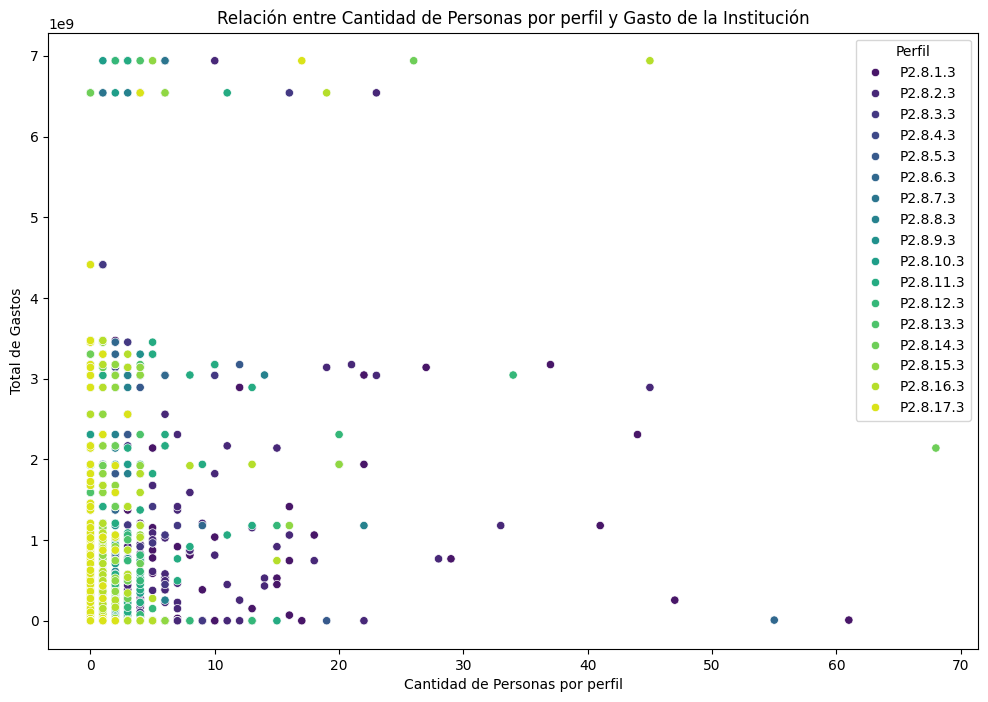

In [77]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="Cantidad", y="TotalGastos", hue="Perfil", data=gasto_bajo_melted, palette="viridis")

plt.title('Relación entre Cantidad de Personas por perfil y Gasto de la Institución')
plt.xlabel('Cantidad de Personas por perfil')
plt.ylabel('Total de Gastos')

plt.show()

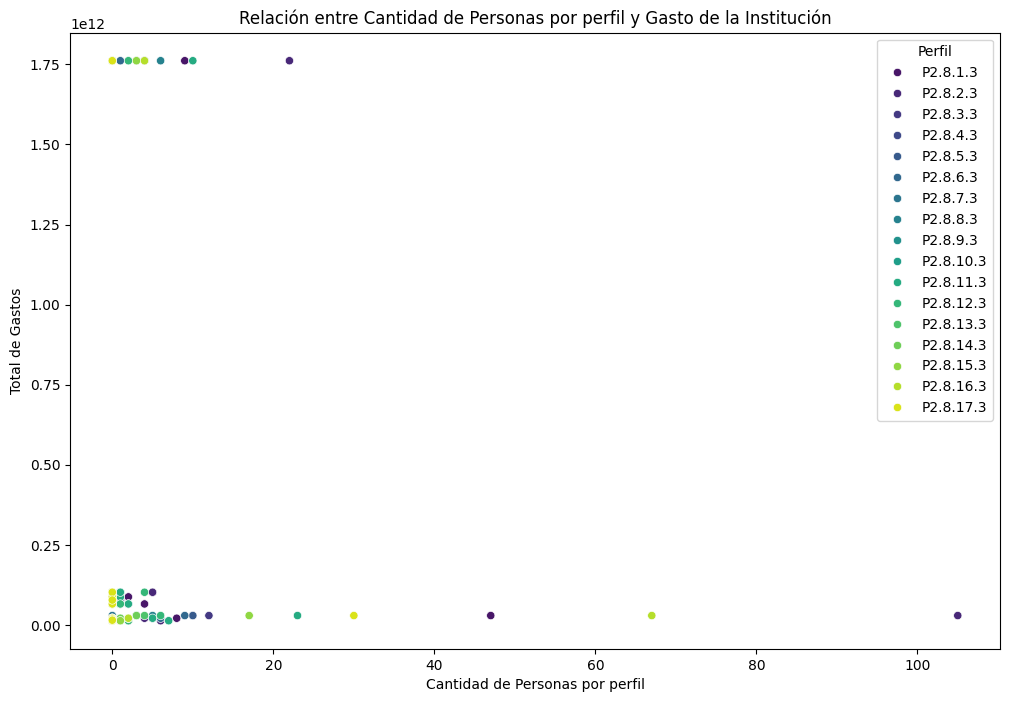

In [78]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="Cantidad", y="TotalGastos", hue="Perfil", data=gasto_alto_melted, palette="viridis")

plt.title('Relación entre Cantidad de Personas por perfil y Gasto de la Institución')
plt.xlabel('Cantidad de Personas por perfil')
plt.ylabel('Total de Gastos')

plt.show()

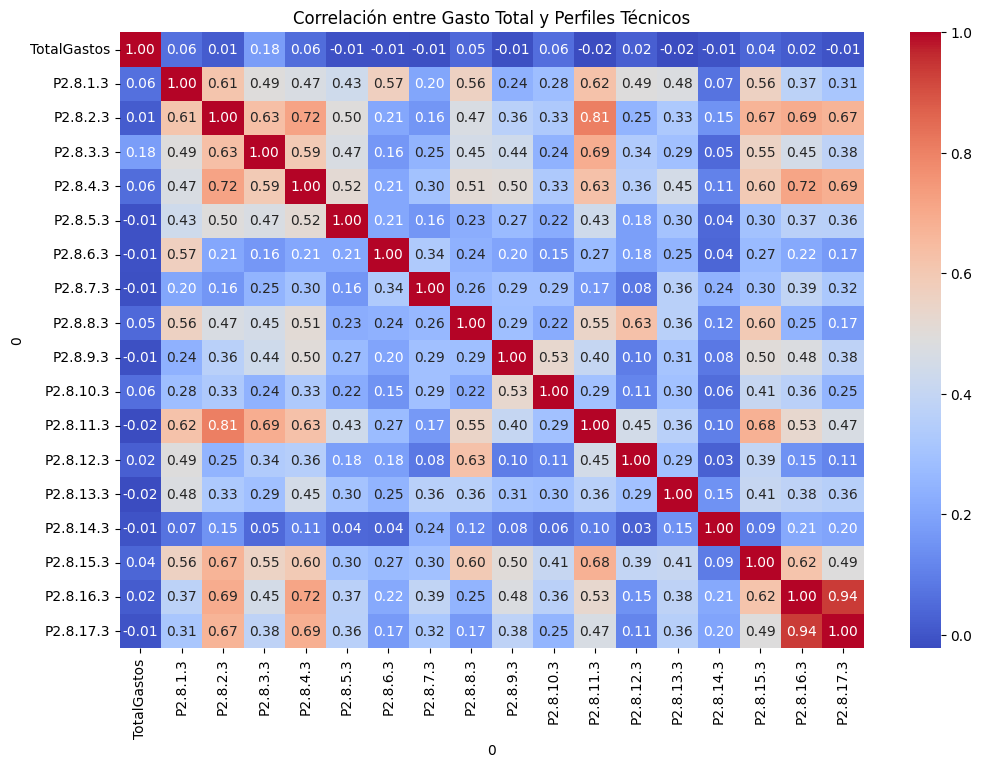

In [83]:
corr_matrix = data_perfil_gasto[['TotalGastos', 'P2.8.1.3', 'P2.8.2.3', 'P2.8.3.3', 'P2.8.4.3', 'P2.8.5.3', 'P2.8.6.3', 'P2.8.7.3', 'P2.8.8.3', 'P2.8.9.3', 'P2.8.10.3', 'P2.8.11.3', 'P2.8.12.3', 'P2.8.13.3', 'P2.8.14.3', 'P2.8.15.3', 'P2.8.16.3', 'P2.8.17.3']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre Gasto Total y Perfiles Técnicos')
plt.show()

### P5.8

In [100]:
FormatoExpedientes = cuestionario[["Tipo", "P5.8"]]
FormatoExpedientes = FormatoExpedientes.replace({'#s.i.': 'Sin Información', '#n.a.': 'Sin Información', '#n.s.': 'Sin Información'})
FormatoExpedientes = FormatoExpedientes.replace({"Hibrido":"Híbrido"})

In [104]:
orden_expediente = ["Papel", "Electrónico", "Híbrido", "Sin Información"]

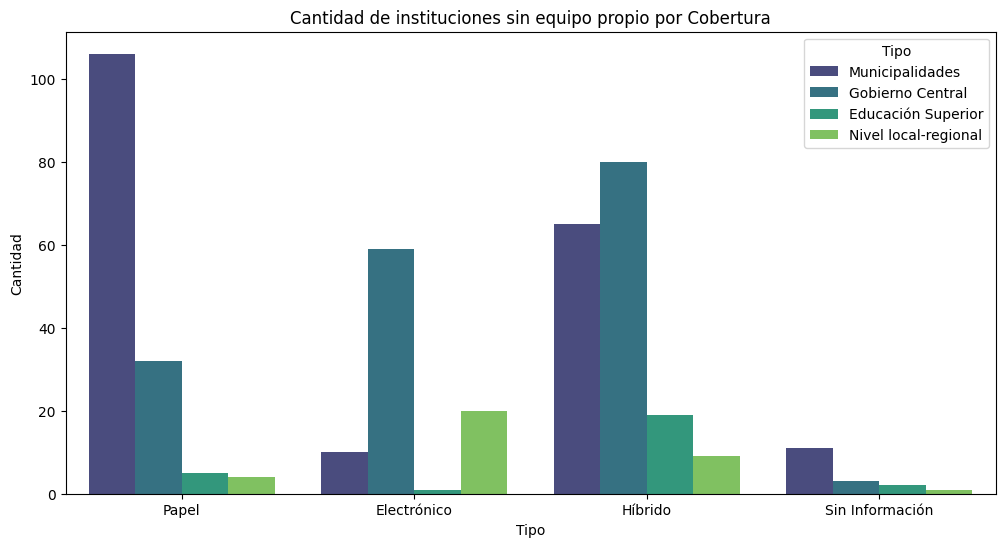

In [105]:
plt.figure(figsize=(12, 6))
sns.countplot(x='P5.8', hue='Tipo', data=FormatoExpedientes, palette='viridis', order=orden_expediente)
plt.title('Cantidad de instituciones sin equipo propio por Cobertura')
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
plt.show()

### P6.3 y P3.1

In [106]:
PlataformaNotificaciones = cuestionario[["P3.1", "P6.3"]]
PlataformaNotificaciones = PlataformaNotificaciones.replace({'#s.i.': 'Sin Información', '#n.a.': 'Sin Información', '#n.s.': 'Sin Información'})

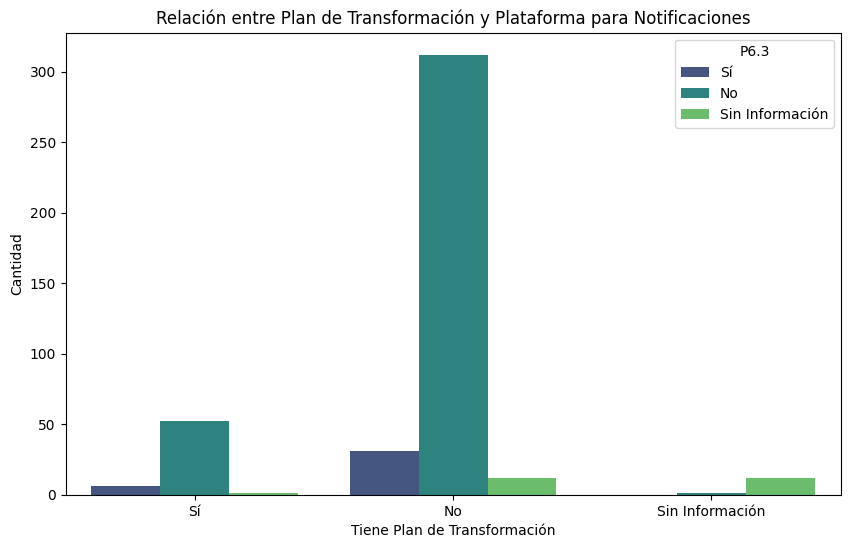

In [111]:
orden = ["Sí", "No", "Sin Información"]
plt.figure(figsize=(10, 6))
sns.countplot(x='P3.1', hue='P6.3', data=PlataformaNotificaciones, palette='viridis', order=orden, hue_order=orden)
plt.title('Relación entre Plan de Transformación y Plataforma para Notificaciones')
plt.xlabel('Tiene Plan de Transformación')
plt.ylabel('Cantidad')
plt.show()

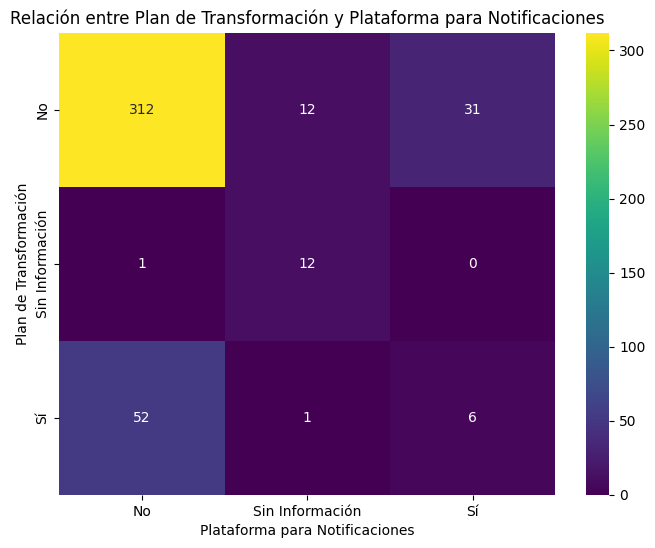

In [125]:
cross_tab = pd.crosstab(PlataformaNotificaciones['P3.1'], PlataformaNotificaciones['P6.3'])

plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='viridis', fmt='d', cbar=True)
plt.title('Relación entre Plan de Transformación y Plataforma para Notificaciones')
plt.xlabel('Plataforma para Notificaciones')
plt.ylabel('Plan de Transformación')
plt.show()

### P7.3 y P3.1

In [117]:
MecanismosIntercambioTD = cuestionario[["P3.1", "P7.3"]]
MecanismosIntercambioTD = MecanismosIntercambioTD.replace({'#s.i.': 'Sin Información', '#n.a.': 'Sin Información', '#n.s.': 'Sin Información'})

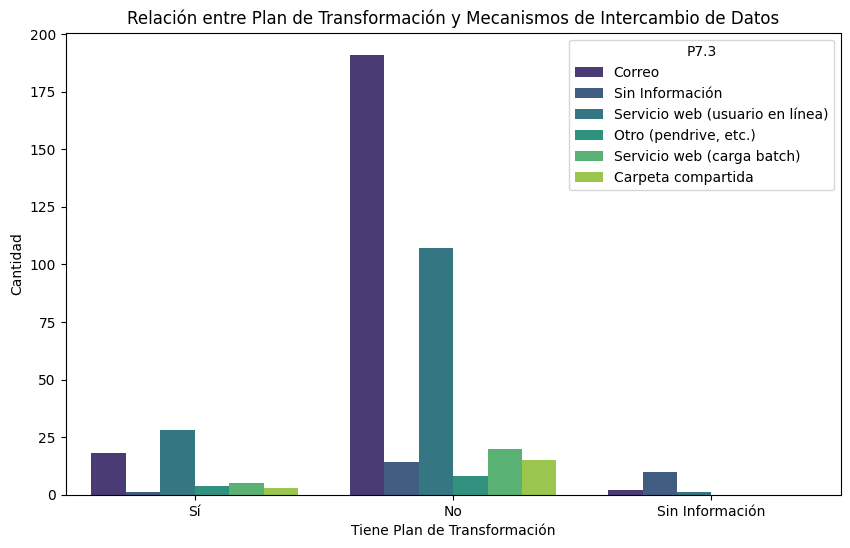

In [123]:
orden = ["Sí", "No", "Sin Información"]
plt.figure(figsize=(10, 6))
sns.countplot(x='P3.1', hue='P7.3', data=MecanismosIntercambioTD, palette='viridis', order=orden)
plt.title('Relación entre Plan de Transformación y Mecanismos de Intercambio de Datos')
plt.xlabel('Tiene Plan de Transformación')
plt.ylabel('Cantidad')
plt.show()

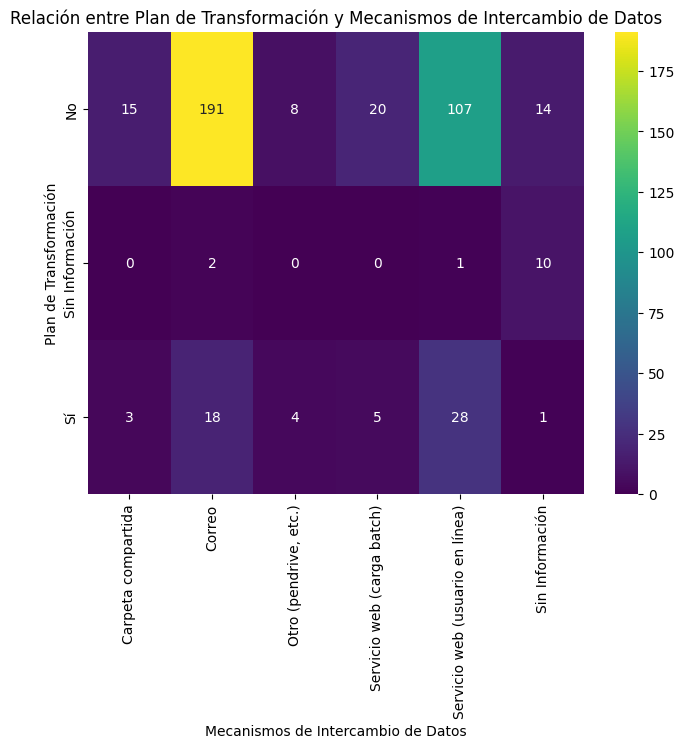

In [124]:
cross_tab = pd.crosstab(MecanismosIntercambioTD['P3.1'], MecanismosIntercambioTD['P7.3'])

plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='viridis', fmt='d', cbar=True)
plt.title('Relación entre Plan de Transformación y Mecanismos de Intercambio de Datos')
plt.xlabel('Mecanismos de Intercambio de Datos')
plt.ylabel('Plan de Transformación')
plt.show()

### P5.7 y P4.4

In [24]:
DocsPoliticaGestion = cuestionario[["Tipo", "P5.7", "P4.4"]]
DocsPoliticaGestion["P4.4"] = DocsPoliticaGestion["P4.4"].replace({"#n.a.":0,"#s.i.":0,"#n.s.":0})
DocsPoliticaGestion = DocsPoliticaGestion.replace({"#n.a.":np.nan, "#s.i.":np.nan,"#n.s.":np.nan})
DocsPoliticaGestion = DocsPoliticaGestion.dropna(subset=['P5.7'])
DocsPoliticaGestion["P4.4"] = DocsPoliticaGestion["P4.4"].astype(int)

C:\Users\alejo\AppData\Local\Temp\ipykernel_7836\69388322.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DocsPoliticaGestion["P4.4"] = DocsPoliticaGestion["P4.4"].replace({"#n.a.":0,"#s.i.":0,"#n.s.":0})


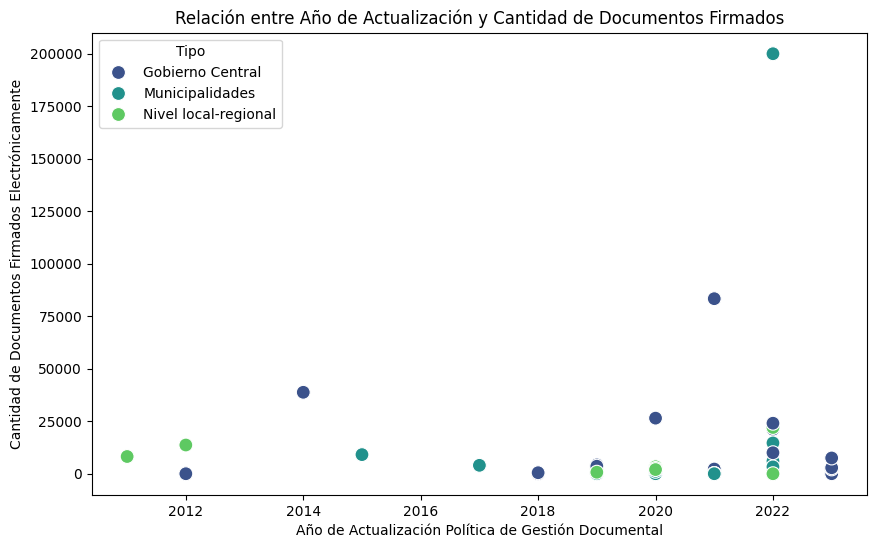

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='P5.7', y='P4.4', hue='Tipo', data=DocsPoliticaGestion, palette='viridis', s=100)
plt.title('Relación entre Año de Actualización y Cantidad de Documentos Firmados')
plt.xlabel('Año de Actualización Política de Gestión Documental')
plt.ylabel('Cantidad de Documentos Firmados Electrónicamente')
plt.legend(title='Tipo')
plt.show()

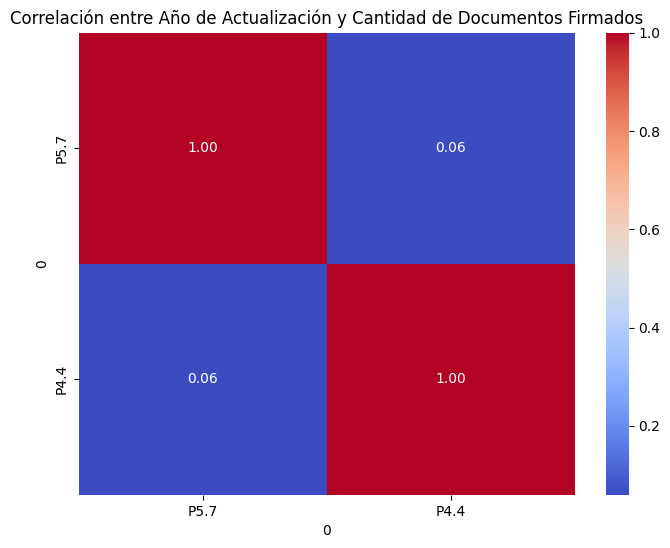

In [27]:
correlation_matrix = DocsPoliticaGestion[['P5.7', 'P4.4']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre Año de Actualización y Cantidad de Documentos Firmados')
plt.show()

### P5.5 y P6.2

In [62]:
GestionDocCostoCartas = cuestionario[["Tipo", "P5.5", "P6.2"]]
GestionDocCostoCartas["P5.5"] = GestionDocCostoCartas["P5.5"].replace({"#n.a.":np.nan,"#s.i.":np.nan,"#n.s.":np.nan})
GestionDocCostoCartas = GestionDocCostoCartas.dropna(subset=['P5.5'])
GestionDocCostoCartas = GestionDocCostoCartas.replace({"#n.a.":0,"#s.i.":0,"#n.s.":0})
Menos10Millones = GestionDocCostoCartas[GestionDocCostoCartas["P6.2"]<10000000]
Mas10Millones = GestionDocCostoCartas[GestionDocCostoCartas["P6.2"]>10000000]

C:\Users\alejo\AppData\Local\Temp\ipykernel_7836\2803427374.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



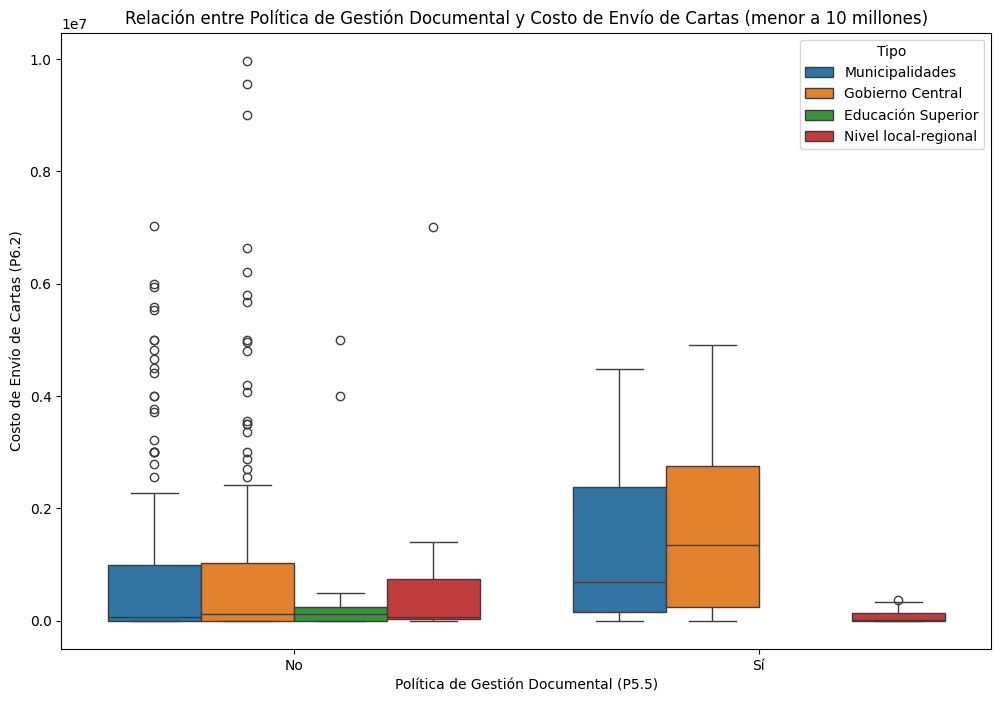

In [70]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='P5.5', y='P6.2',hue="Tipo", data=Menos10Millones)
plt.title('Relación entre Política de Gestión Documental y Costo de Envío de Cartas (menor a 10 millones)')
plt.xlabel('Política de Gestión Documental (P5.5)')
plt.ylabel('Costo de Envío de Cartas (P6.2)')
plt.show()

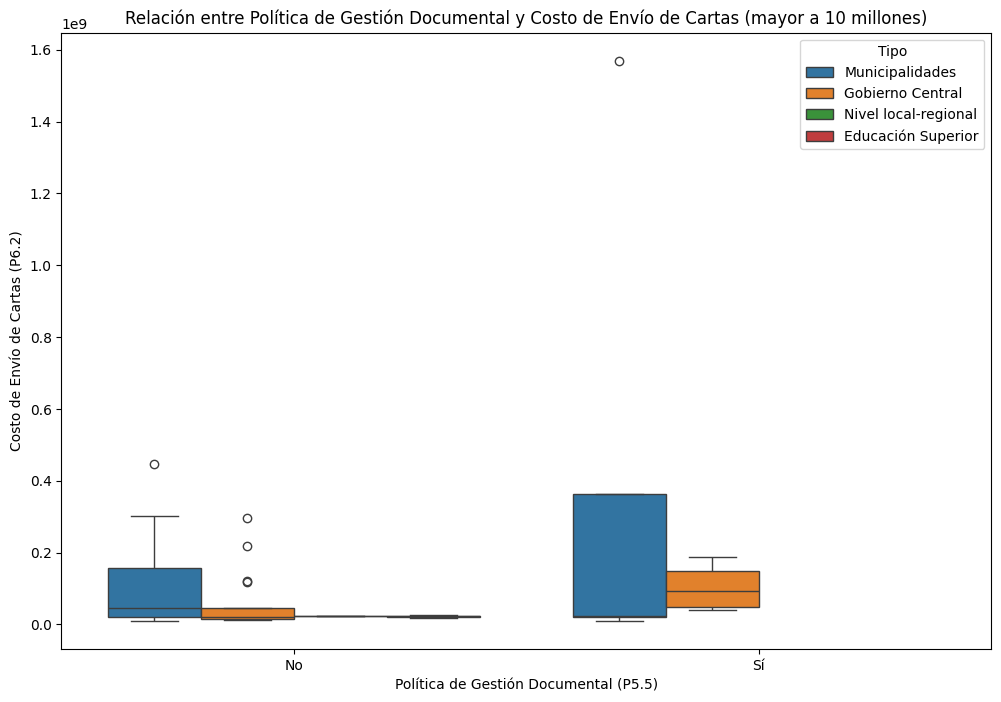

In [71]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='P5.5', y='P6.2', data=Mas10Millones,hue="Tipo")
plt.title('Relación entre Política de Gestión Documental y Costo de Envío de Cartas (mayor a 10 millones)')
plt.xlabel('Política de Gestión Documental (P5.5)')
plt.ylabel('Costo de Envío de Cartas (P6.2)')
plt.show()

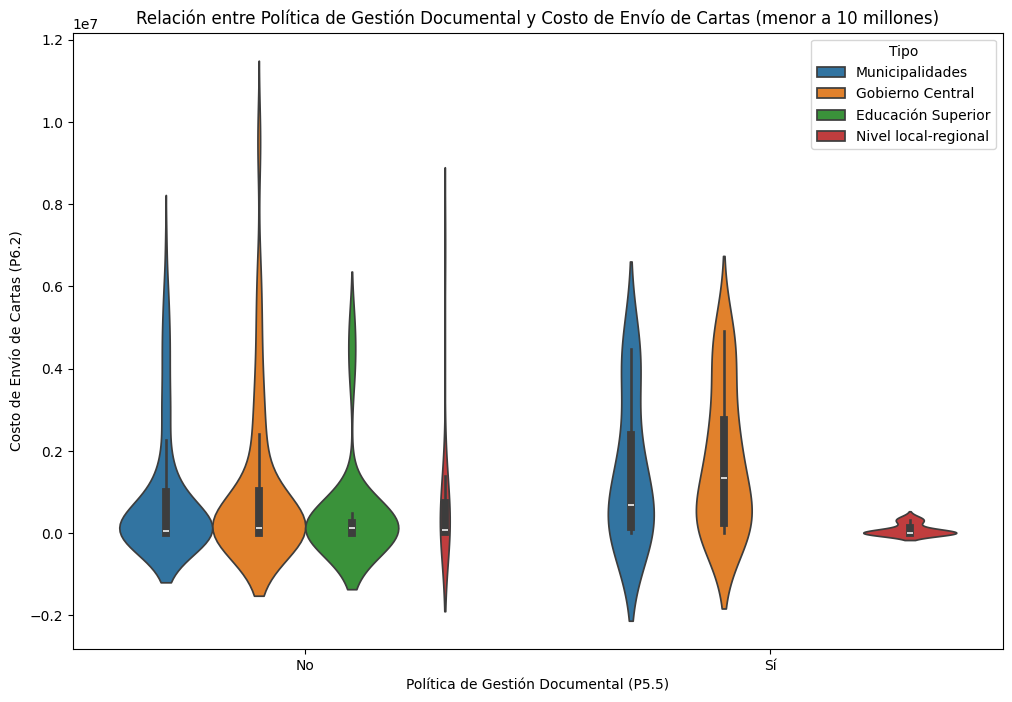

In [72]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='P5.5', y='P6.2', data=Menos10Millones,hue="Tipo")
plt.title('Relación entre Política de Gestión Documental y Costo de Envío de Cartas (menor a 10 millones)')
plt.xlabel('Política de Gestión Documental (P5.5)')
plt.ylabel('Costo de Envío de Cartas (P6.2)')
plt.show()

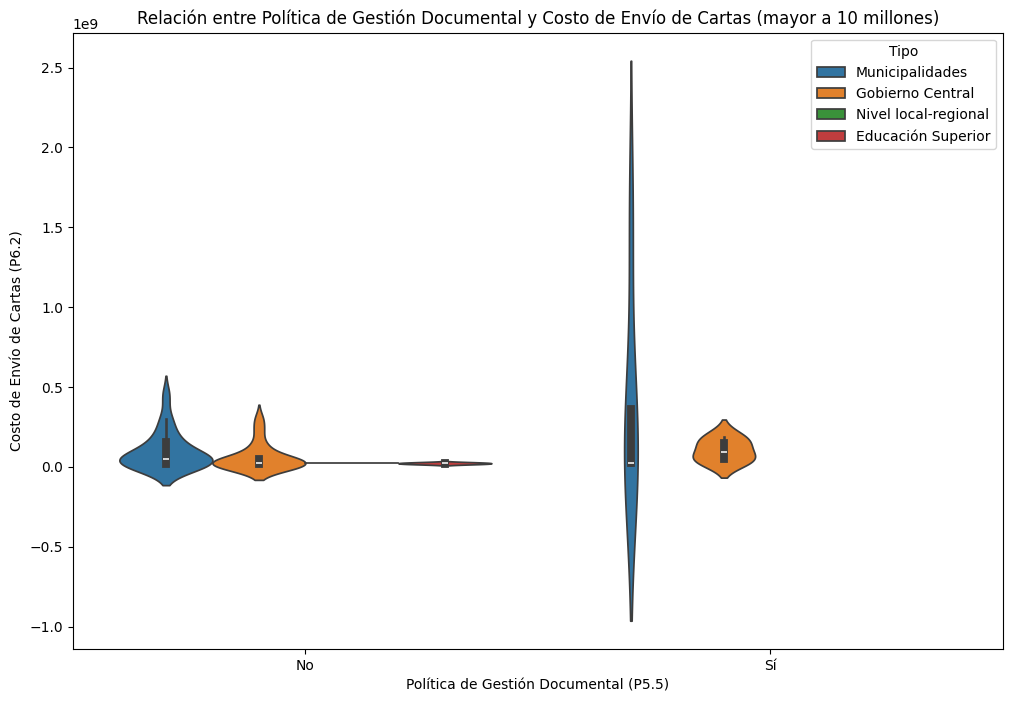

In [73]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='P5.5', y='P6.2', data=Mas10Millones,hue="Tipo")
plt.title('Relación entre Política de Gestión Documental y Costo de Envío de Cartas (mayor a 10 millones)')
plt.xlabel('Política de Gestión Documental (P5.5)')
plt.ylabel('Costo de Envío de Cartas (P6.2)')
plt.show()

C:\Users\alejo\AppData\Local\Temp\ipykernel_7836\1669623023.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




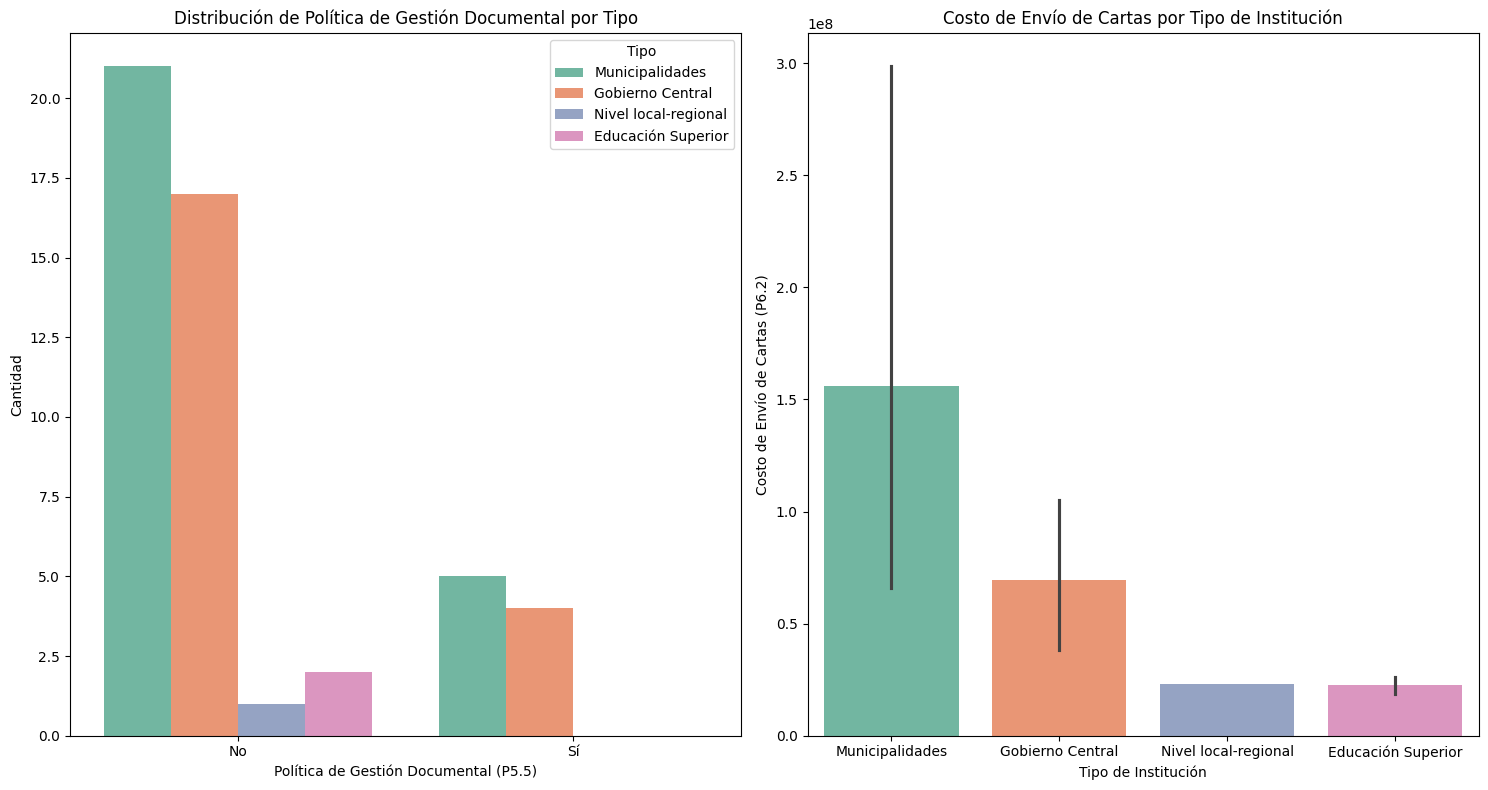

In [76]:
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
sns.countplot(x='P5.5', hue='Tipo', data=Mas10Millones, palette='Set2')
plt.title('Distribución de Política de Gestión Documental por Tipo')
plt.xlabel('Política de Gestión Documental (P5.5)')
plt.ylabel('Cantidad')

plt.subplot(1, 2, 2)
sns.barplot(x='Tipo', y='P6.2', data=Mas10Millones, palette='Set2')
plt.title('Costo de Envío de Cartas por Tipo de Institución')
plt.xlabel('Tipo de Institución')
plt.ylabel('Costo de Envío de Cartas (P6.2)')

plt.tight_layout()
plt.show()


C:\Users\alejo\AppData\Local\Temp\ipykernel_7836\3959797171.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




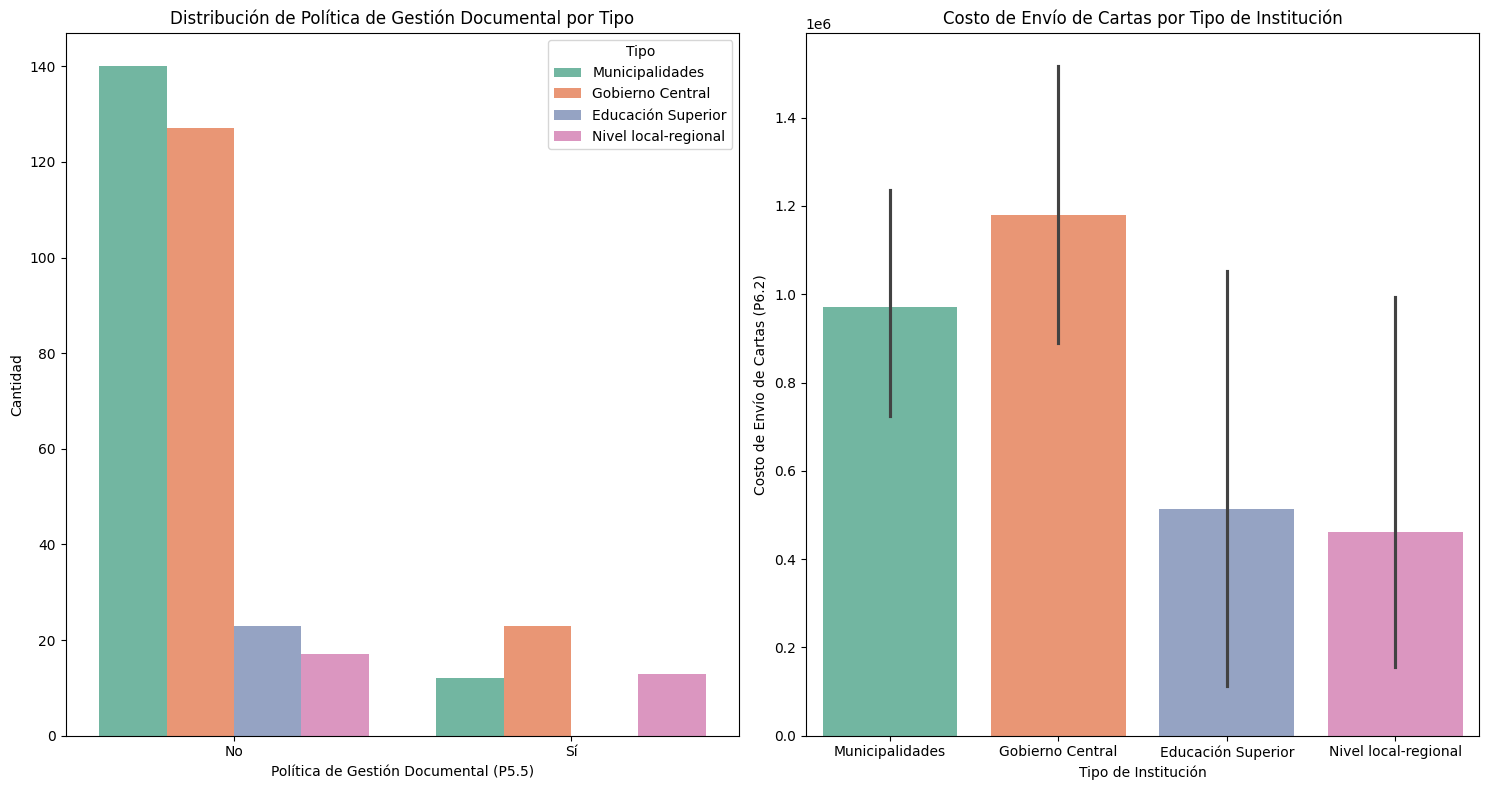

In [78]:
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
sns.countplot(x='P5.5', hue='Tipo', data=Menos10Millones, palette='Set2')
plt.title('Distribución de Política de Gestión Documental por Tipo')
plt.xlabel('Política de Gestión Documental (P5.5)')
plt.ylabel('Cantidad')

plt.subplot(1, 2, 2)
sns.barplot(x='Tipo', y='P6.2', data=Menos10Millones, palette='Set2')
plt.title('Costo de Envío de Cartas por Tipo de Institución')
plt.xlabel('Tipo de Institución')
plt.ylabel('Costo de Envío de Cartas (P6.2)')

plt.tight_layout()
plt.show()

### P9.7 y P9.10

In [81]:
DataCentersChile = cuestionario[["Tipo","P9.7", "P9.10"]]
DataCentersChile = DataCentersChile.replace({'#s.i.': 'Sin Información', '#n.a.': np.nan, '#n.s.': 'Sin Información'})
DataCentersChile = DataCentersChile.dropna()

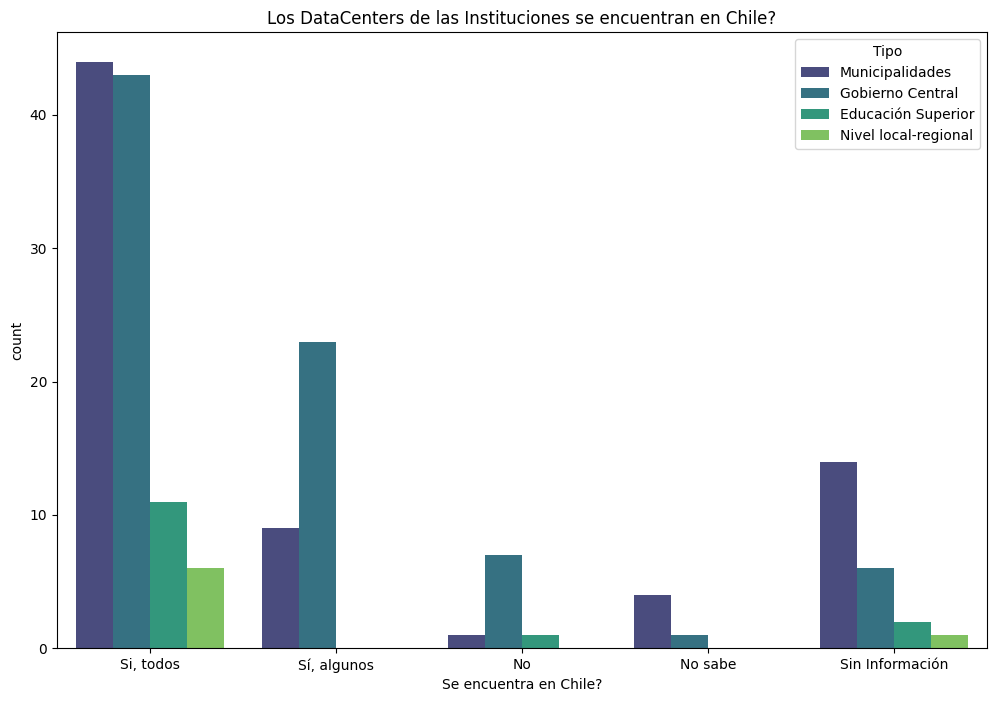

In [89]:
orden=["Si, todos", "Sí, algunos", "No", "No sabe", "Sin Información"]
plt.figure(figsize=(12, 8))
sns.countplot(x='P9.10', data=DataCentersChile,hue='Tipo', order=orden, palette='viridis')
plt.title('Los DataCenters de las Instituciones se encuentran en Chile?')
plt.xlabel('Se encuentra en Chile?')
plt.show()

### P9.13 y P13

In [92]:
SoftwareFuncionyGasto = cuestionario[["Tipo", "P9.13a.1","P9.13a.2","P9.13a.3","P9.13a.4","P9.13a.5","P9.13a.6","P9.13a.7","P9.13a.8","P9.13a.9","P13.GC.2.1","P13.GC.2.2","P13.GC.2.3","P13.GC.2.4","P13.GC.2.5","P13.GC.2.6","P13.GC.3.1","P13.GC.3.2","P13.GC.3.3","P13.GC.3.4","P13.GC.3.5","P13.GC.3.6","P13.GC.3.7","P13.GC.3.8"]]
SoftwareFuncionyGasto = SoftwareFuncionyGasto.replace({'#s.i.': 0, '#n.a.': 0})
SoftwareFuncionyGasto["TotalGastos"] = SoftwareFuncionyGasto.iloc[:, 10:-1].sum(axis=1)
SoftwareFuncionyGasto = SoftwareFuncionyGasto[["Tipo","P9.13a.1","P9.13a.2","P9.13a.3","P9.13a.4","P9.13a.5","P9.13a.6","P9.13a.7","P9.13a.8","P9.13a.9","TotalGastos"]]

In [105]:
cols_analisis = ['P9.13a.1', 'P9.13a.2', 'P9.13a.3', 'P9.13a.4', 'P9.13a.5', 'P9.13a.6', 'P9.13a.7', 'P9.13a.8', 'P9.13a.9', 'TotalGastos']
data_analisis = SoftwareFuncionyGasto[cols_analisis]
data_analisis['CantidadSoftware'] = data_analisis.iloc[:, :-1].apply(lambda row: row[row != '#n.s.'].count(), axis=1)
data_analisis_cortemenor = data_analisis[data_analisis["TotalGastos"]<25000000000]
data_analisis_cortemayor = data_analisis[data_analisis["TotalGastos"]>25000000000]

C:\Users\alejo\AppData\Local\Temp\ipykernel_7836\858234084.py:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



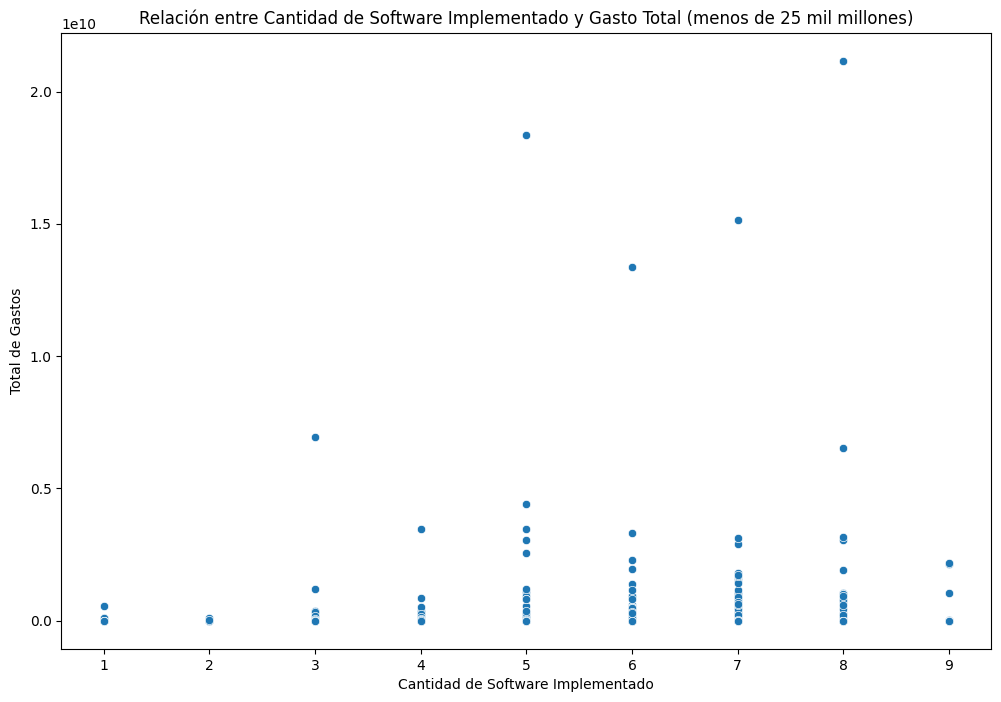

In [106]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='CantidadSoftware', y='TotalGastos', data=data_analisis_cortemenor, palette='viridis')


plt.title('Relación entre Cantidad de Software Implementado y Gasto Total (menos de 25 mil millones)')
plt.xlabel('Cantidad de Software Implementado')
plt.ylabel('Total de Gastos')

plt.show()

C:\Users\alejo\AppData\Local\Temp\ipykernel_7836\2079340699.py:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



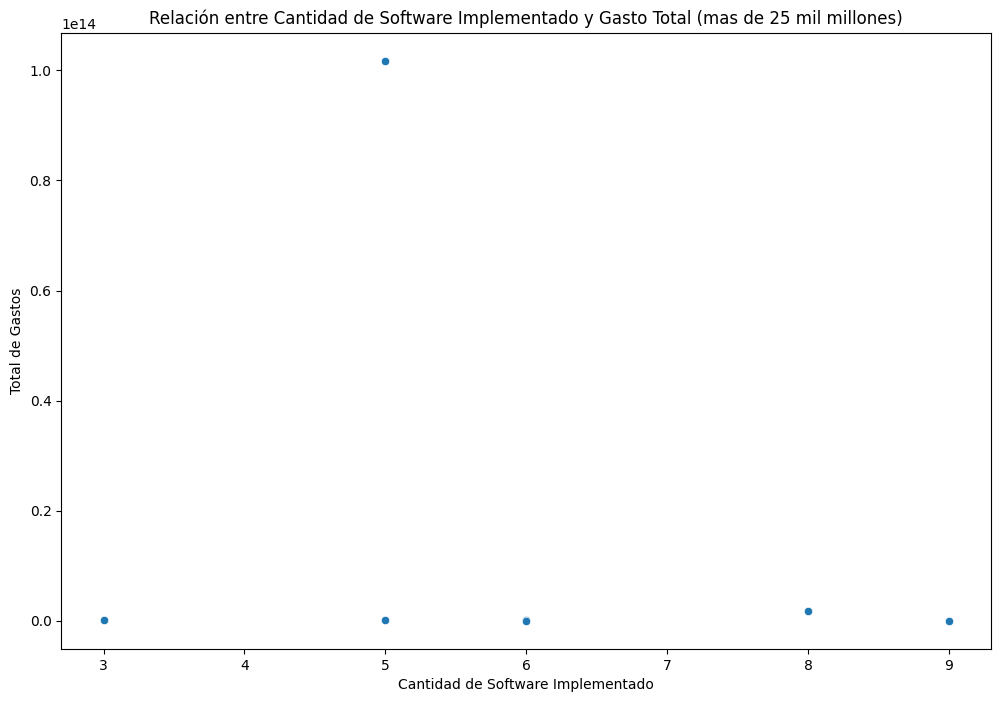

In [107]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='CantidadSoftware', y='TotalGastos', data=data_analisis_cortemayor, palette='viridis')


plt.title('Relación entre Cantidad de Software Implementado y Gasto Total (mas de 25 mil millones)')
plt.xlabel('Cantidad de Software Implementado')
plt.ylabel('Total de Gastos')

plt.show()

C:\Users\alejo\AppData\Local\Temp\ipykernel_7836\2242789551.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




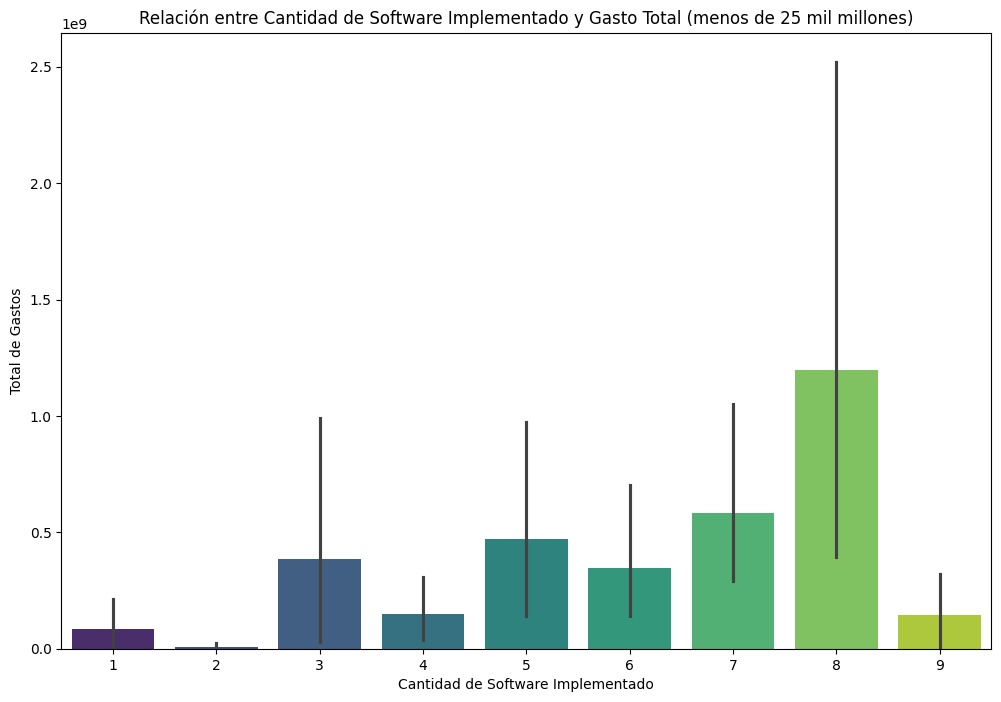

In [110]:
plt.figure(figsize=(12, 8))
sns.barplot(x='CantidadSoftware', y='TotalGastos', data=data_analisis_cortemenor, palette='viridis')
plt.title('Relación entre Cantidad de Software Implementado y Gasto Total (menos de 25 mil millones)')
plt.xlabel('Cantidad de Software Implementado')
plt.ylabel('Total de Gastos')
plt.show()

C:\Users\alejo\AppData\Local\Temp\ipykernel_7836\3618451270.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




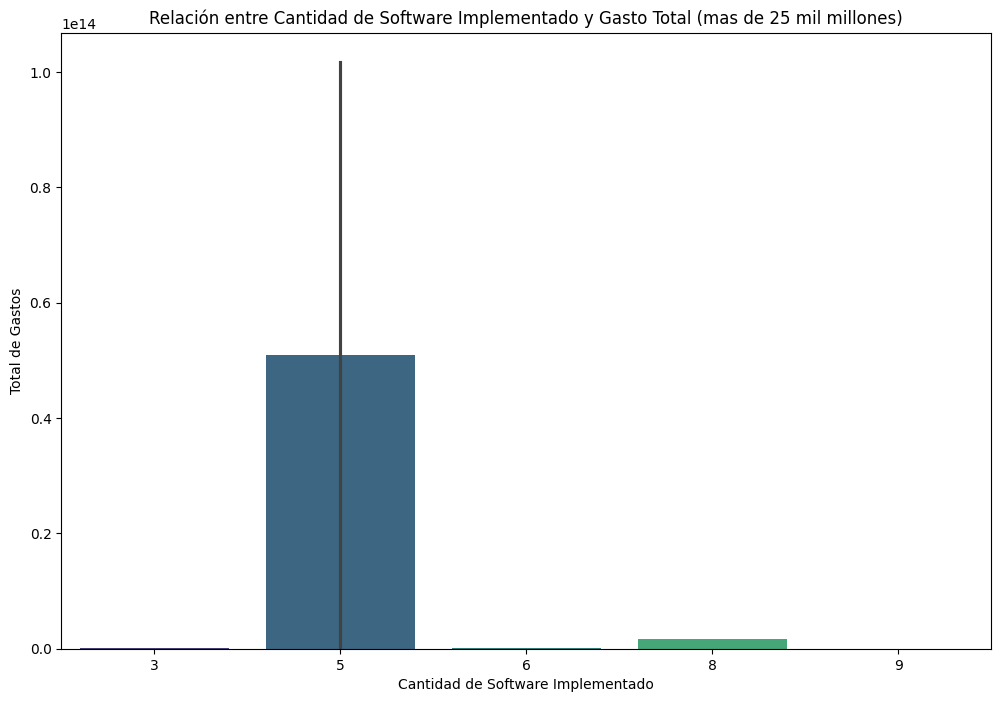

In [111]:
plt.figure(figsize=(12, 8))
sns.barplot(x='CantidadSoftware', y='TotalGastos', data=data_analisis_cortemayor, palette='viridis')
plt.title('Relación entre Cantidad de Software Implementado y Gasto Total (mas de 25 mil millones)')
plt.xlabel('Cantidad de Software Implementado')
plt.ylabel('Total de Gastos')
plt.show()

### P11.5 y P2.6a.1/2

In [118]:
CargosDeSeguridad = cuestionario[["Tipo", "P11.5.1", "P11.5.2","P11.5.3","P2.6a.1","P2.6a.2"]]
CargosDeSeguridad = CargosDeSeguridad.replace({'#s.i.': 0, '#n.a.': 0, "#n.s.":0})
CargosDeSeguridad["EmpleadosTIC"] = CargosDeSeguridad["P2.6a.1"] + CargosDeSeguridad["P2.6a.2"]
CargosDeSeguridad = CargosDeSeguridad[["Tipo", "P11.5.1", "P11.5.2","P11.5.3","EmpleadosTIC"]]

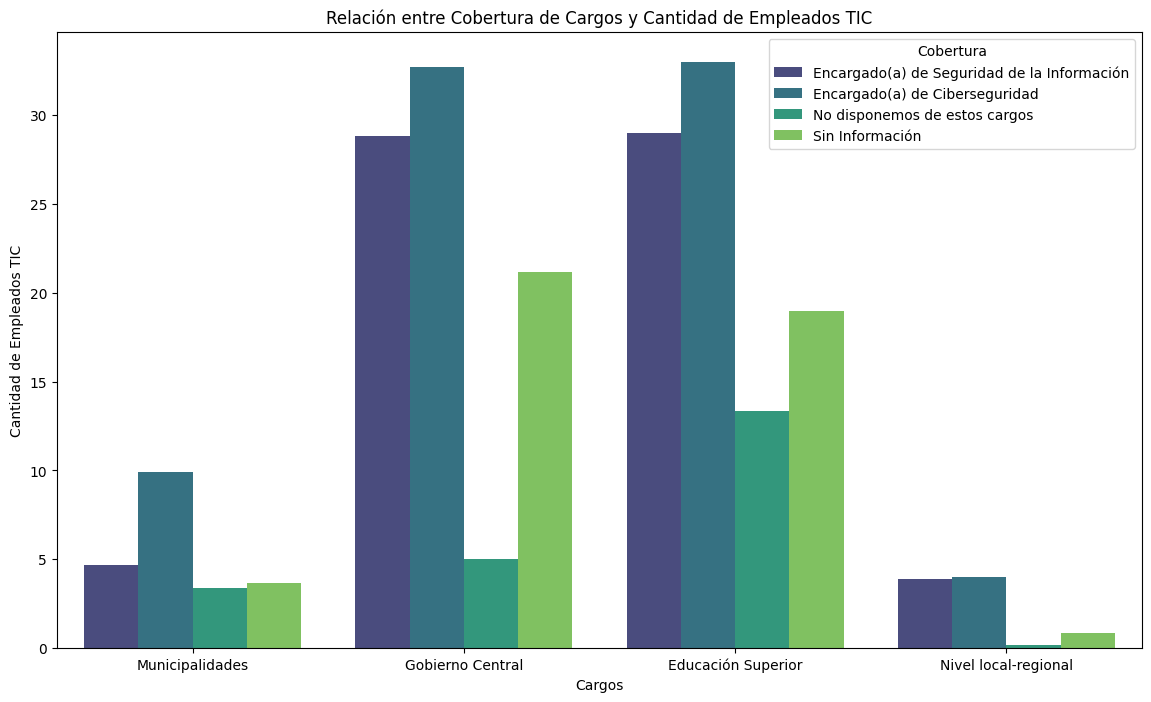

In [138]:
cols_cargos = ['P11.5.1', 'P11.5.2', 'P11.5.3']
data_empleados_melted = pd.melt(CargosDeSeguridad, id_vars=['Tipo', 'EmpleadosTIC'], value_vars=cols_cargos, var_name='Cargo', value_name='Cobertura')

data_empleados_melted['Cobertura'] = data_empleados_melted['Cobertura'].replace({0:"Sin Información"})


plt.figure(figsize=(14, 8))
sns.barplot(x='Tipo', y='EmpleadosTIC', hue='Cobertura', data=data_empleados_melted, palette='viridis', errorbar=None, hue_order=["Encargado(a) de Seguridad de la Información", "Encargado(a) de Ciberseguridad", "No disponemos de estos cargos", "Sin Información"])
plt.title('Relación entre Cobertura de Cargos y Cantidad de Empleados TIC')
plt.xlabel('Cargos')
plt.ylabel('Cantidad de Empleados TIC')
plt.show()

### P11.3 y P11.4

In [181]:
ActPoliticayCapacitaciones = cuestionario[["Tipo", "P11.3.1", "P11.3.2", "P11.3.3", "P11.4"]]
ActPoliticayCapacitaciones = ActPoliticayCapacitaciones.replace({'#s.i.': 'Sin Información', '#n.a.': 'Sin Información', '#n.s.': 'Sin Información'})

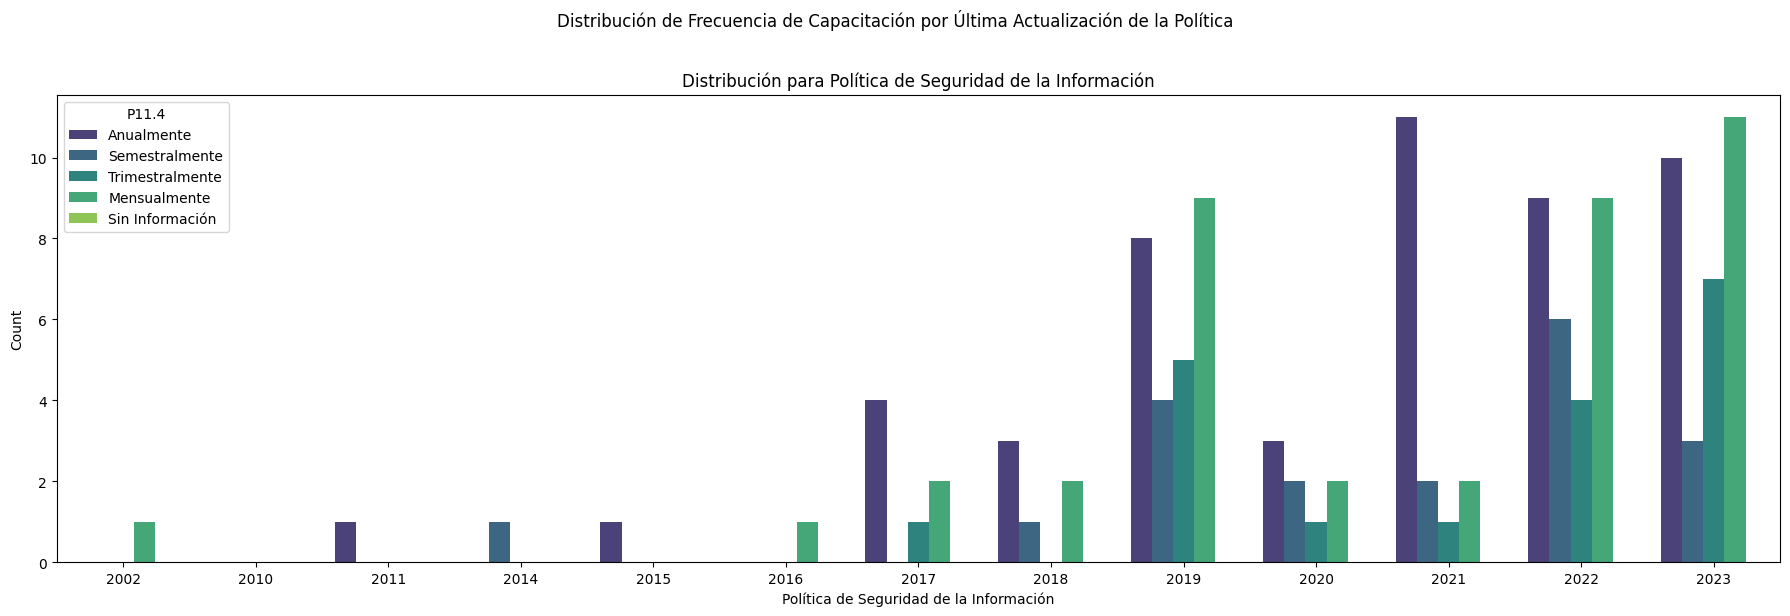

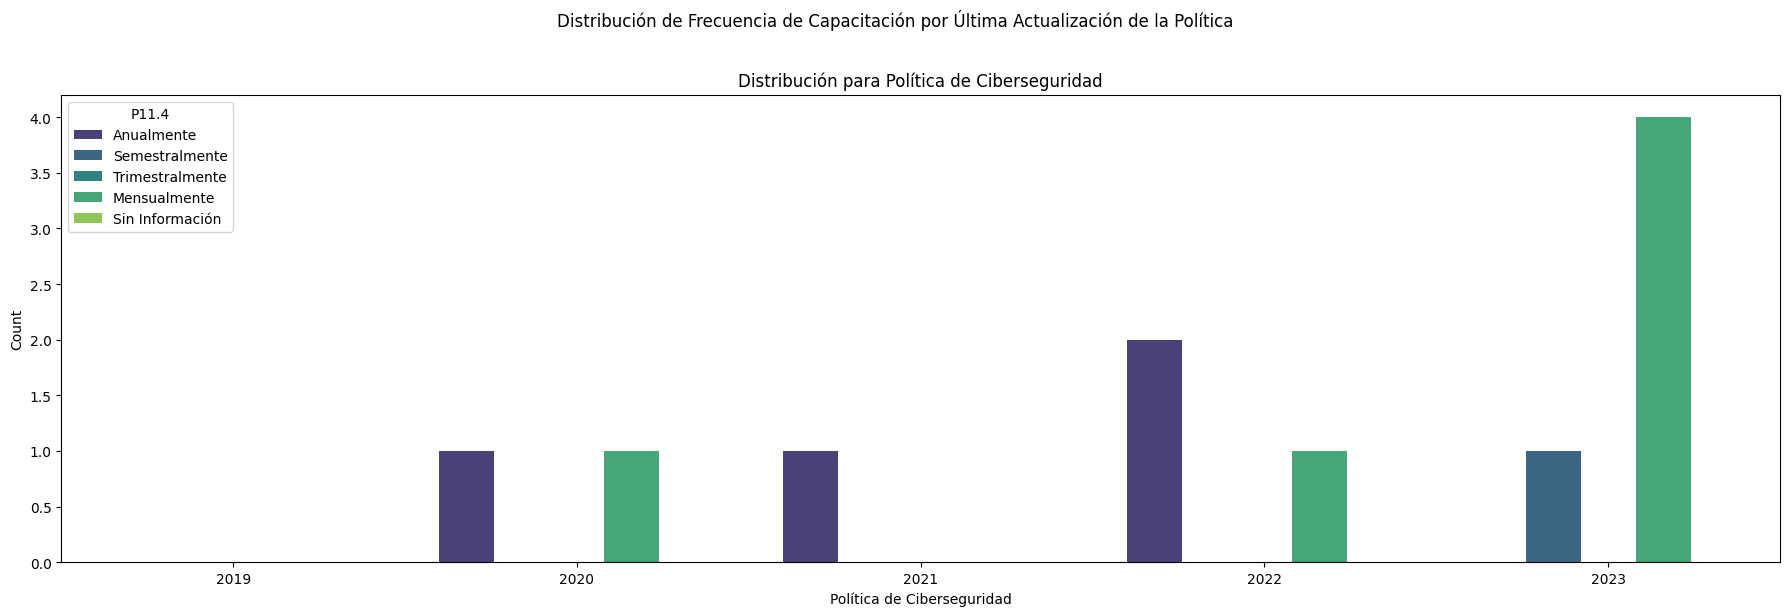

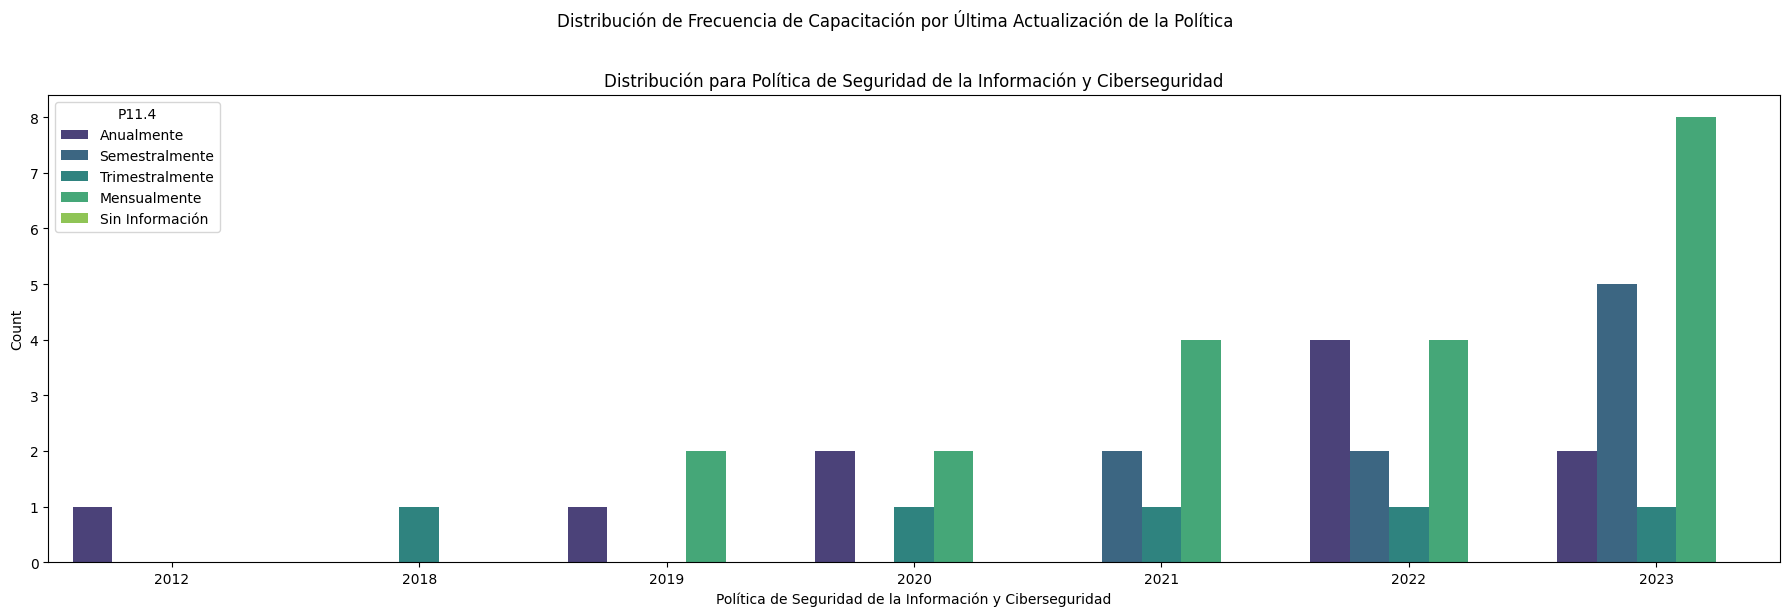

In [183]:
ActPoliticayCapacitaciones = ActPoliticayCapacitaciones.rename(columns={
    'P11.3.1': 'Política de Seguridad de la Información',
    'P11.3.2': 'Política de Ciberseguridad',
    'P11.3.3': 'Política de Seguridad de la Información y Ciberseguridad'
})

columns_to_plot = ['Política de Seguridad de la Información', 'Política de Ciberseguridad', 'Política de Seguridad de la Información y Ciberseguridad']
hueOrden = ["Anualmente", "Semestralmente", "Trimestralmente", "Mensualmente", "Sin Información"]


for i, column in enumerate(columns_to_plot, 1):
    plt.figure(figsize=(18, 6))
    
    sns.countplot(x=column, hue='P11.4', data=ActPoliticayCapacitaciones[ActPoliticayCapacitaciones[column]!="Sin Información"], palette='viridis', hue_order=hueOrden)
    plt.title(f'Distribución para {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

    plt.suptitle('Distribución de Frecuencia de Capacitación por Última Actualización de la Política', y=1.02)
    plt.tight_layout()
    plt.show()